In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/JPY_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74262, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,108.730,108.728,108.590,108.759
2020-01-01 17:15:00,108.728,108.703,108.575,108.735
2020-01-01 17:30:00,108.703,108.668,108.660,108.703
2020-01-01 17:45:00,108.668,108.677,108.668,108.677
2020-01-01 18:00:00,108.677,108.658,108.601,108.678


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74261, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,108.730,108.728,108.590,108.759,108.703,17,2,1,0.002,108.6745,0.169,108.70175
2020-01-01 17:15:00,108.728,108.703,108.575,108.735,108.668,17,2,1,0.025,108.6550,0.160,108.68525
2020-01-01 17:30:00,108.703,108.668,108.660,108.703,108.677,17,2,1,0.035,108.6815,0.043,108.68350
2020-01-01 17:45:00,108.668,108.677,108.668,108.677,108.658,17,2,1,-0.009,108.6725,0.009,108.67250
2020-01-01 18:00:00,108.677,108.658,108.601,108.678,108.692,18,2,1,0.019,108.6395,0.077,108.65350


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,108.730,108.728,108.590,108.759,108.703,17,2,1,0.002,108.6745,0.169,108.70175,-22.366596
2020-01-01 17:15:00,108.728,108.703,108.575,108.735,108.668,17,2,1,0.025,108.6550,0.160,108.68525,-22.417688
2020-01-01 17:30:00,108.703,108.668,108.660,108.703,108.677,17,2,1,0.035,108.6815,0.043,108.68350,-22.407784
2020-01-01 17:45:00,108.668,108.677,108.668,108.677,108.658,17,2,1,-0.009,108.6725,0.009,108.67250,-22.438929
2020-01-01 18:00:00,108.677,108.658,108.601,108.678,108.692,18,2,1,0.019,108.6395,0.077,108.65350,-22.474247


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  108.730  108.590  108.759         108.703    17    2   
2020-01-01 17:15:00  108.728  108.575  108.735         108.668    17    2   
2020-01-01 17:30:00  108.703  108.660  108.703         108.677    17    2   
2020-01-01 17:45:00  108.668  108.668  108.677         108.658    17    2   
2020-01-01 18:00:00  108.677  108.601  108.678         108.692    18    2   

                     week  momentum  avg_price  range  ohlc_price        pca  
timestamp                                                                     
2020-01-01 17:00:00     1     0.002   108.6745  0.169   108.70175 -22.366596  
2020-01-01 17:15:00     1     0.025   108.6550  0.160   108.68525 -22.417688  
2020-01-01 17:30:00     1     0.035   108.6815  0.043   108.68350 -22.407784  
2020-01-01 17:45:00     1    -0.009   108.6725  0.009   108.67250

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_15Min(X,y)

59408
59408
7500
7500
7353
7353


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(59408, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(59383, 24, 12)
(7475, 24, 12)
(7328, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(59383, 1)
(7475, 1)
(7328, 1)


array([[0.24607372],
       [0.24640799],
       [0.24650812],
       ...,
       [0.8833792 ],
       [0.8856847 ],
       [0.88708854]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.24607372, 0.24640799, 0.24650812, ..., 0.8833792 , 0.8856847 ,
       0.88708854], dtype=float32)

In [ ]:
model= thesis.BiLSTM_Model(x_train)
model.summary()

ValueError: ignored

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD15_BiLSTM", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 439.9958 - mae: 6.1077 - mse: 439.9958 - root_mean_squared_error: 20.9761 - mape: 26470.1543
Epoch 1: val_mse improved from inf to 0.45884, saving model to /content/drive/MyDrive/modelweights/JPY_USD15_BiLSTM


464/464 [==============================] - 197s 396ms/step - loss: 439.9958 - mae: 6.1077 - mse: 439.9958 - root_mean_squared_error: 20.9761 - mape: 26470.1543 - val_loss: 0.4588 - val_mae: 0.6507 - val_mse: 0.4588 - val_root_mean_squared_error: 0.6774 - val_mape: 149573.6562
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.3196 - mae: 0.5236 - mse: 0.3196 - root_mean_squared_error: 0.5654 - mape: 17383.9062
Epoch 2: val_mse improved from 0.45884 to 0.05327, saving model to /content/drive/MyDrive/modelweights/JPY_USD15_BiLSTM


464/464 [==============================] - 176s 379ms/step - loss: 0.3196 - mae: 0.5236 - mse: 0.3196 - root_mean_squared_error: 0.5654 - mape: 17383.9062 - val_loss: 0.0533 - val_mae: 0.1744 - val_mse: 0.0533 - val_root_mean_squared_error: 0.2308 - val_mape: 80060.9453
Epoch 3/75
464/464 [==============================] - ETA: 0s - loss: 0.0846 - mae: 0.2623 - mse: 0.0846 - root_mean_squared_error: 0.2908 - mape: 7488.3101
Epoch 3: val_mse improved from 0.05327 to 0.03612, saving model to /content/drive/MyDrive/modelweights/JPY_USD15_BiLSTM


464/464 [==============================] - 181s 389ms/step - loss: 0.0846 - mae: 0.2623 - mse: 0.0846 - root_mean_squared_error: 0.2908 - mape: 7488.3101 - val_loss: 0.0361 - val_mae: 0.1452 - val_mse: 0.0361 - val_root_mean_squared_error: 0.1901 - val_mape: 58199.4922
Epoch 4/75
464/464 [==============================] - ETA: 0s - loss: 0.0476 - mae: 0.1829 - mse: 0.0476 - root_mean_squared_error: 0.2183 - mape: 6843.1665
Epoch 4: val_mse did not improve from 0.03612
464/464 [==============================] - 138s 298ms/step - loss: 0.0476 - mae: 0.1829 - mse: 0.0476 - root_mean_squared_error: 0.2183 - mape: 6843.1665 - val_loss: 0.0456 - val_mae: 0.1768 - val_mse: 0.0456 - val_root_mean_squared_error: 0.2135 - val_mape: 48426.0586
Epoch 5/75
464/464 [==============================] - ETA: 0s - loss: 0.0394 - mae: 0.1565 - mse: 0.0394 - root_mean_squared_error: 0.1985 - mape: 6140.9902
Epoch 5: val_mse did not improve from 0.03612
464/464 [==============================] - 140s 303ms/

464/464 [==============================] - 181s 390ms/step - loss: 0.0267 - mae: 0.1163 - mse: 0.0267 - root_mean_squared_error: 0.1634 - mape: 4767.0605 - val_loss: 0.0287 - val_mae: 0.1395 - val_mse: 0.0287 - val_root_mean_squared_error: 0.1694 - val_mape: 34430.3555
Epoch 15/75
464/464 [==============================] - ETA: 0s - loss: 0.0177 - mae: 0.0894 - mse: 0.0177 - root_mean_squared_error: 0.1329 - mape: 4222.9087
Epoch 15: val_mse improved from 0.02869 to 0.01306, saving model to /content/drive/MyDrive/modelweights/JPY_USD15_BiLSTM


464/464 [==============================] - 177s 381ms/step - loss: 0.0177 - mae: 0.0894 - mse: 0.0177 - root_mean_squared_error: 0.1329 - mape: 4222.9087 - val_loss: 0.0131 - val_mae: 0.0821 - val_mse: 0.0131 - val_root_mean_squared_error: 0.1143 - val_mape: 32312.4805
Epoch 16/75
464/464 [==============================] - ETA: 0s - loss: 0.0102 - mae: 0.0683 - mse: 0.0102 - root_mean_squared_error: 0.1008 - mape: 3995.9976
Epoch 16: val_mse improved from 0.01306 to 0.00420, saving model to /content/drive/MyDrive/modelweights/JPY_USD15_BiLSTM


464/464 [==============================] - 179s 386ms/step - loss: 0.0102 - mae: 0.0683 - mse: 0.0102 - root_mean_squared_error: 0.1008 - mape: 3995.9976 - val_loss: 0.0042 - val_mae: 0.0489 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0648 - val_mape: 28323.2500
Epoch 17/75
464/464 [==============================] - ETA: 0s - loss: 0.0030 - mae: 0.0414 - mse: 0.0030 - root_mean_squared_error: 0.0547 - mape: 3024.5425
Epoch 17: val_mse improved from 0.00420 to 0.00324, saving model to /content/drive/MyDrive/modelweights/JPY_USD15_BiLSTM


464/464 [==============================] - 177s 382ms/step - loss: 0.0030 - mae: 0.0414 - mse: 0.0030 - root_mean_squared_error: 0.0547 - mape: 3024.5425 - val_loss: 0.0032 - val_mae: 0.0482 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0569 - val_mape: 20642.2363
Epoch 18/75
464/464 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0326 - mse: 0.0019 - root_mean_squared_error: 0.0438 - mape: 2784.2336
Epoch 18: val_mse did not improve from 0.00324
464/464 [==============================] - 135s 291ms/step - loss: 0.0019 - mae: 0.0326 - mse: 0.0019 - root_mean_squared_error: 0.0438 - mape: 2784.2336 - val_loss: 0.0040 - val_mae: 0.0564 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0632 - val_mape: 18037.3320
Epoch 19/75
464/464 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0290 - mse: 0.0015 - root_mean_squared_error: 0.0391 - mape: 2316.4939
Epoch 19: val_mse did not improve from 0.00324
464/464 [==============================] - 138s 29

464/464 [==============================] - 174s 376ms/step - loss: 0.0012 - mae: 0.0259 - mse: 0.0012 - root_mean_squared_error: 0.0351 - mape: 2093.0564 - val_loss: 0.0027 - val_mae: 0.0471 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0517 - val_mape: 15422.1152
Epoch 21/75
464/464 [==============================] - ETA: 0s - loss: 9.8656e-04 - mae: 0.0233 - mse: 9.8656e-04 - root_mean_squared_error: 0.0314 - mape: 1950.3861
Epoch 21: val_mse improved from 0.00267 to 0.00214, saving model to /content/drive/MyDrive/modelweights/JPY_USD15_BiLSTM


464/464 [==============================] - 178s 384ms/step - loss: 9.8656e-04 - mae: 0.0233 - mse: 9.8656e-04 - root_mean_squared_error: 0.0314 - mape: 1950.3861 - val_loss: 0.0021 - val_mae: 0.0424 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0463 - val_mape: 14658.9297
Epoch 22/75
464/464 [==============================] - ETA: 0s - loss: 8.0996e-04 - mae: 0.0211 - mse: 8.0996e-04 - root_mean_squared_error: 0.0285 - mape: 1781.7079
Epoch 22: val_mse improved from 0.00214 to 0.00138, saving model to /content/drive/MyDrive/modelweights/JPY_USD15_BiLSTM


464/464 [==============================] - 177s 382ms/step - loss: 8.0996e-04 - mae: 0.0211 - mse: 8.0996e-04 - root_mean_squared_error: 0.0285 - mape: 1781.7079 - val_loss: 0.0014 - val_mae: 0.0325 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0371 - val_mape: 13802.4053
Epoch 23/75
464/464 [==============================] - ETA: 0s - loss: 6.9988e-04 - mae: 0.0197 - mse: 6.9988e-04 - root_mean_squared_error: 0.0265 - mape: 1749.6222
Epoch 23: val_mse improved from 0.00138 to 0.00075, saving model to /content/drive/MyDrive/modelweights/JPY_USD15_BiLSTM


464/464 [==============================] - 176s 379ms/step - loss: 6.9988e-04 - mae: 0.0197 - mse: 6.9988e-04 - root_mean_squared_error: 0.0265 - mape: 1749.6222 - val_loss: 7.4748e-04 - val_mae: 0.0213 - val_mse: 7.4748e-04 - val_root_mean_squared_error: 0.0273 - val_mape: 13304.3574
Epoch 24/75
464/464 [==============================] - ETA: 0s - loss: 6.0445e-04 - mae: 0.0183 - mse: 6.0445e-04 - root_mean_squared_error: 0.0246 - mape: 1761.0940
Epoch 24: val_mse did not improve from 0.00075
464/464 [==============================] - 139s 300ms/step - loss: 6.0445e-04 - mae: 0.0183 - mse: 6.0445e-04 - root_mean_squared_error: 0.0246 - mape: 1761.0940 - val_loss: 0.0011 - val_mae: 0.0289 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0332 - val_mape: 12783.2197
Epoch 25/75
464/464 [==============================] - ETA: 0s - loss: 5.4314e-04 - mae: 0.0174 - mse: 5.4314e-04 - root_mean_squared_error: 0.0233 - mape: 1744.1469
Epoch 25: val_mse did not improve from 0.00075
464/464 [=

464/464 [==============================] - 181s 391ms/step - loss: 4.7632e-04 - mae: 0.0163 - mse: 4.7632e-04 - root_mean_squared_error: 0.0218 - mape: 1627.3689 - val_loss: 5.1892e-04 - val_mae: 0.0171 - val_mse: 5.1892e-04 - val_root_mean_squared_error: 0.0228 - val_mape: 12238.9404
Epoch 27/75
464/464 [==============================] - ETA: 0s - loss: 4.1821e-04 - mae: 0.0152 - mse: 4.1821e-04 - root_mean_squared_error: 0.0205 - mape: 1494.7805
Epoch 27: val_mse did not improve from 0.00052
464/464 [==============================] - 139s 299ms/step - loss: 4.1821e-04 - mae: 0.0152 - mse: 4.1821e-04 - root_mean_squared_error: 0.0205 - mape: 1494.7805 - val_loss: 5.3227e-04 - val_mae: 0.0170 - val_mse: 5.3227e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 12389.6943
Epoch 28/75
464/464 [==============================] - ETA: 0s - loss: 4.0168e-04 - mae: 0.0150 - mse: 4.0168e-04 - root_mean_squared_error: 0.0200 - mape: 1458.9888
Epoch 28: val_mse did not improve from 0.00052
46

464/464 [==============================] - 178s 383ms/step - loss: 2.9383e-04 - mae: 0.0128 - mse: 2.9383e-04 - root_mean_squared_error: 0.0171 - mape: 1416.8271 - val_loss: 5.0877e-04 - val_mae: 0.0180 - val_mse: 5.0877e-04 - val_root_mean_squared_error: 0.0226 - val_mape: 11010.2314
Epoch 32/75
464/464 [==============================] - ETA: 0s - loss: 2.5526e-04 - mae: 0.0119 - mse: 2.5526e-04 - root_mean_squared_error: 0.0160 - mape: 1428.8911
Epoch 32: val_mse improved from 0.00051 to 0.00046, saving model to /content/drive/MyDrive/modelweights/JPY_USD15_BiLSTM


464/464 [==============================] - 180s 389ms/step - loss: 2.5526e-04 - mae: 0.0119 - mse: 2.5526e-04 - root_mean_squared_error: 0.0160 - mape: 1428.8911 - val_loss: 4.5935e-04 - val_mae: 0.0162 - val_mse: 4.5935e-04 - val_root_mean_squared_error: 0.0214 - val_mape: 11350.3574
Epoch 33/75
464/464 [==============================] - ETA: 0s - loss: 2.6248e-04 - mae: 0.0120 - mse: 2.6248e-04 - root_mean_squared_error: 0.0162 - mape: 1307.0690
Epoch 33: val_mse did not improve from 0.00046
464/464 [==============================] - 139s 299ms/step - loss: 2.6248e-04 - mae: 0.0120 - mse: 2.6248e-04 - root_mean_squared_error: 0.0162 - mape: 1307.0690 - val_loss: 5.3127e-04 - val_mae: 0.0183 - val_mse: 5.3127e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 11006.0693
Epoch 34/75
464/464 [==============================] - ETA: 0s - loss: 2.2507e-04 - mae: 0.0111 - mse: 2.2507e-04 - root_mean_squared_error: 0.0150 - mape: 1326.8406
Epoch 34: val_mse improved from 0.00046 to 0.0003

464/464 [==============================] - 175s 378ms/step - loss: 2.2507e-04 - mae: 0.0111 - mse: 2.2507e-04 - root_mean_squared_error: 0.0150 - mape: 1326.8406 - val_loss: 3.3503e-04 - val_mae: 0.0133 - val_mse: 3.3503e-04 - val_root_mean_squared_error: 0.0183 - val_mape: 10600.0156
Epoch 35/75
464/464 [==============================] - ETA: 0s - loss: 2.1792e-04 - mae: 0.0109 - mse: 2.1792e-04 - root_mean_squared_error: 0.0148 - mape: 1293.7062
Epoch 35: val_mse did not improve from 0.00034
464/464 [==============================] - 139s 300ms/step - loss: 2.1792e-04 - mae: 0.0109 - mse: 2.1792e-04 - root_mean_squared_error: 0.0148 - mape: 1293.7062 - val_loss: 3.9058e-04 - val_mae: 0.0147 - val_mse: 3.9058e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 10974.3291
Epoch 36/75
464/464 [==============================] - ETA: 0s - loss: 1.7457e-04 - mae: 0.0098 - mse: 1.7457e-04 - root_mean_squared_error: 0.0132 - mape: 1268.5687
Epoch 36: val_mse did not improve from 0.00034
46

464/464 [==============================] - 177s 383ms/step - loss: 9.9645e-05 - mae: 0.0072 - mse: 9.9645e-05 - root_mean_squared_error: 0.0100 - mape: 1141.9712 - val_loss: 2.9220e-04 - val_mae: 0.0131 - val_mse: 2.9220e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 9203.8457
Epoch 44/75
464/464 [==============================] - ETA: 0s - loss: 8.9903e-05 - mae: 0.0069 - mse: 8.9903e-05 - root_mean_squared_error: 0.0095 - mape: 1141.5133
Epoch 44: val_mse did not improve from 0.00029
464/464 [==============================] - 138s 297ms/step - loss: 8.9903e-05 - mae: 0.0069 - mse: 8.9903e-05 - root_mean_squared_error: 0.0095 - mape: 1141.5133 - val_loss: 9.5300e-04 - val_mae: 0.0281 - val_mse: 9.5300e-04 - val_root_mean_squared_error: 0.0309 - val_mape: 9130.0381
Epoch 45/75
464/464 [==============================] - ETA: 0s - loss: 9.0316e-05 - mae: 0.0069 - mse: 9.0316e-05 - root_mean_squared_error: 0.0095 - mape: 1075.8977
Epoch 45: val_mse did not improve from 0.00029
464/

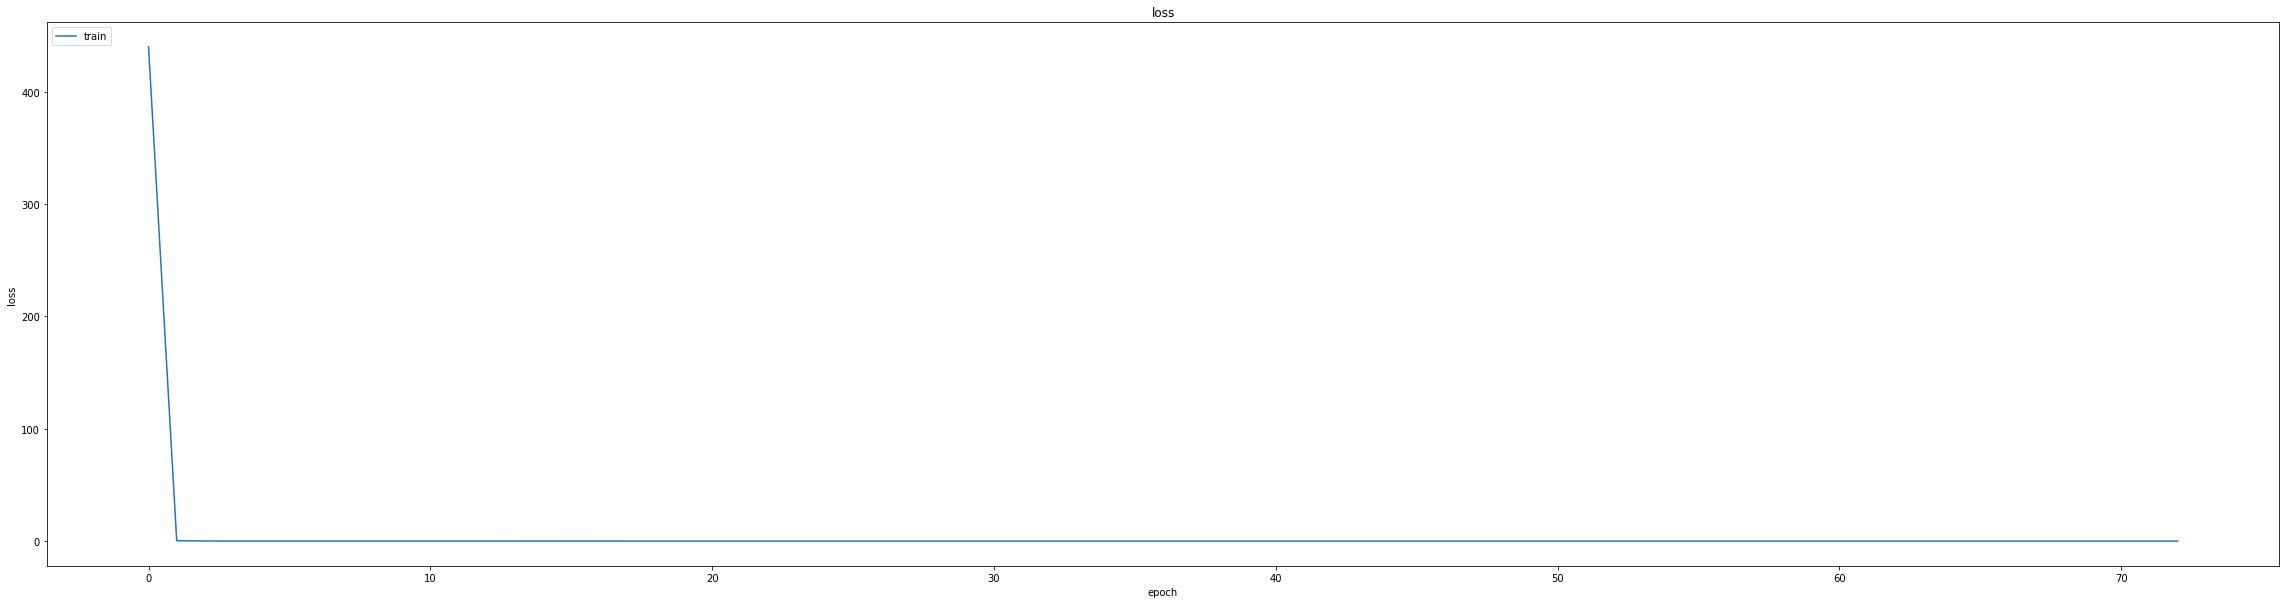

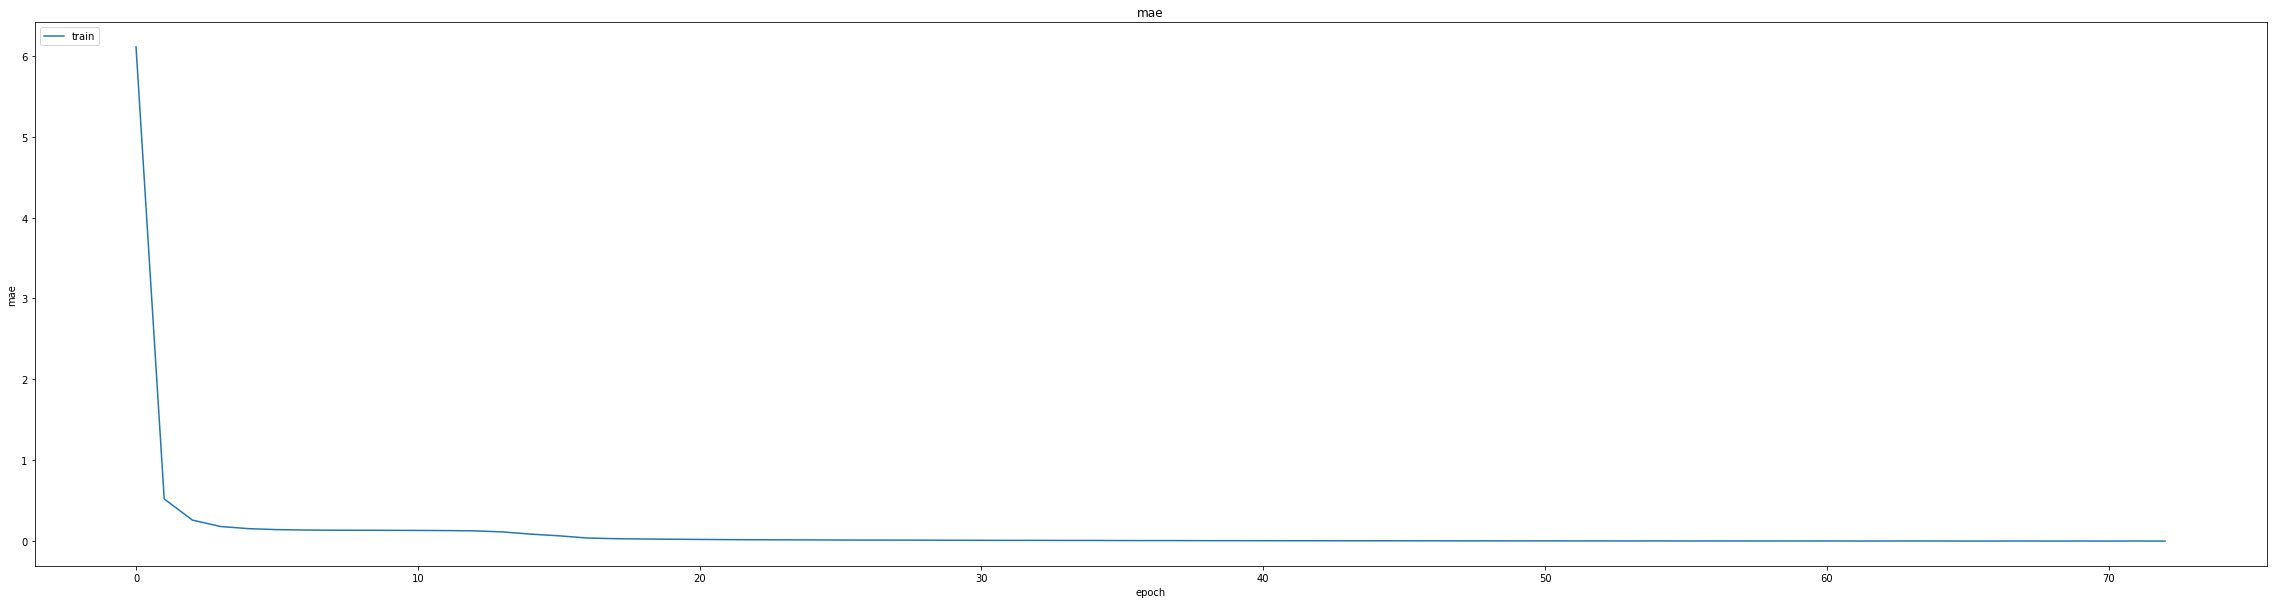

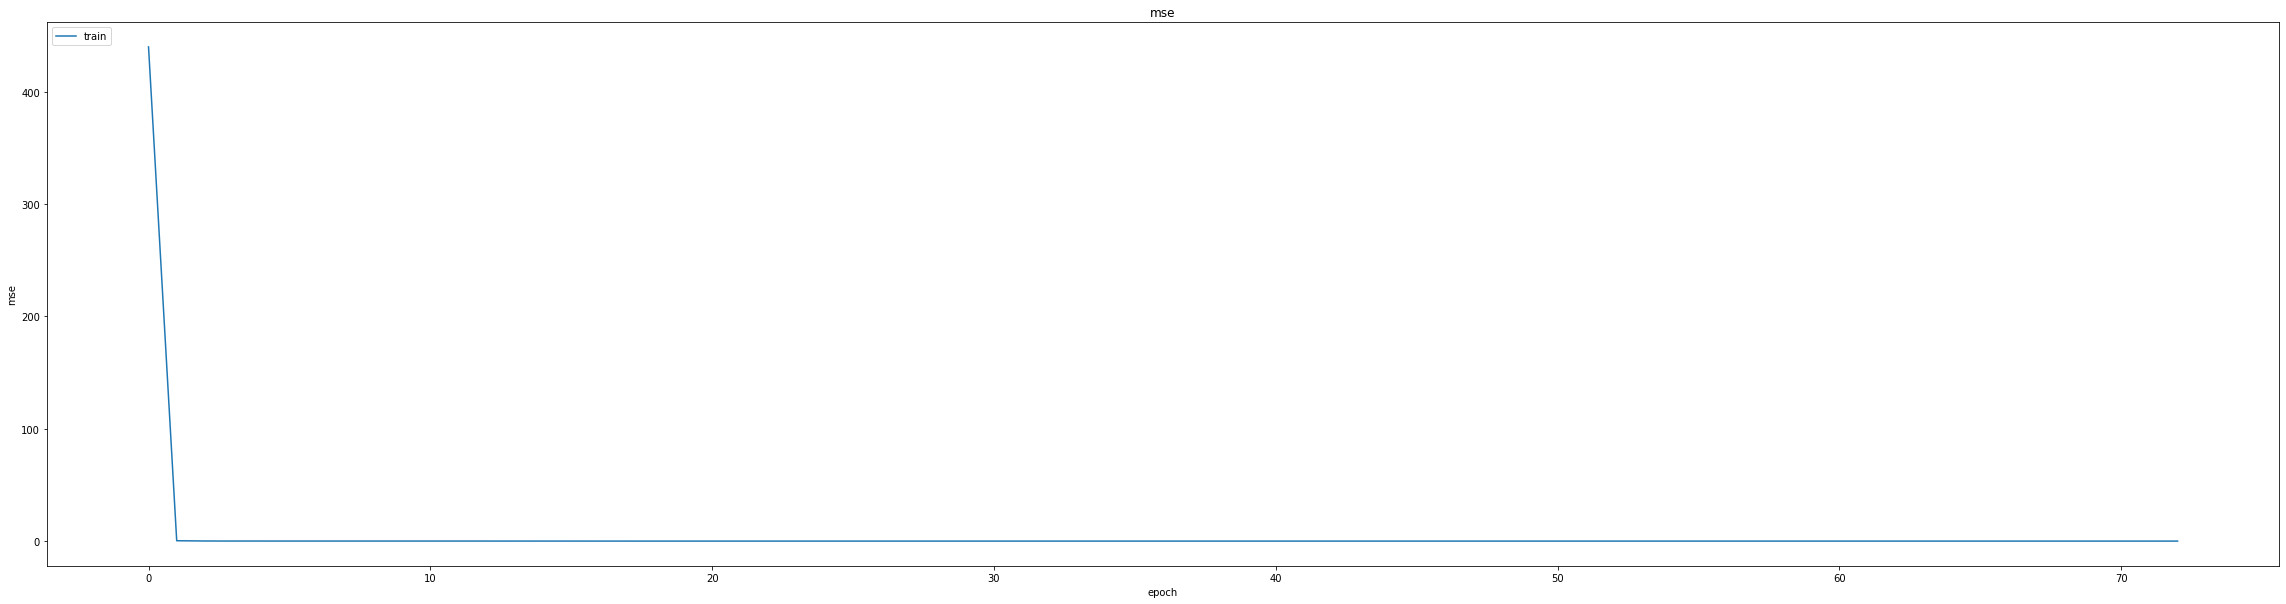

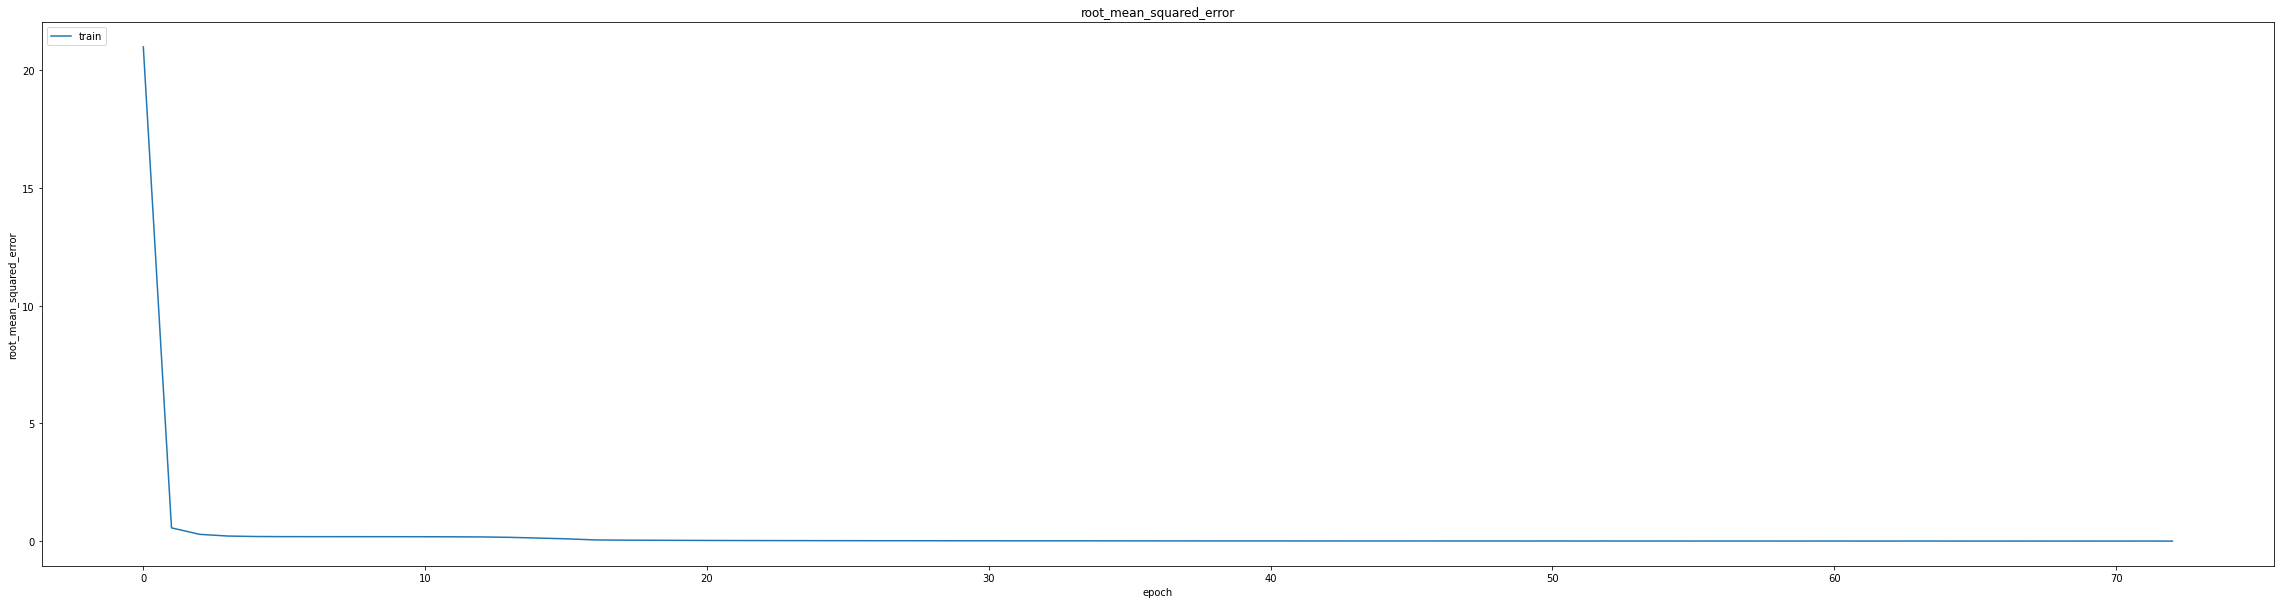

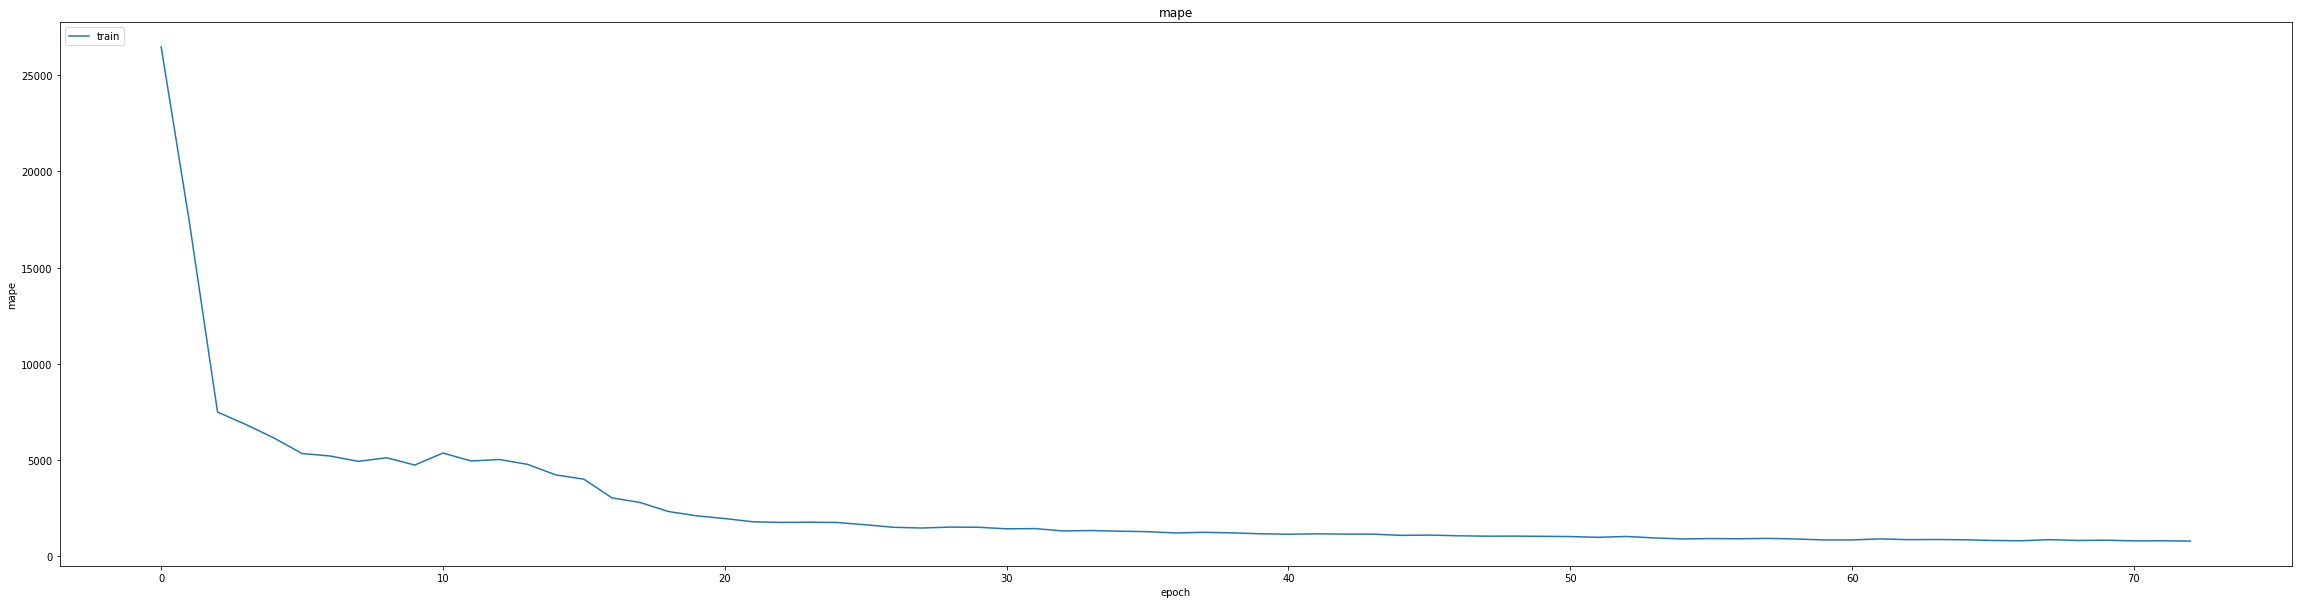

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.013129647821187973
0.0170939601957798
234/234 [==============================] - 12s 40ms/step
0.9771013543026997


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD15_BiLSTM")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 8.7359e-04 - mae: 0.0120 - mse: 8.7359e-04 - root_mean_squared_error: 0.0296 - mape: 1667.2079
Epoch 1: val_mse did not improve from 0.00029
464/464 [==============================] - 162s 323ms/step - loss: 8.7359e-04 - mae: 0.0120 - mse: 8.7359e-04 - root_mean_squared_error: 0.0296 - mape: 1667.2079 - val_loss: 3.4350e-04 - val_mae: 0.0143 - val_mse: 3.4350e-04 - val_root_mean_squared_error: 0.0185 - val_mape: 9348.6973 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 6.3204e-05 - mae: 0.0056 - mse: 6.3204e-05 - root_mean_squared_error: 0.0080 - mape: 1080.3789
Epoch 2: val_mse did not improve from 0.00029
464/464 [==============================] - 138s 298ms/step - loss: 6.3204e-05 - mae: 0.0056 - mse: 6.3204e-05 - root_mean_squared_error: 0.0080 - mape: 1080.3789 - val_loss: 5.2592e-04 - val_mae: 0.0199 - val_mse: 5.2592e-04 - val_root_mean_squared_error: 0.0229 - val_mape: 9047.

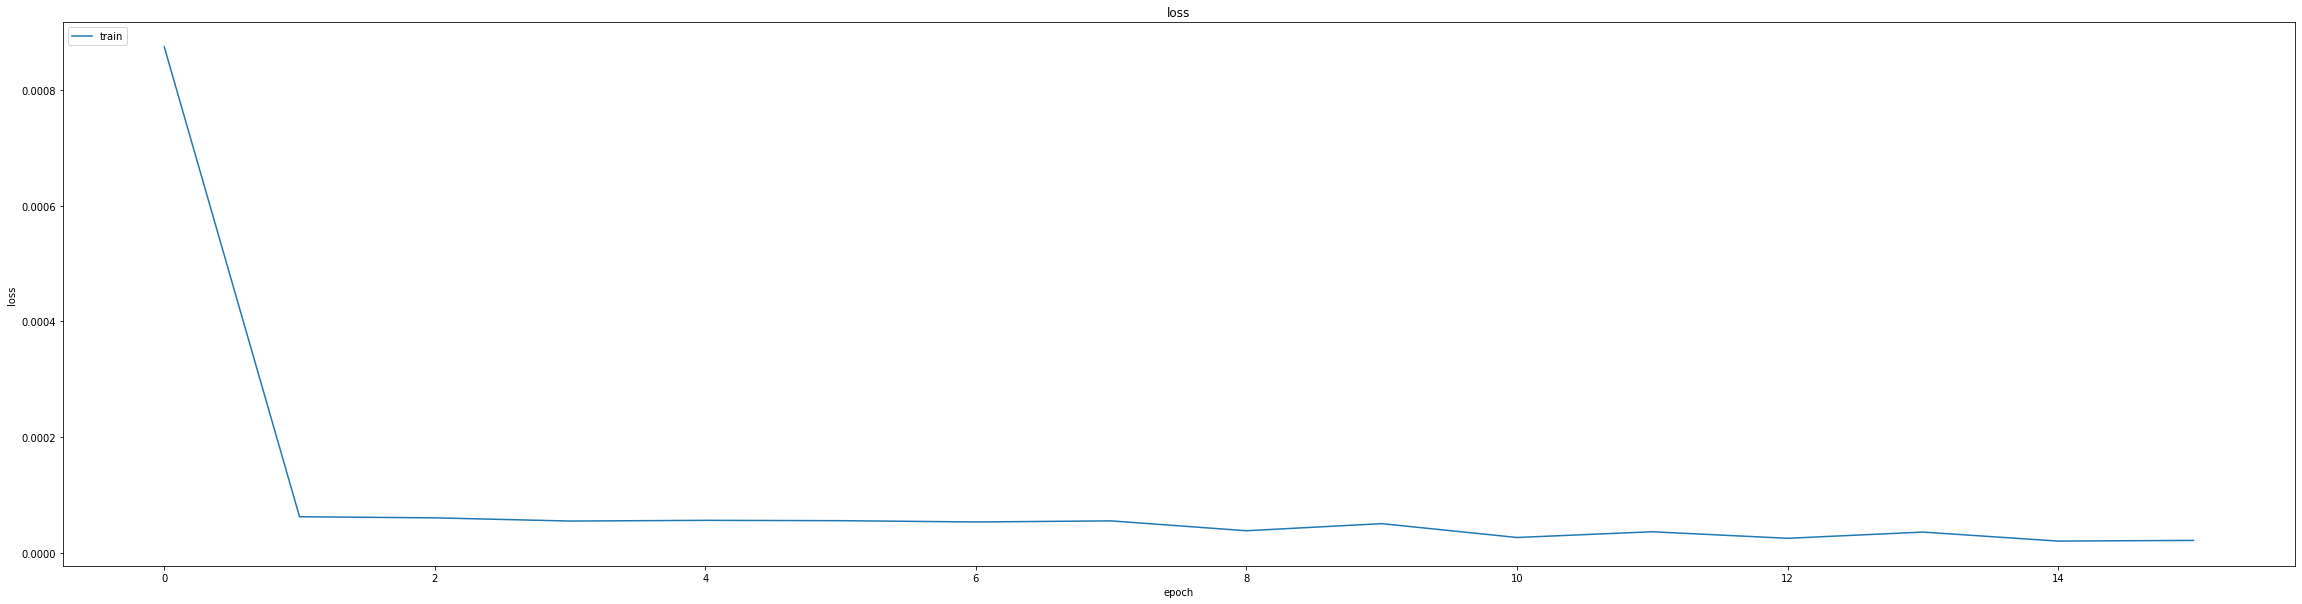

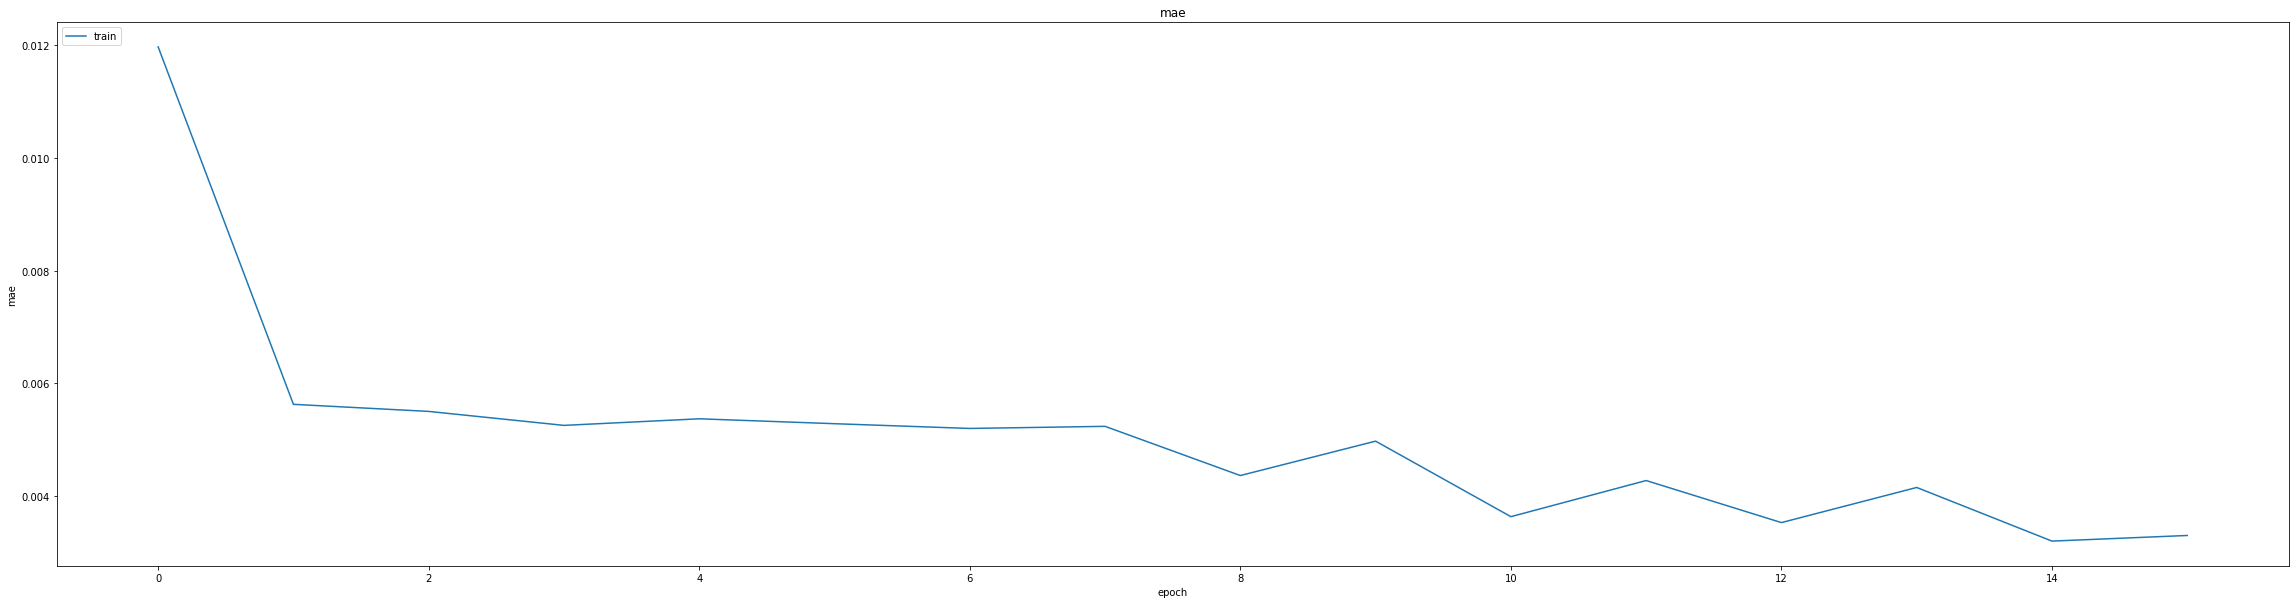

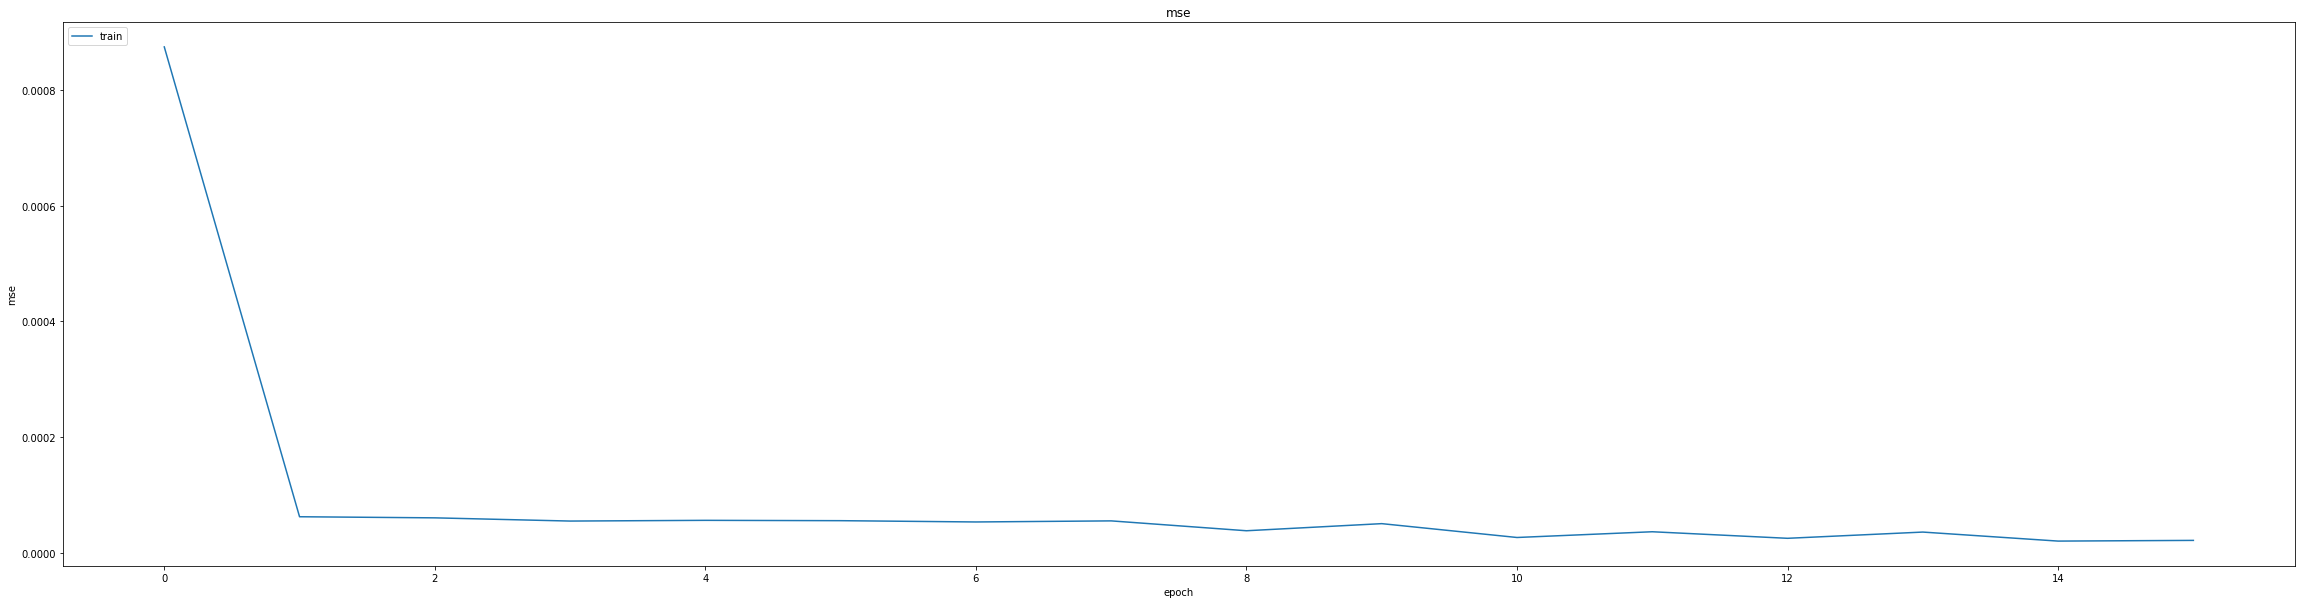

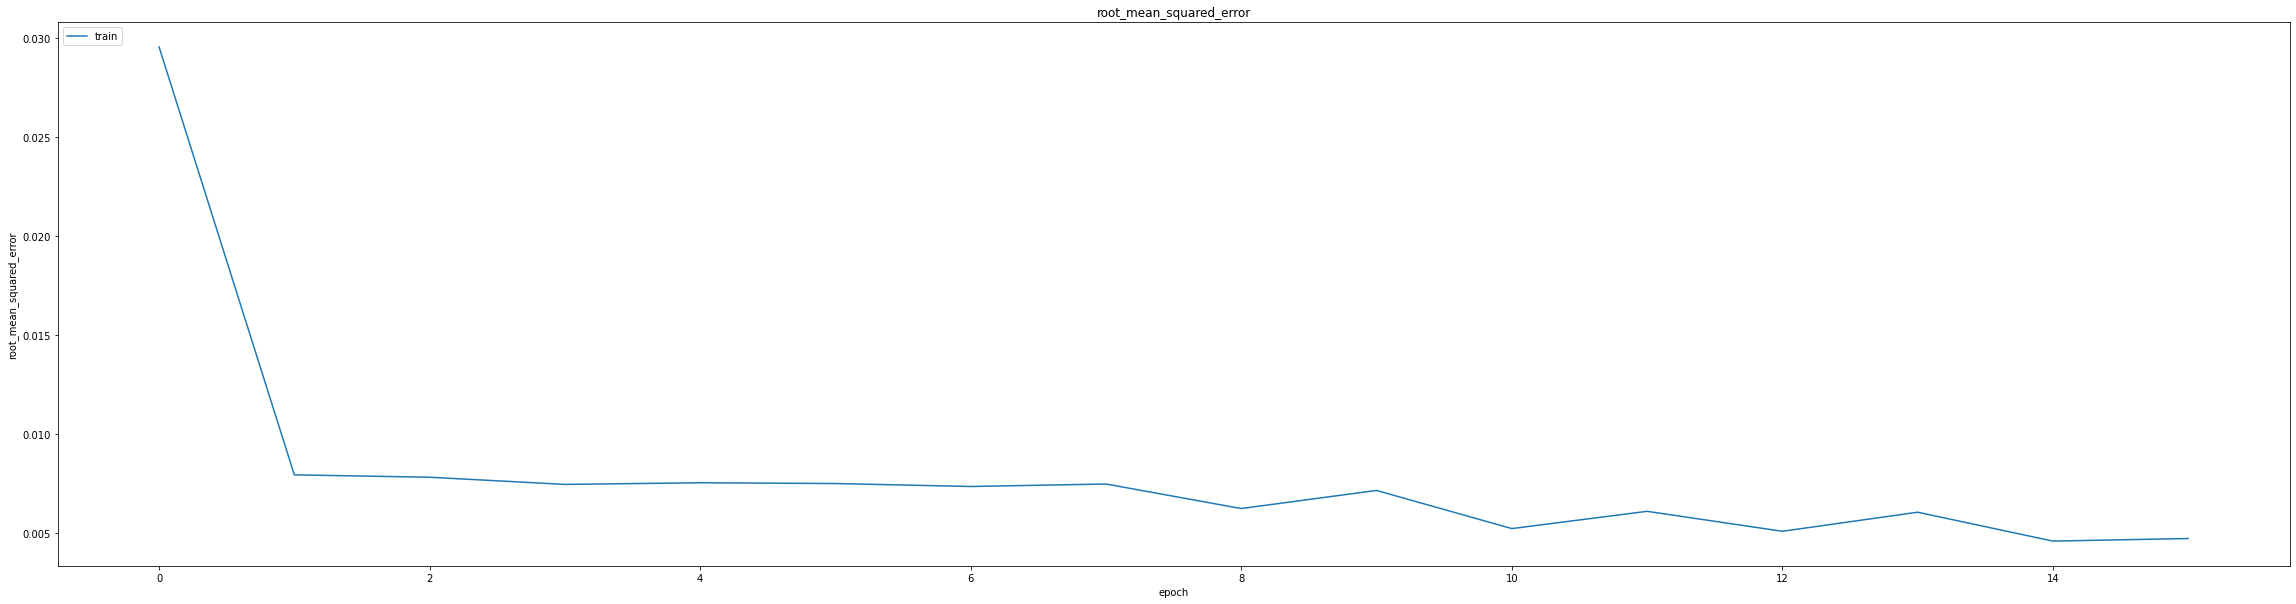

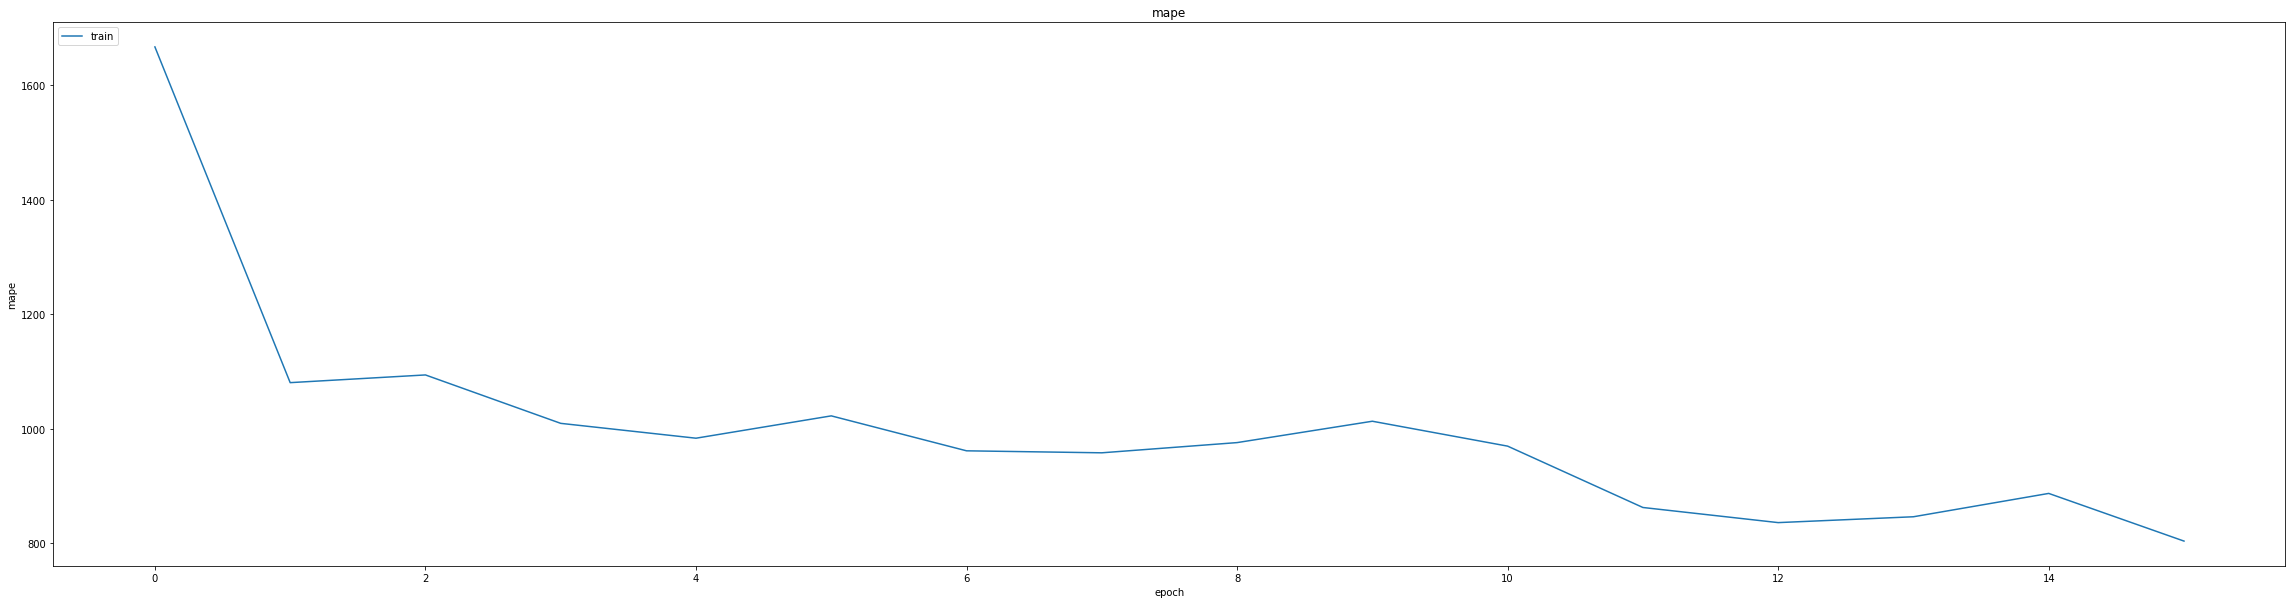

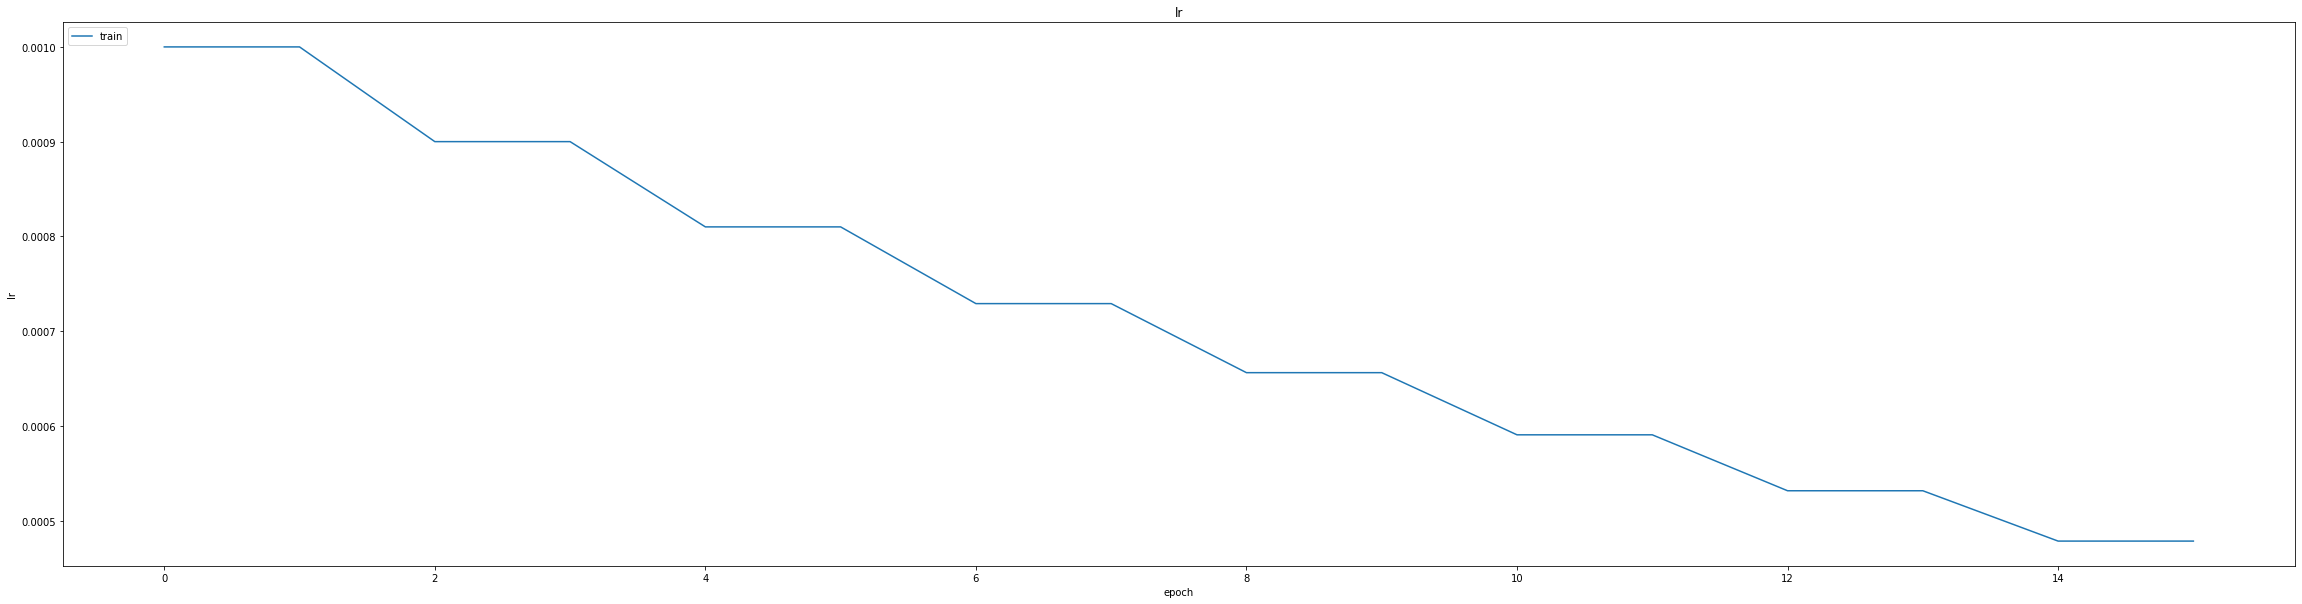

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.014341085217893124
0.018533652648329735
234/234 [==============================] - 12s 41ms/step
0.9747398526684194


234/234 [==============================] - 12s 52ms/step


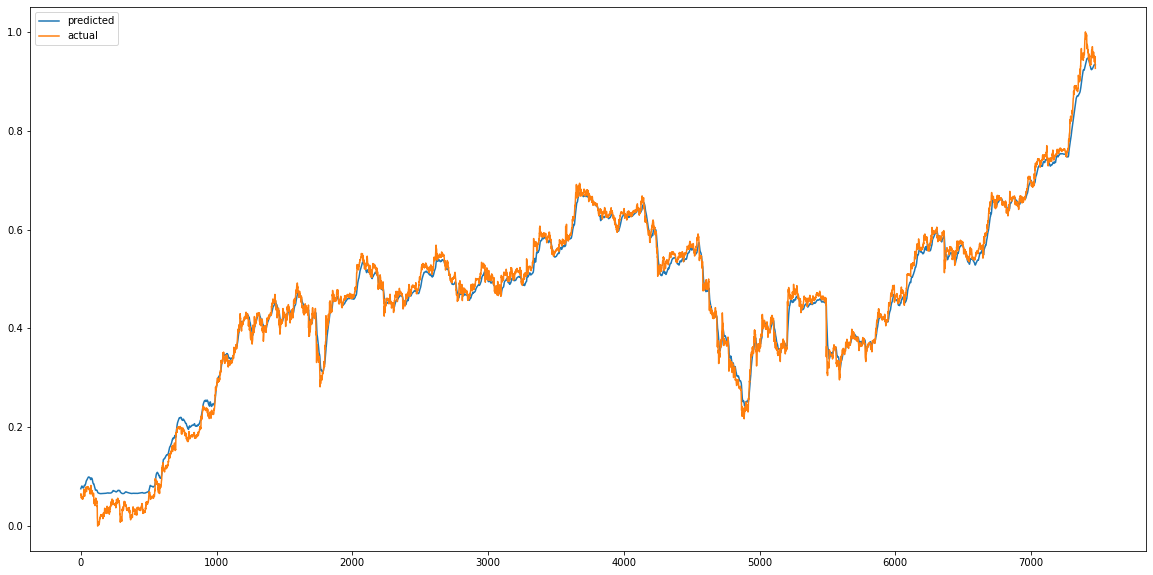

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD15_BiLSTM")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


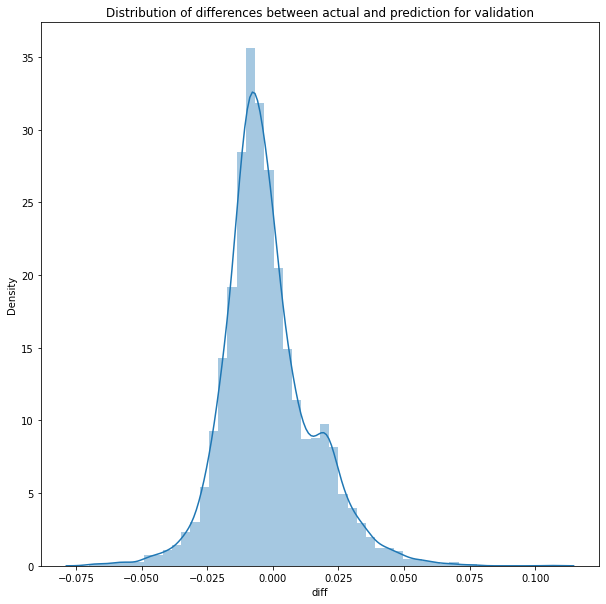

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 9s 41ms/step


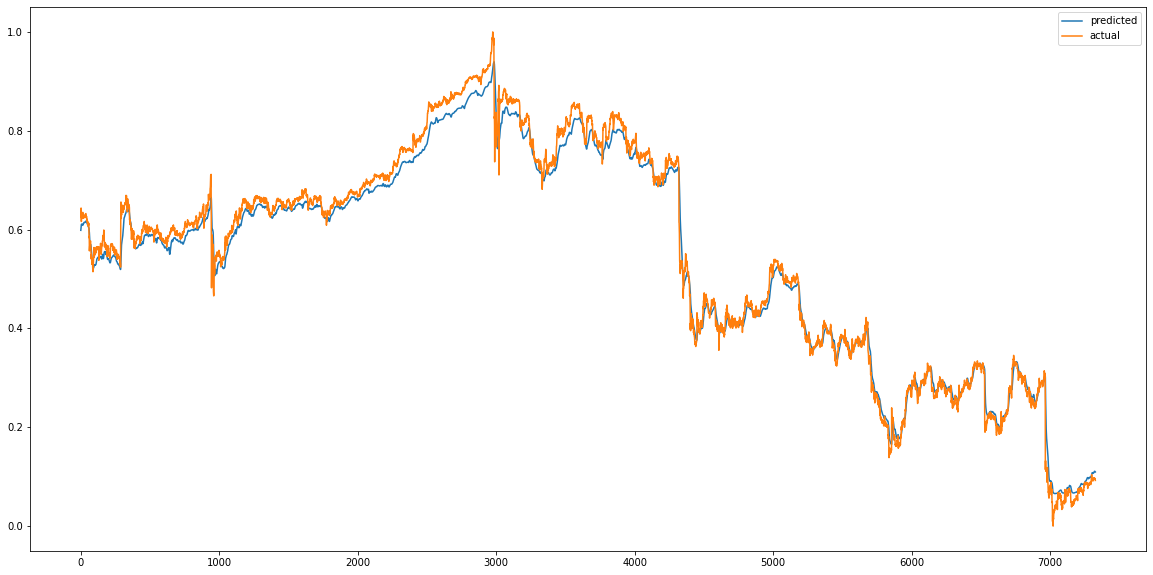

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


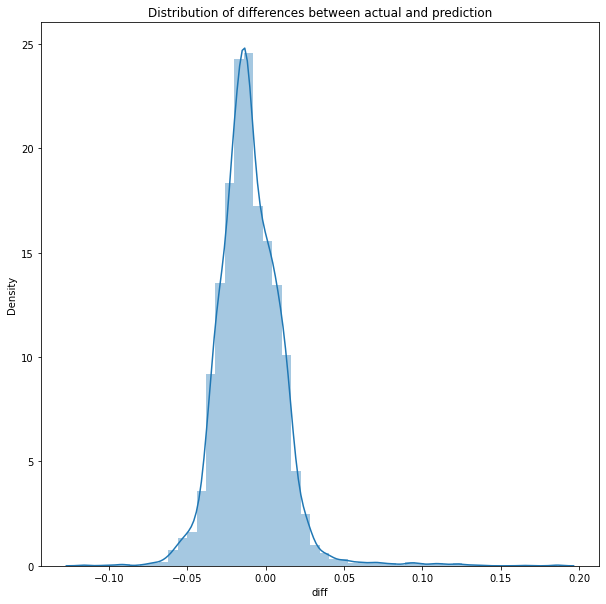

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0005205401958214583
MAE :  0.01763942562181942
RMSE  : 0.022815350004360187
229/229 [==============================] - 9s 41ms/step
R2_Score  : 0.990015681185442


count    7328.000000
mean       -0.010053
std         0.020483
min        -0.116976
25%        -0.022205
50%        -0.011874
75%         0.001682
max         0.186132
Name: diff, dtype: float64

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 256)           275456    
                                                                 
 lstm_1 (LSTM)               (None, 24, 64)            82176     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("JPY15minLSTM.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 908.9955 - mae: 11.2247 - mse: 908.9955 - root_mean_squared_error: 30.1496 - mape: 90198.9297
Epoch 1: val_mse improved from inf to 2.34088, saving model to JPY15minLSTM.hdf5
464/464 [==============================] - 134s 276ms/step - loss: 908.9955 - mae: 11.2247 - mse: 908.9955 - root_mean_squared_error: 30.1496 - mape: 90198.9297 - val_loss: 2.3409 - val_mae: 1.5184 - val_mse: 2.3409 - val_root_mean_squared_error: 1.5300 - val_mape: 265754.3438
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 1.4312 - mae: 1.1463 - mse: 1.4312 - root_mean_squared_error: 1.1963 - mape: 33639.7617
Epoch 2: val_mse improved from 2.34088 to 0.37596, saving model to JPY15minLSTM.hdf5
464/464 [==============================] - 123s 264ms/step - loss: 1.4312 - mae: 1.1463 - mse: 1.4312 - root_mean_squared_error: 1.1963 - mape: 33639.7617 - val_loss: 0.3760 - val_mae: 0.5837 - val_mse: 0.3760 - val_root_mean_squared_

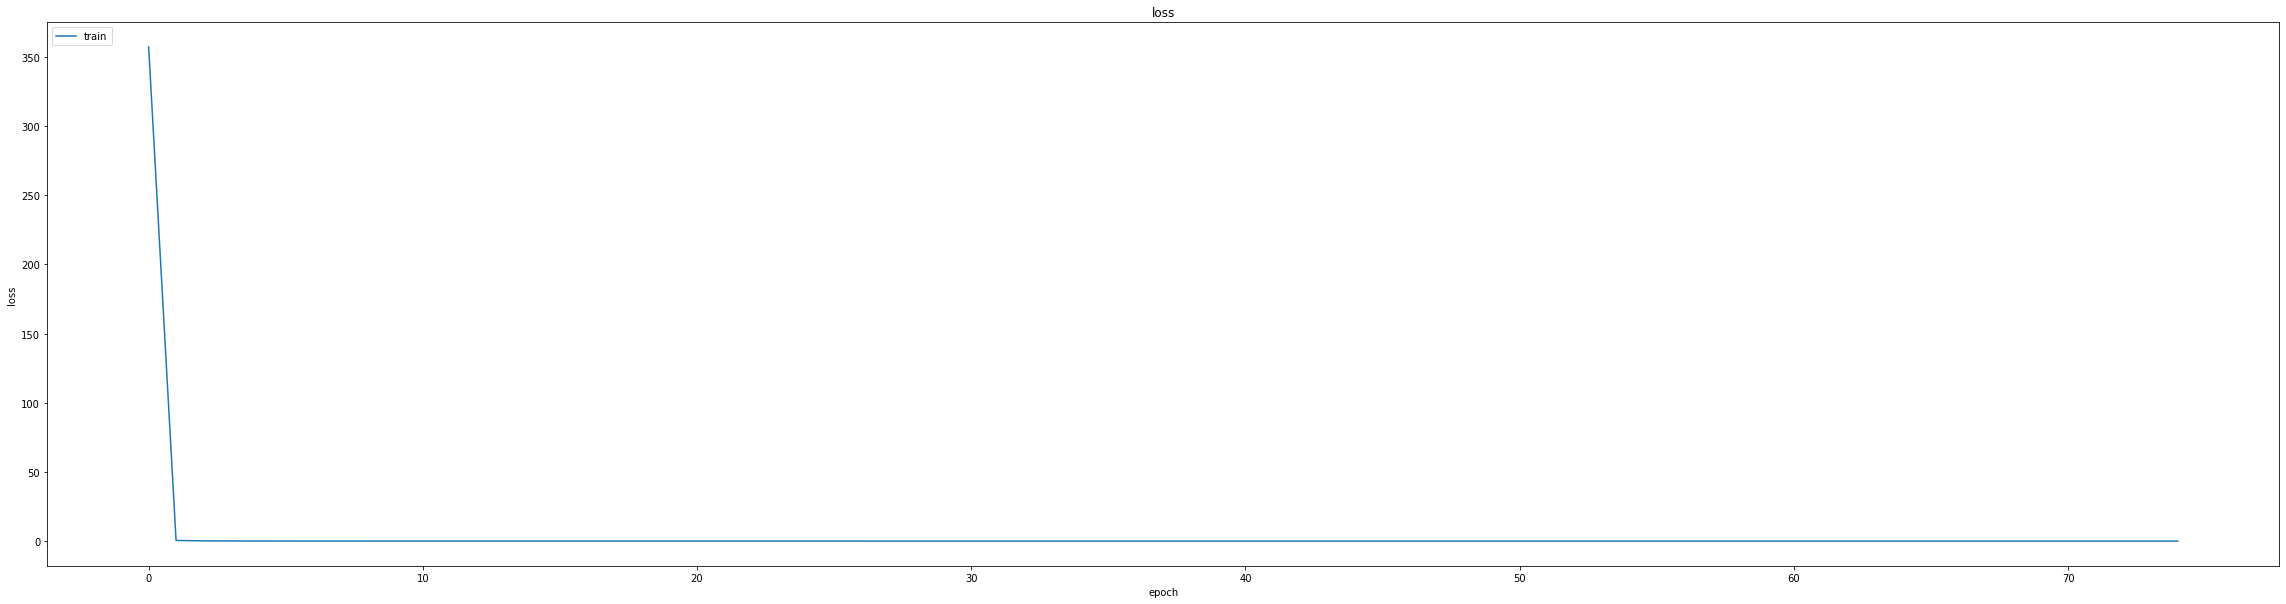

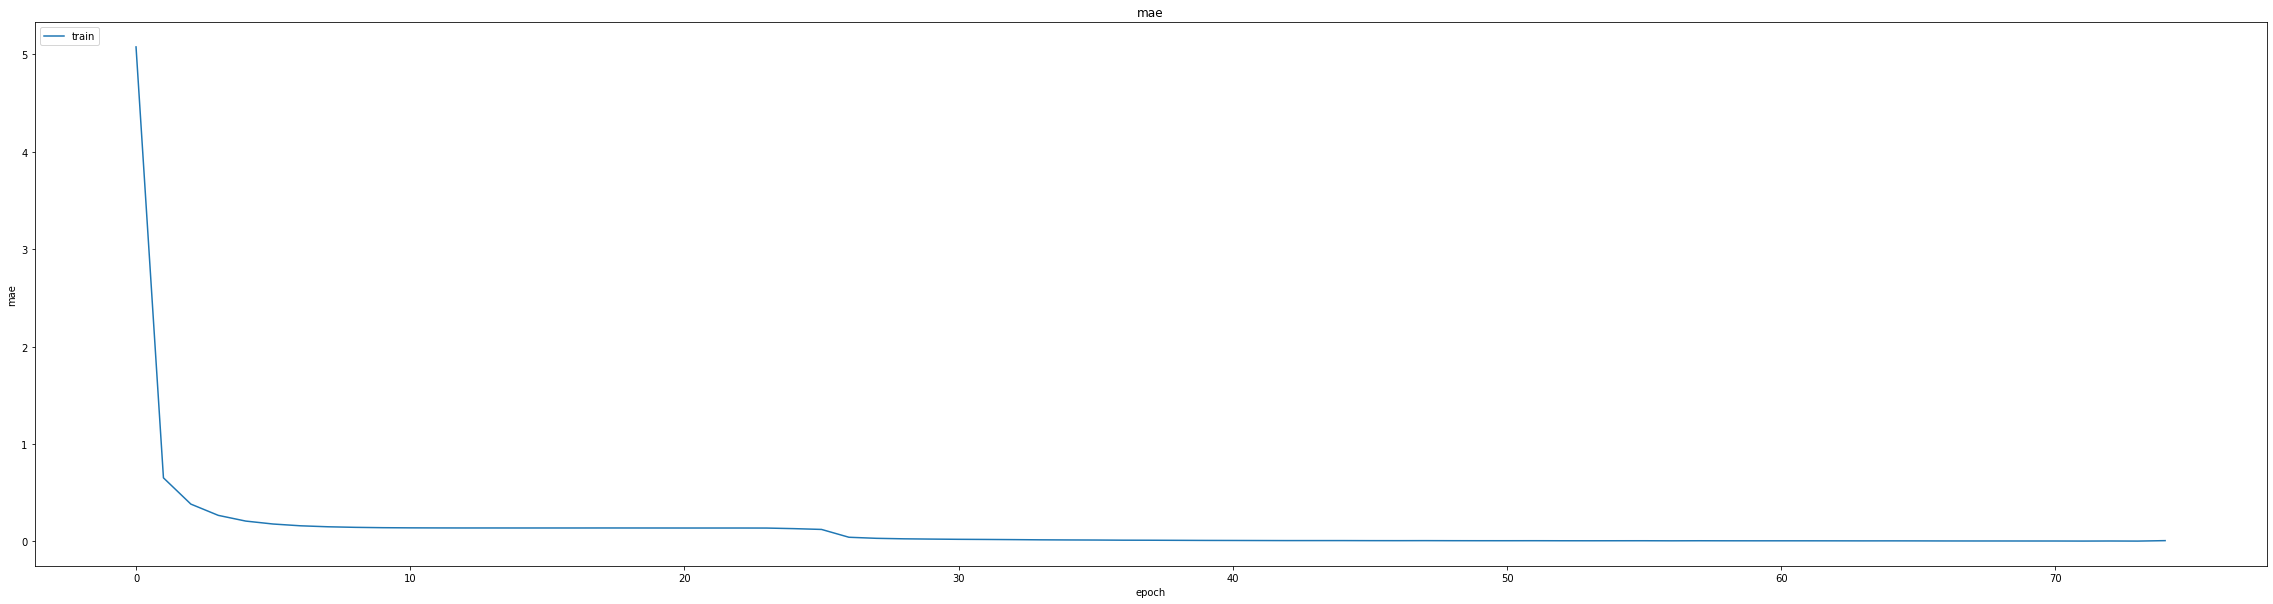

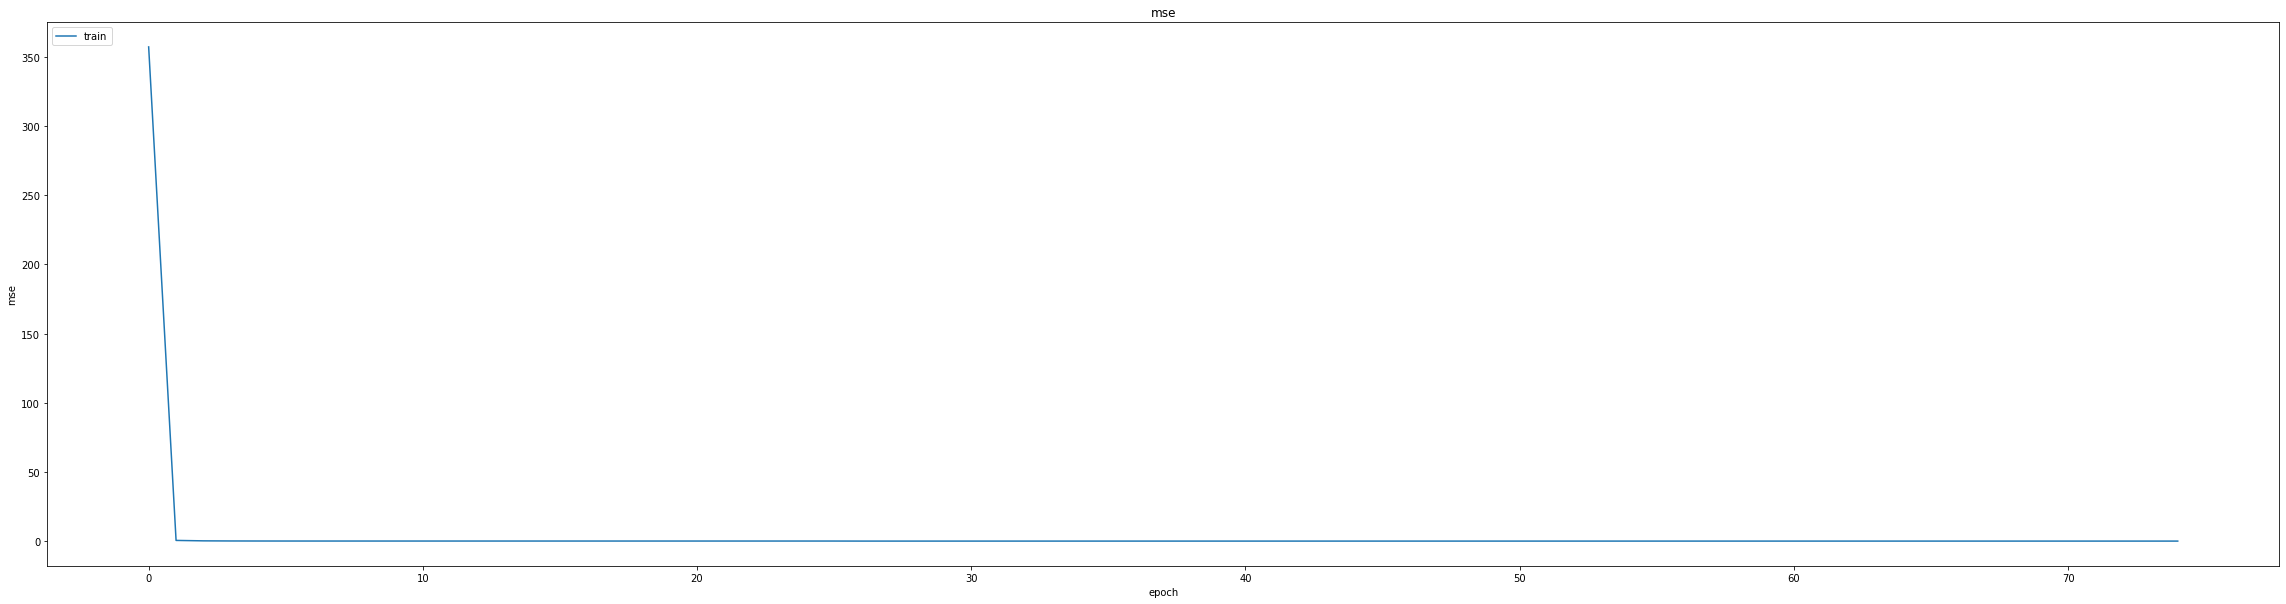

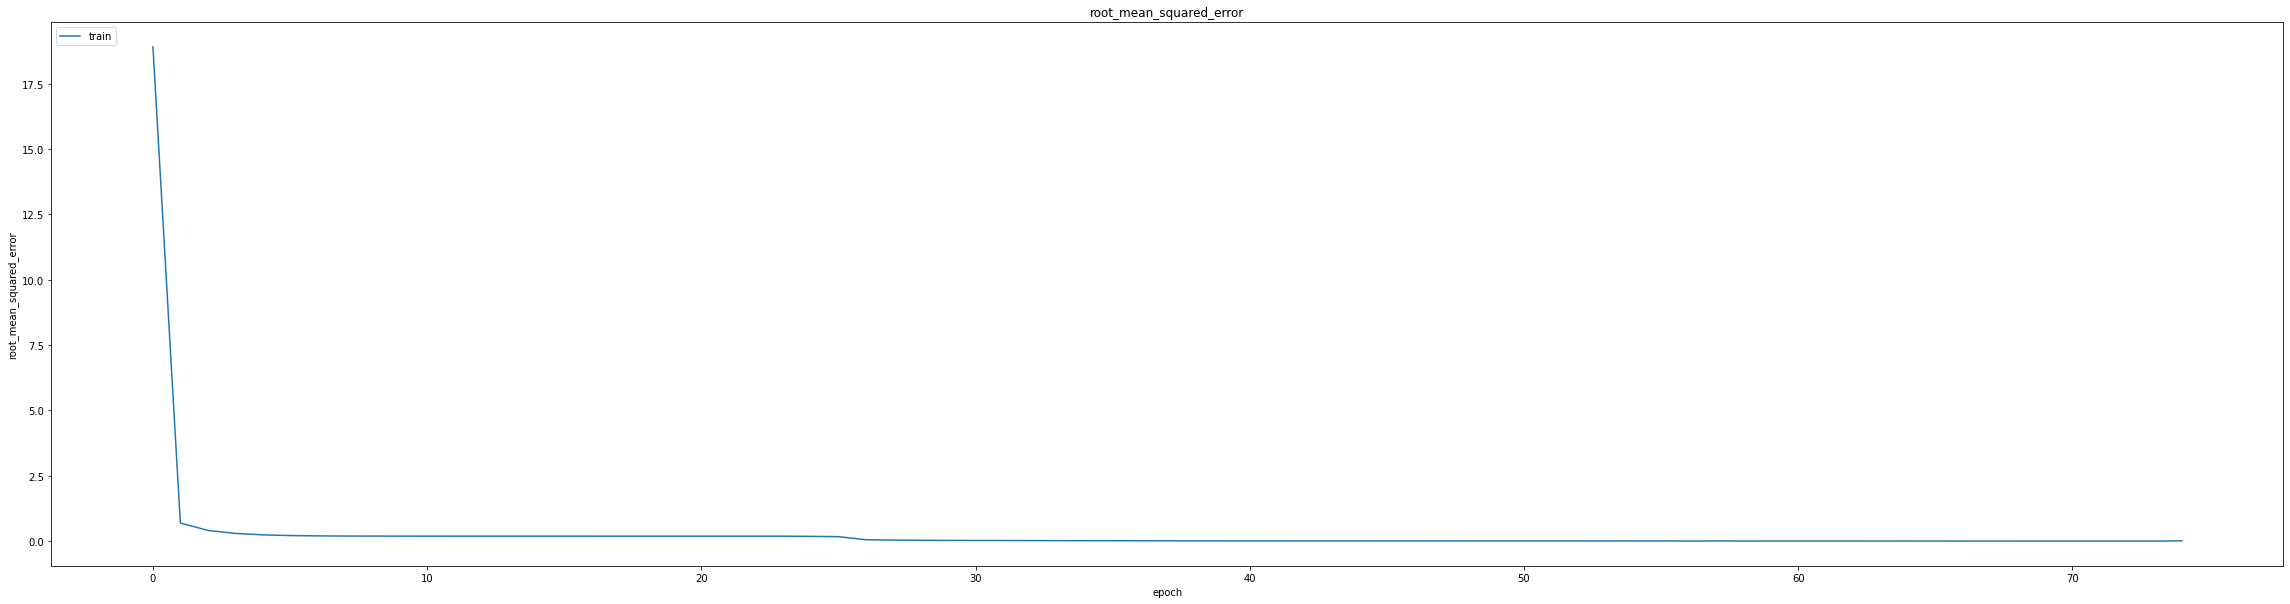

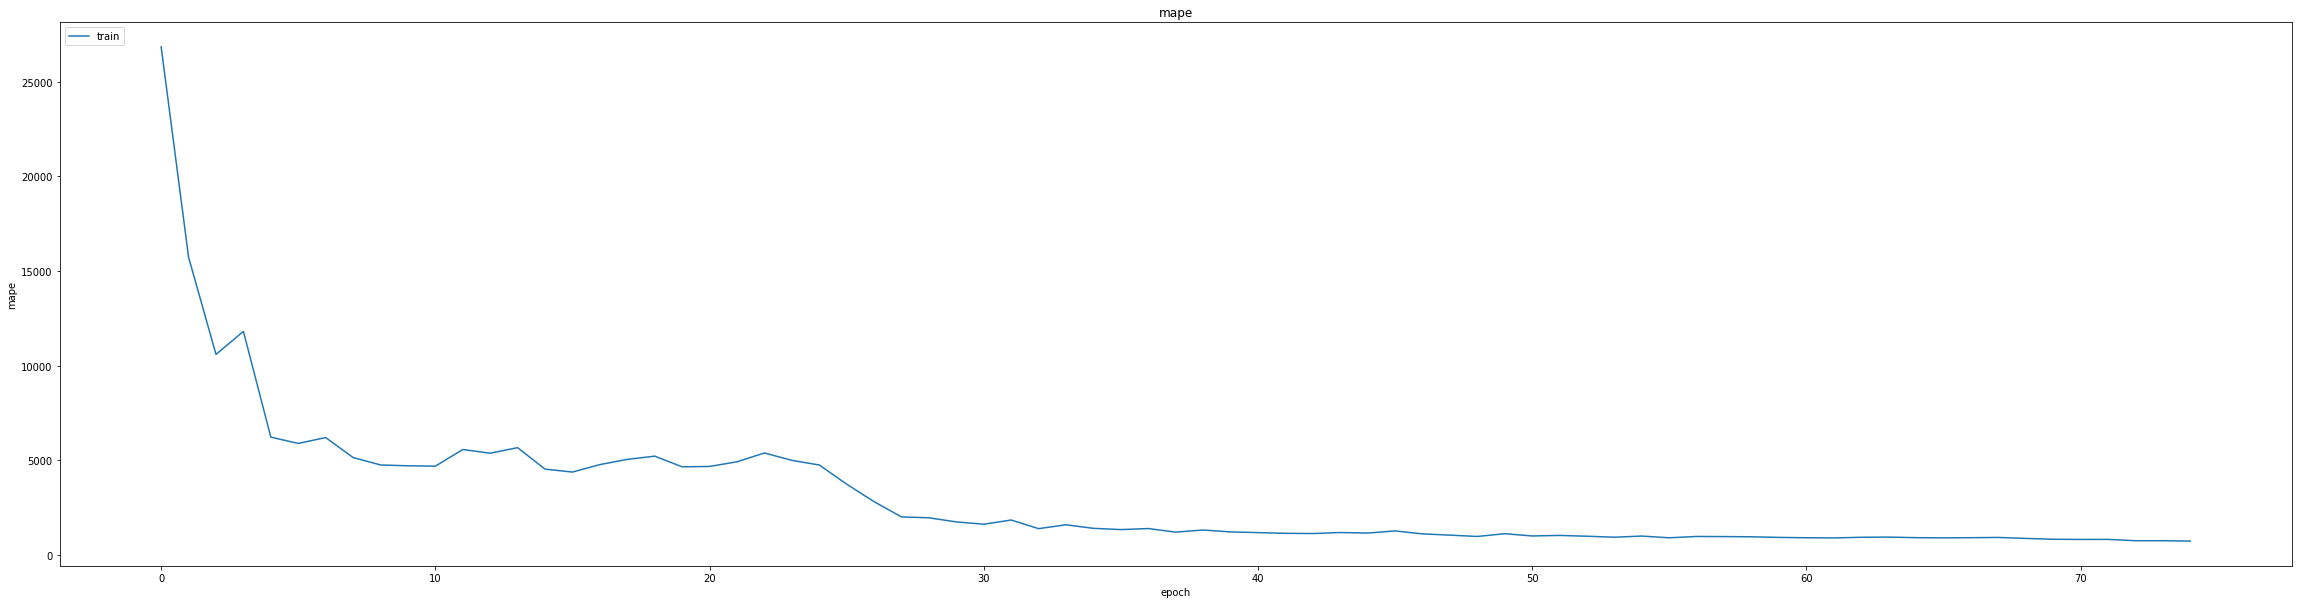

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

In [ ]:
model.load_weights("JPY15minLSTM.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(75/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 0.0028 - mae: 0.0276 - mse: 0.0028 - root_mean_squared_error: 0.0531 - mape: 1672.8560
Epoch 1: val_mse did not improve from 0.00072
464/464 [==============================] - 171s 356ms/step - loss: 0.0028 - mae: 0.0276 - mse: 0.0028 - root_mean_squared_error: 0.0531 - mape: 1672.8560 - val_loss: 0.0013 - val_mae: 0.0305 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0366 - val_mape: 9295.3105 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 2.3924e-04 - mae: 0.0113 - mse: 2.3924e-04 - root_mean_squared_error: 0.0155 - mape: 1115.5219
Epoch 2: val_mse did not improve from 0.00072
464/464 [==============================] - 128s 275ms/step - loss: 2.3924e-04 - mae: 0.0113 - mse: 2.3924e-04 - root_mean_squared_error: 0.0155 - mape: 1115.5219 - val_loss: 0.0015 - val_mae: 0.0295 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0393 - val_mape: 7324.3672 - lr: 0.0010
lr changed to 

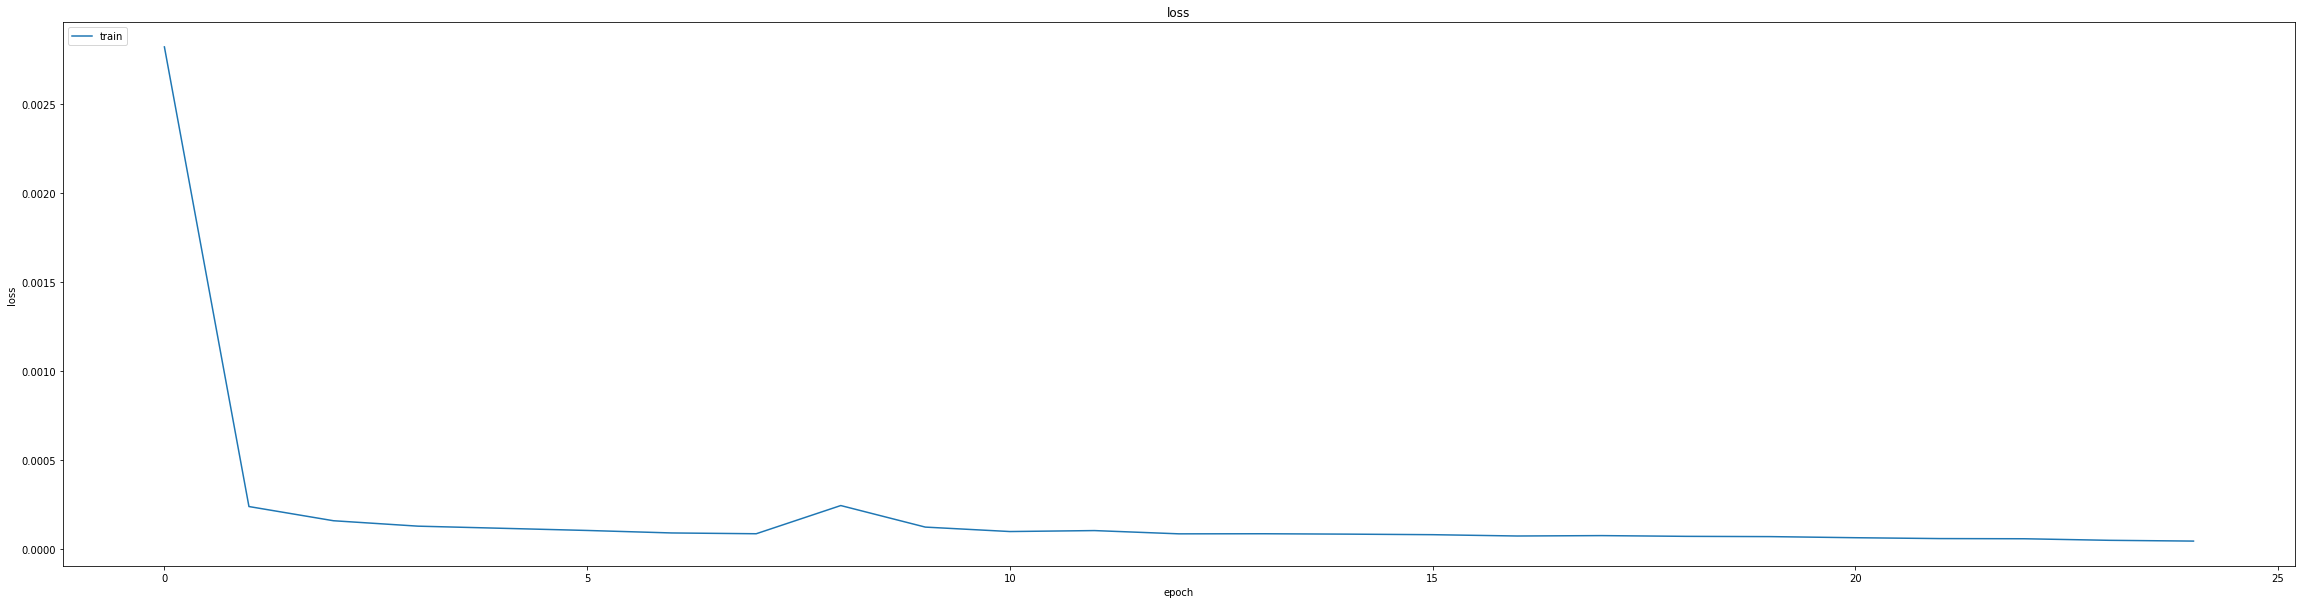

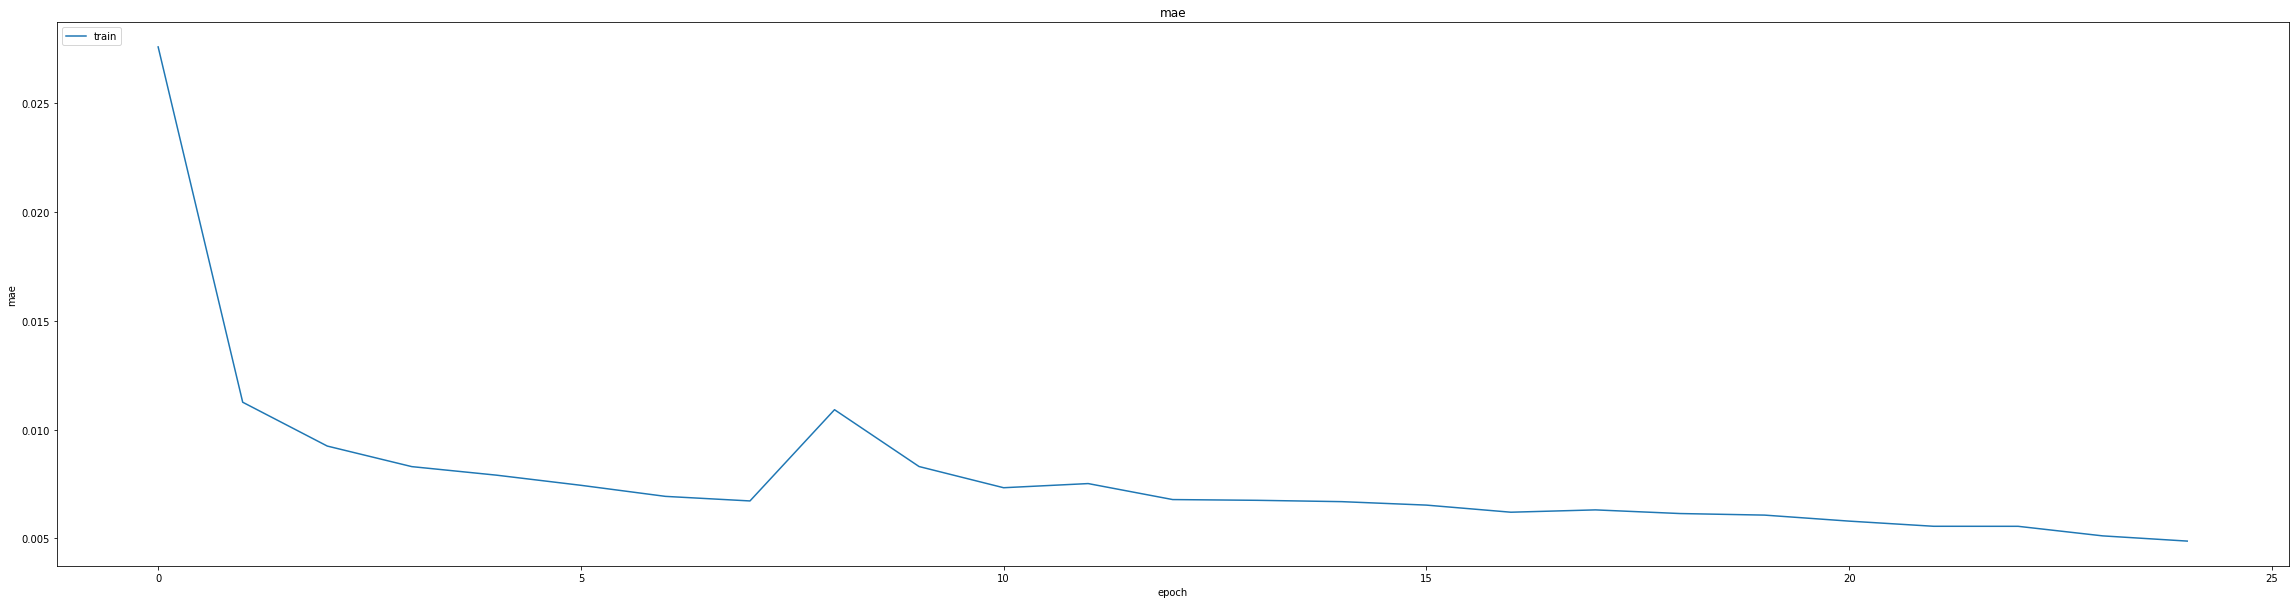

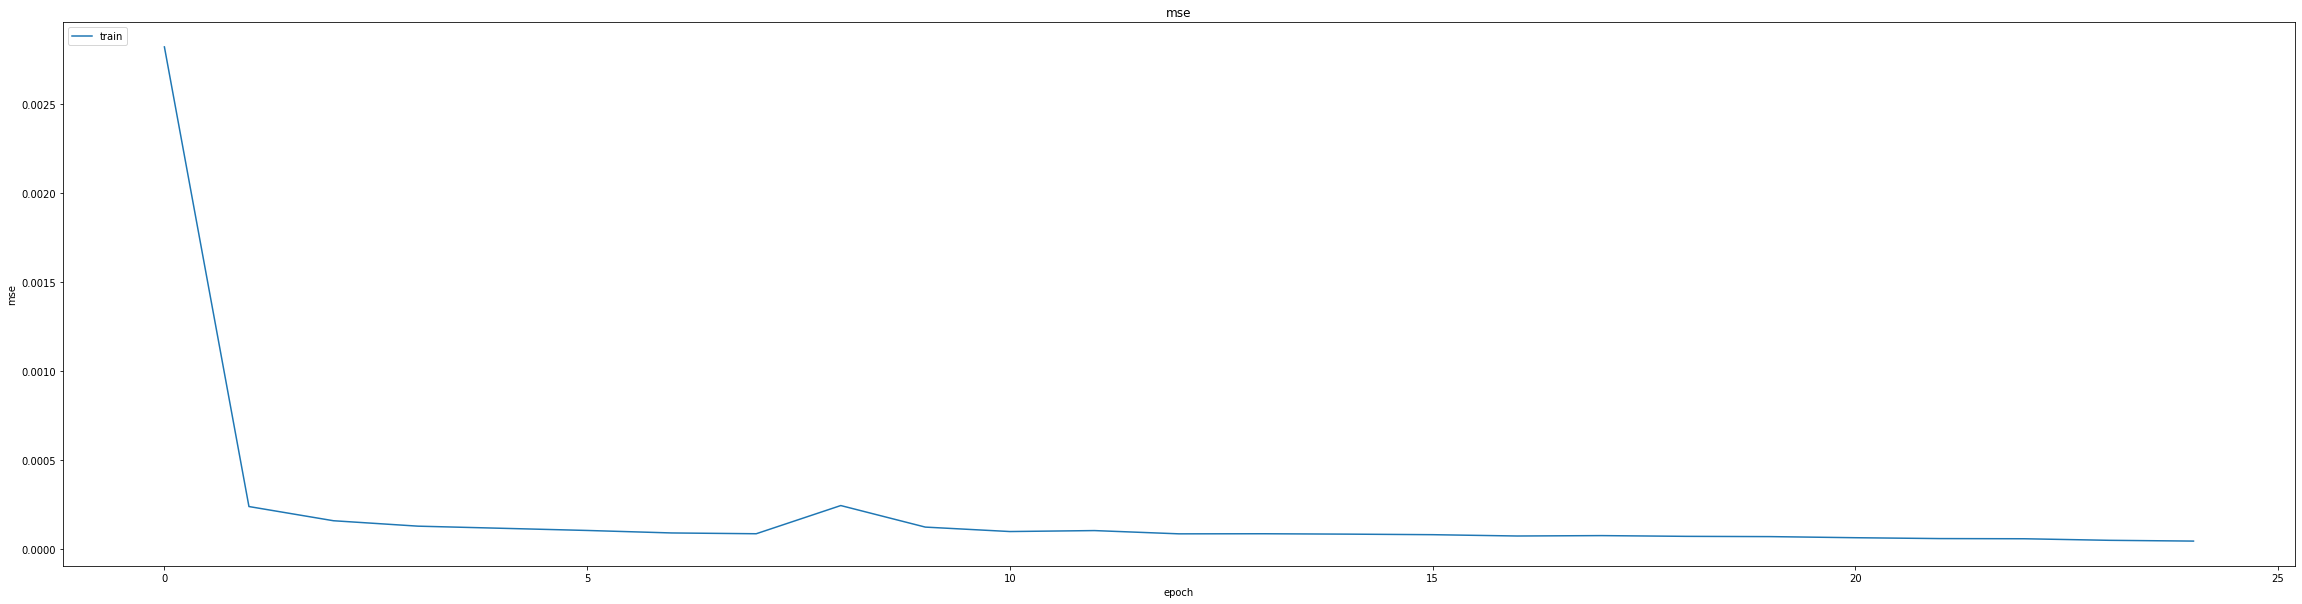

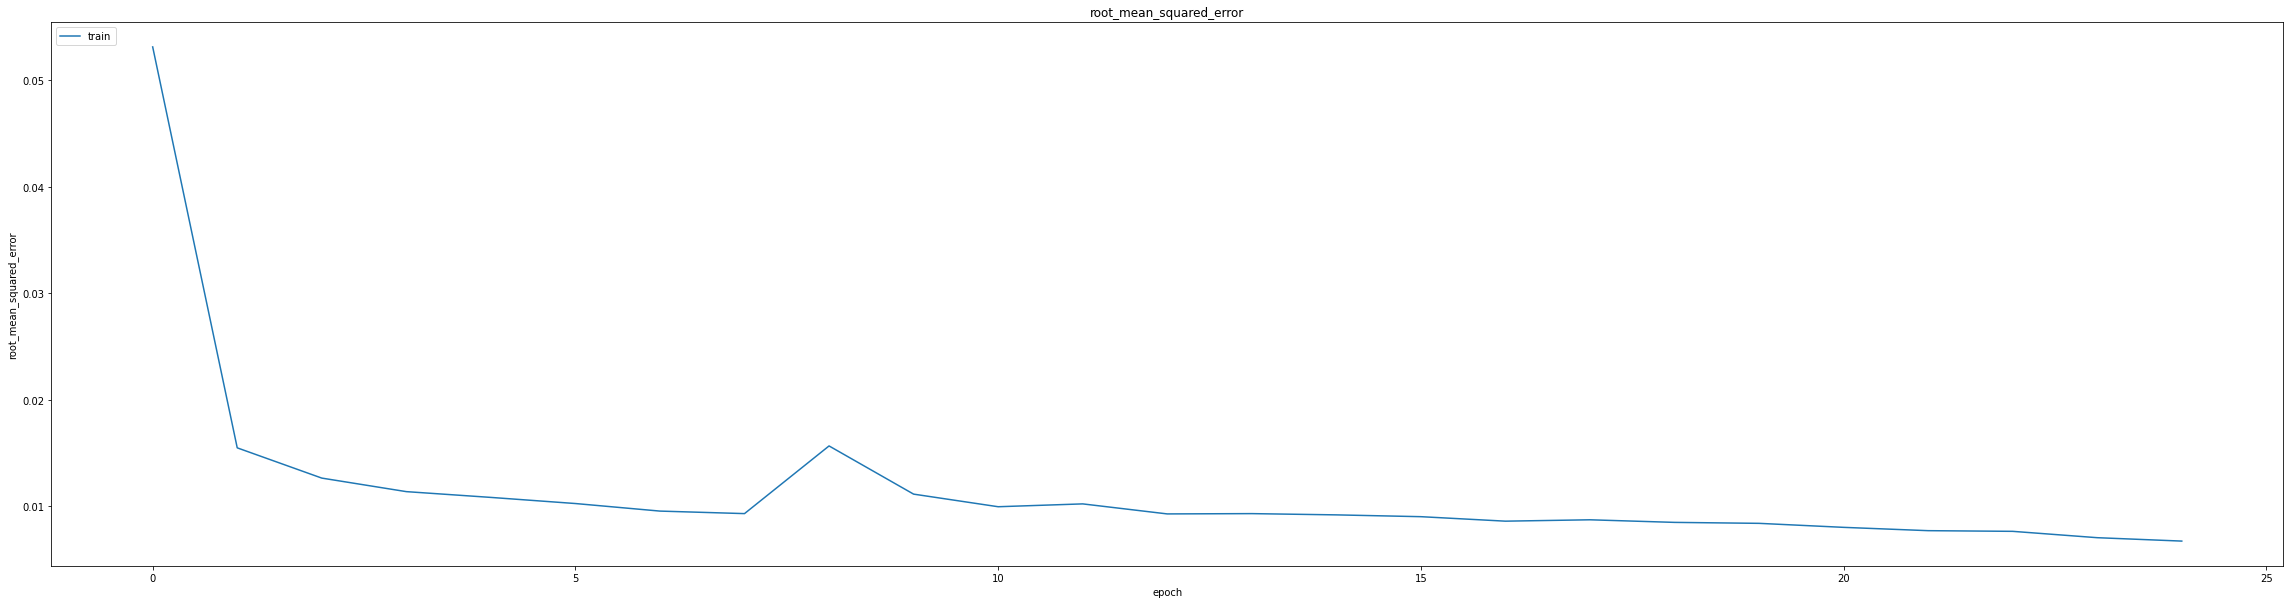

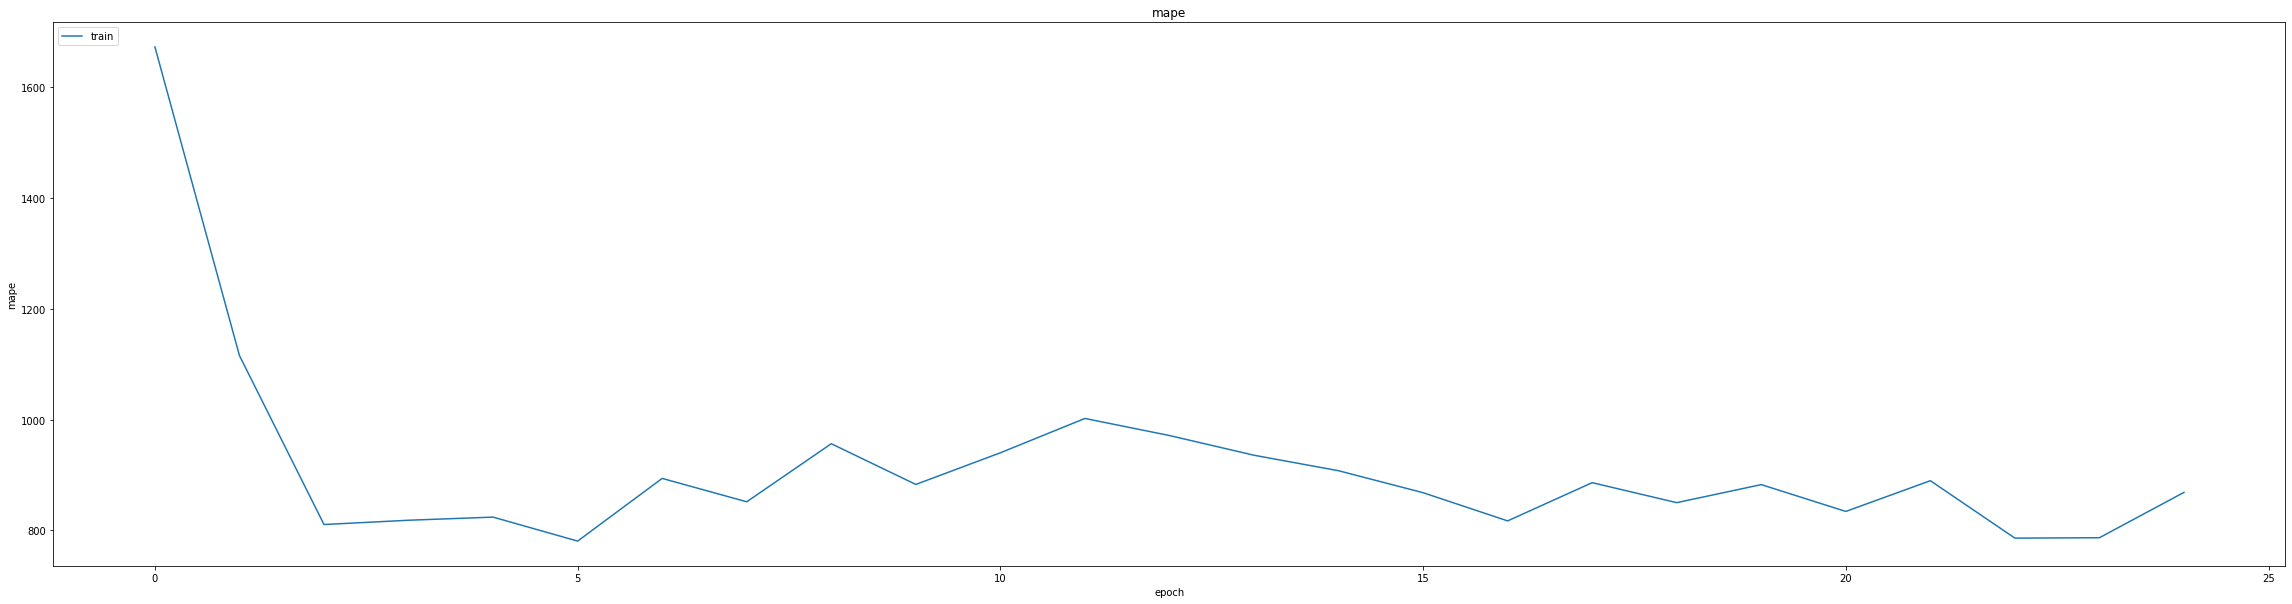

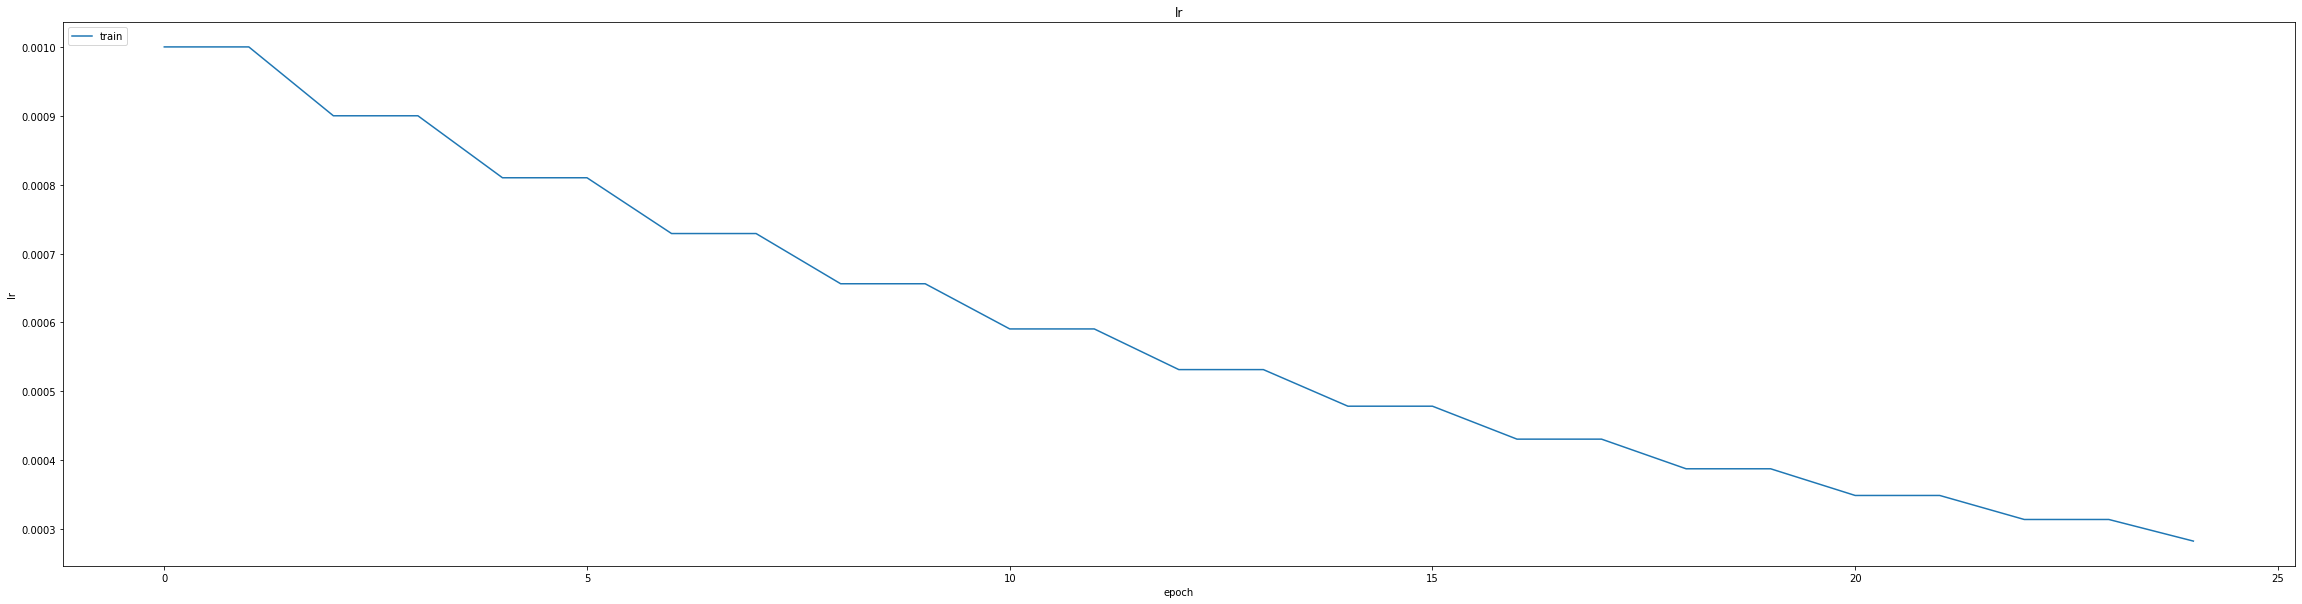

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.02152843214571476
0.026855628937482834
234/234 [==============================] - 11s 39ms/step
0.968962405241803


234/234 [==============================] - 13s 54ms/step


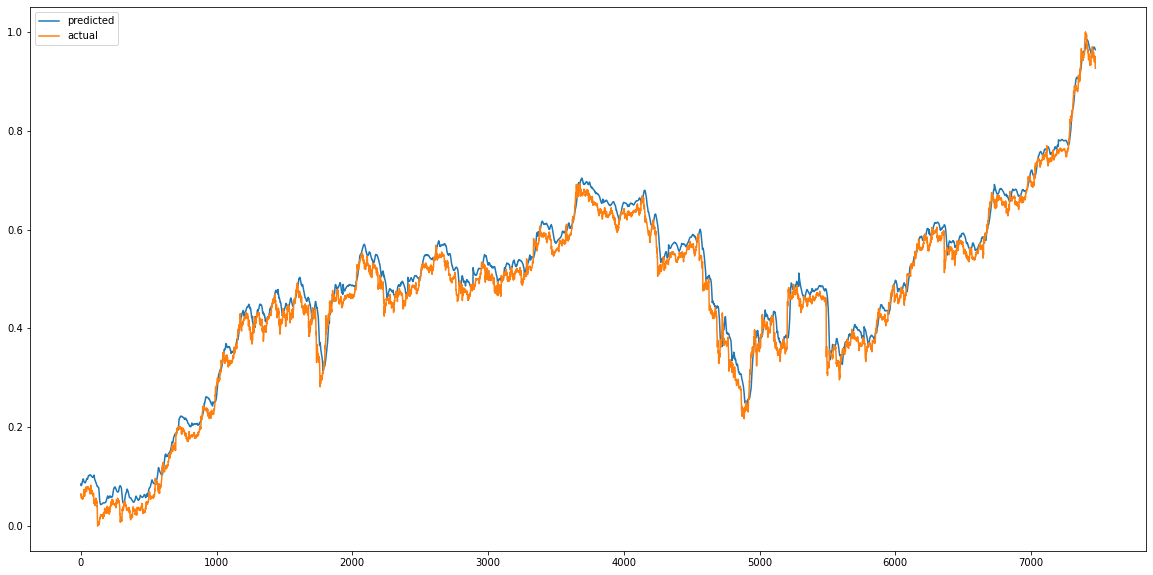

In [ ]:
model.load_weights("JPY15minLSTM.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


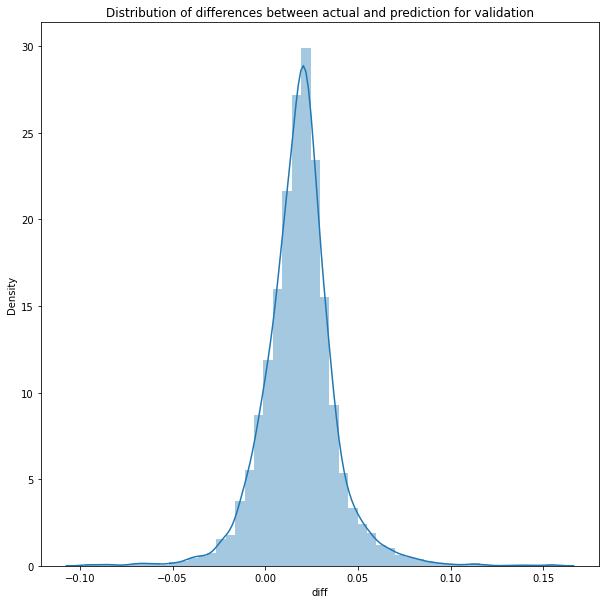

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 9s 39ms/step


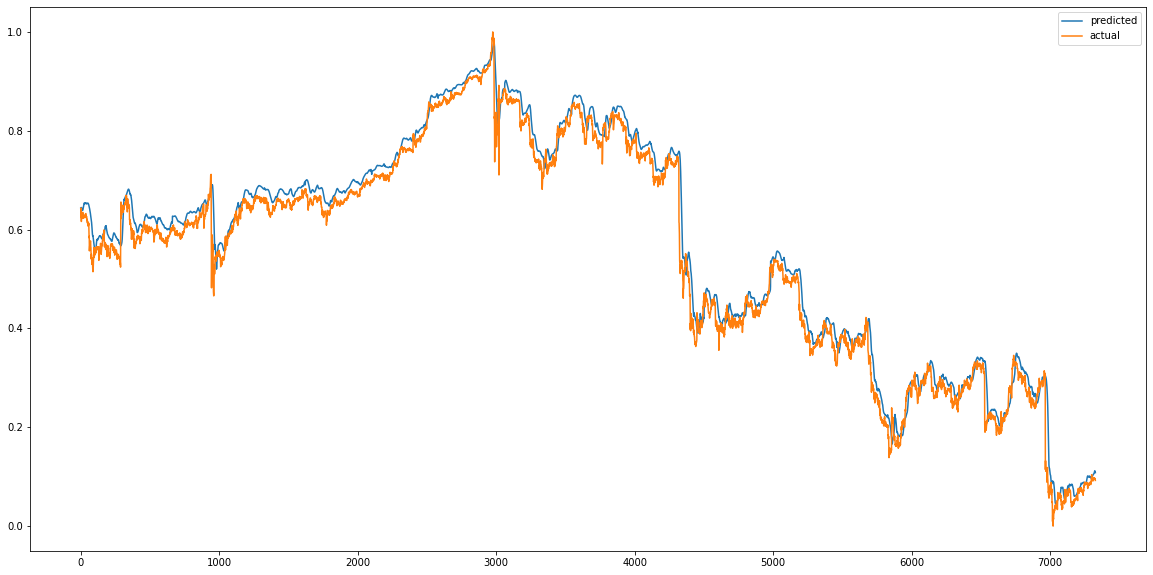

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


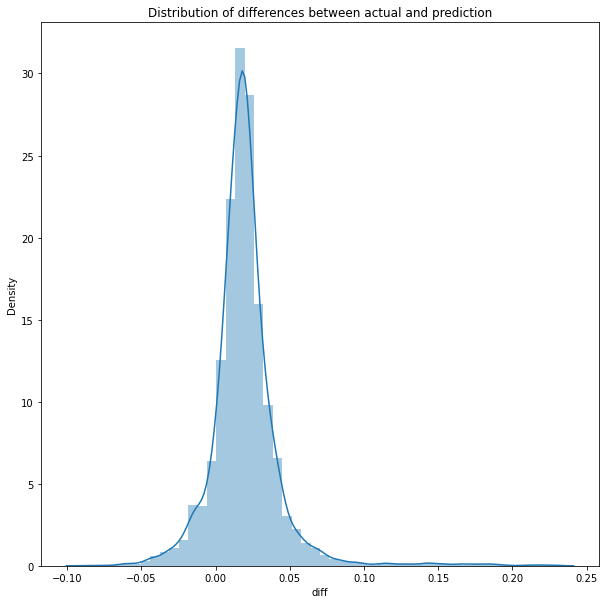

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0009643948801368277
MAE :  0.023075446480372717
RMSE  : 0.031054707857856717
229/229 [==============================] - 9s 39ms/step
R2_Score  : 0.9815022432002938


count    7328.000000
mean        0.019777
std         0.023945
min        -0.088444
25%         0.009412
50%         0.018282
75%         0.027197
max         0.229063
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          197632    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 159.8409 - mae: 1.3567 - mse: 159.8409 - root_mean_squared_error: 12.6428 - mape: 5923.0669
Epoch 1: val_mse improved from inf to 0.05020, saving model to weights.best.hdf5
464/464 [==============================] - 153s 310ms/step - loss: 159.8409 - mae: 1.3567 - mse: 159.8409 - root_mean_squared_error: 12.6428 - mape: 5923.0669 - val_loss: 0.0502 - val_mae: 0.1937 - val_mse: 0.0502 - val_root_mean_squared_error: 0.2240 - val_mape: 41898.6211
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0157 - mae: 0.0910 - mse: 0.0157 - root_mean_squared_error: 0.1254 - mape: 4271.6655
Epoch 2: val_mse improved from 0.05020 to 0.00683, saving model to weights.best.hdf5
464/464 [==============================] - 140s 302ms/step - loss: 0.0157 - mae: 0.0910 - mse: 0.0157 - root_mean_squared_error: 0.1254 - mape: 4271.6655 - val_loss: 0.0068 - val_mae: 0.0693 - val_mse: 0.0068 - val_root_mean_squared_error: 

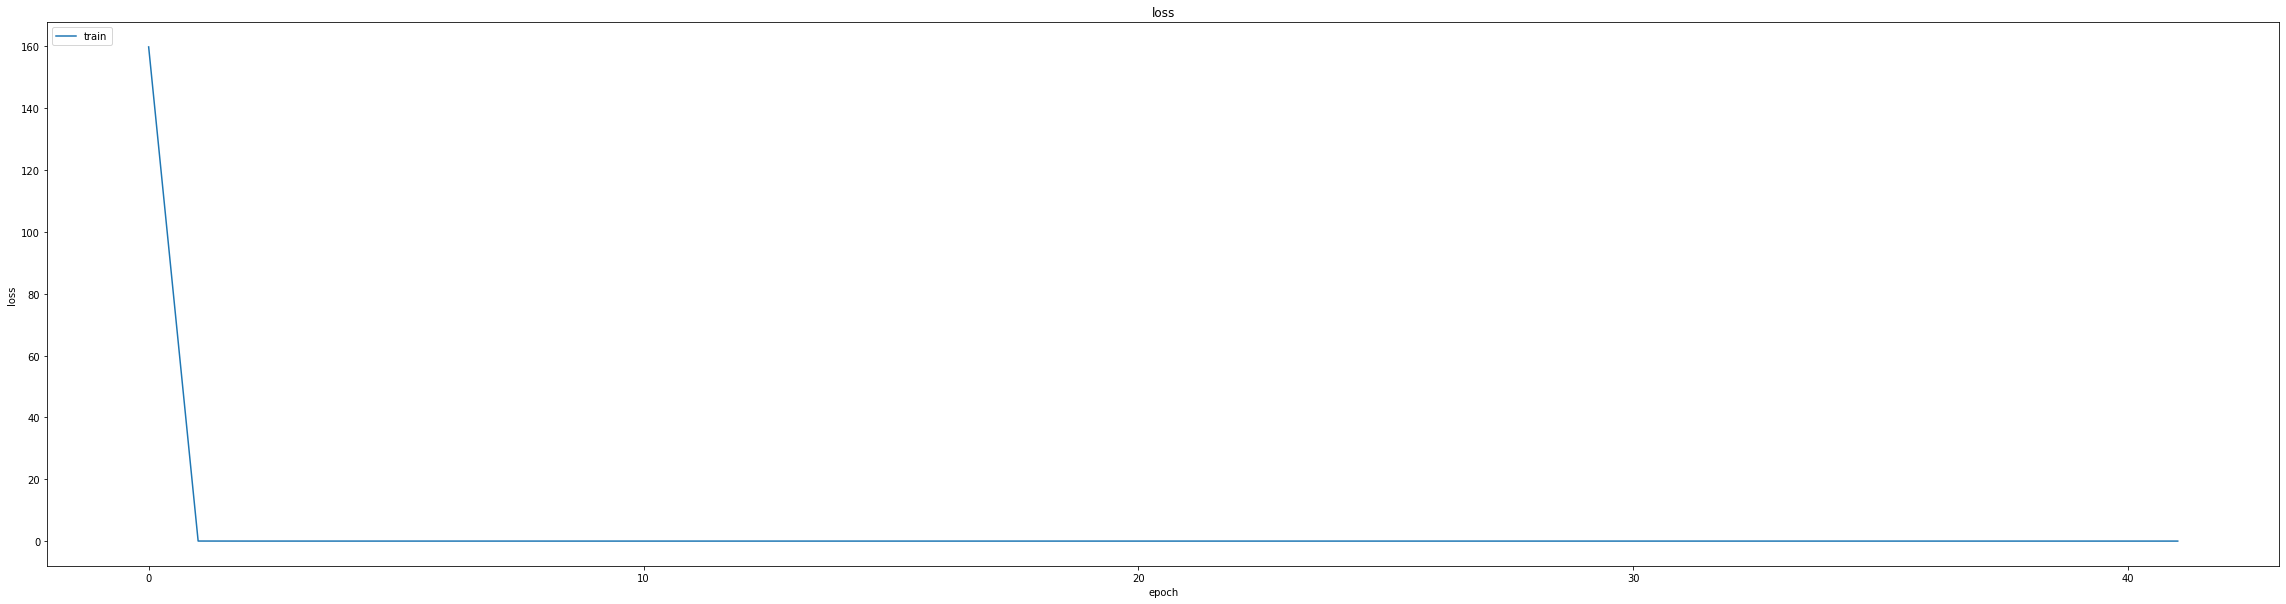

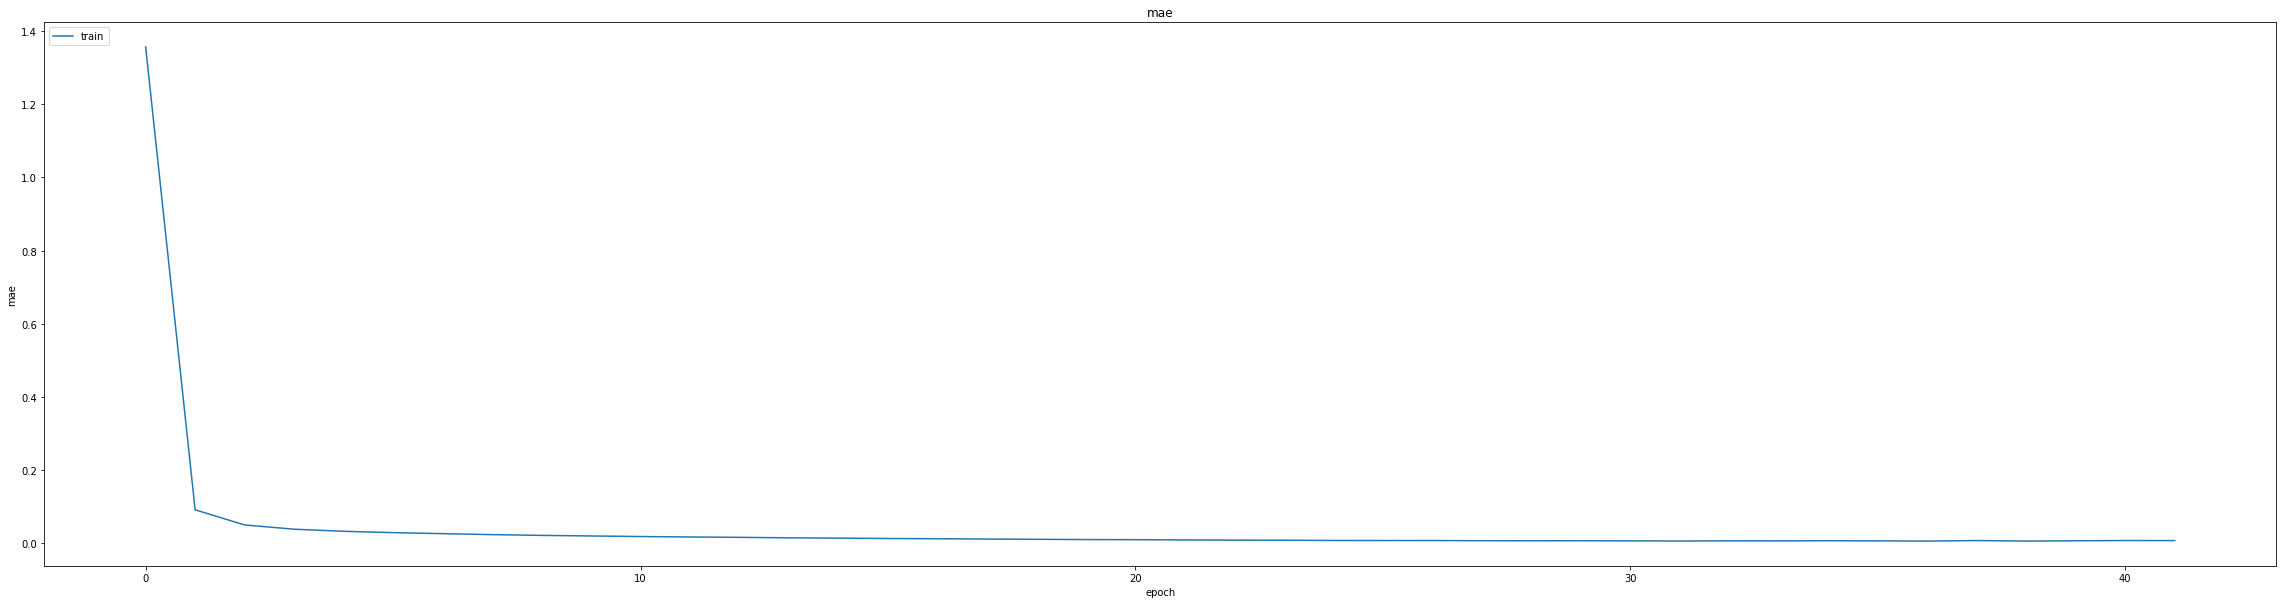

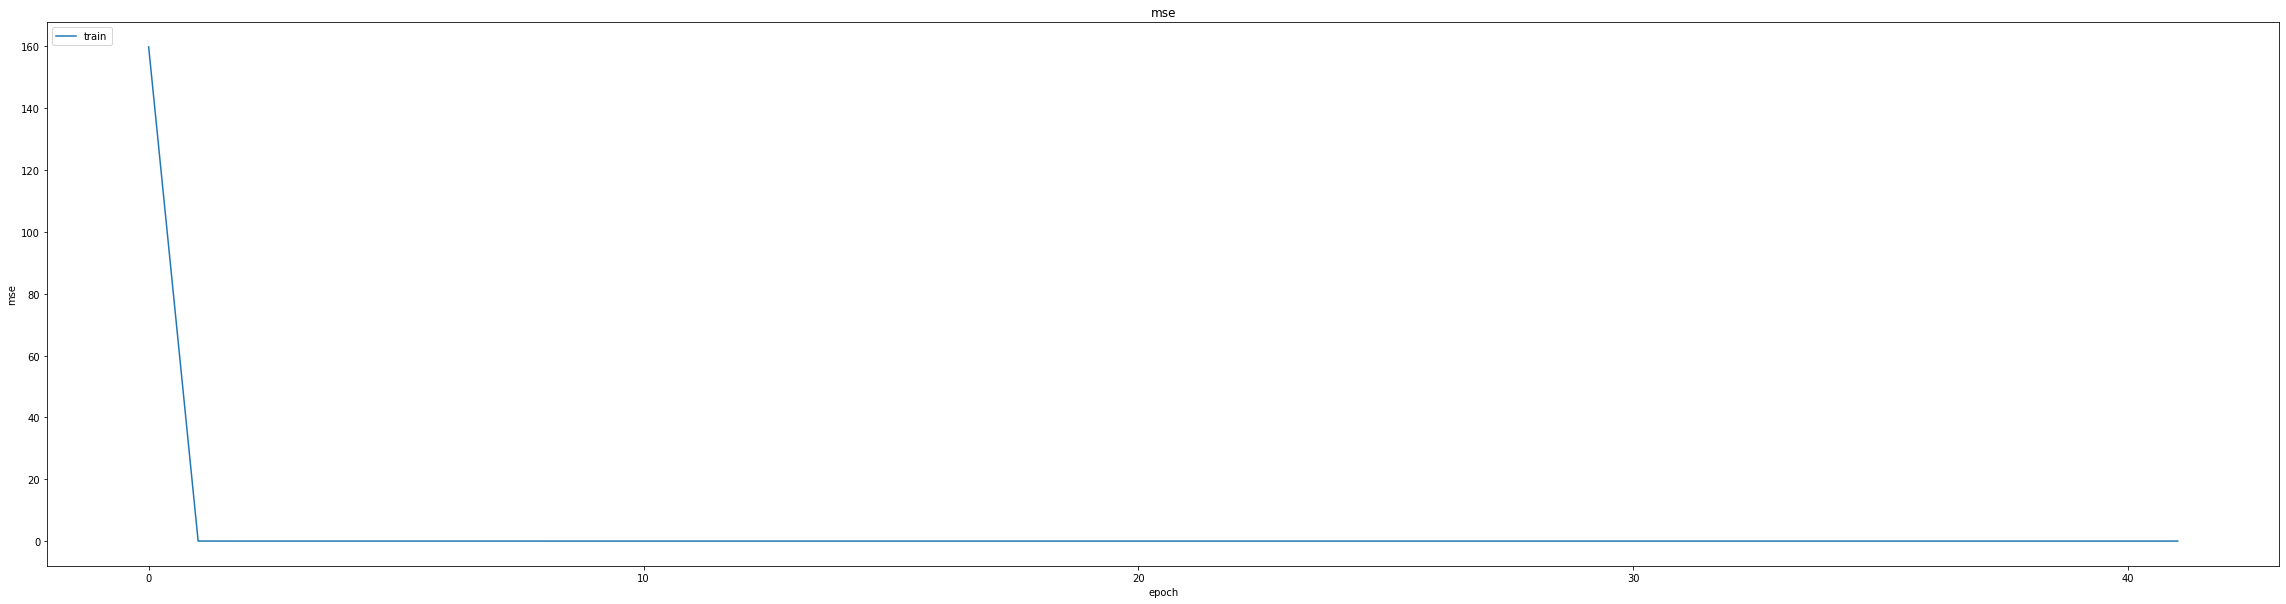

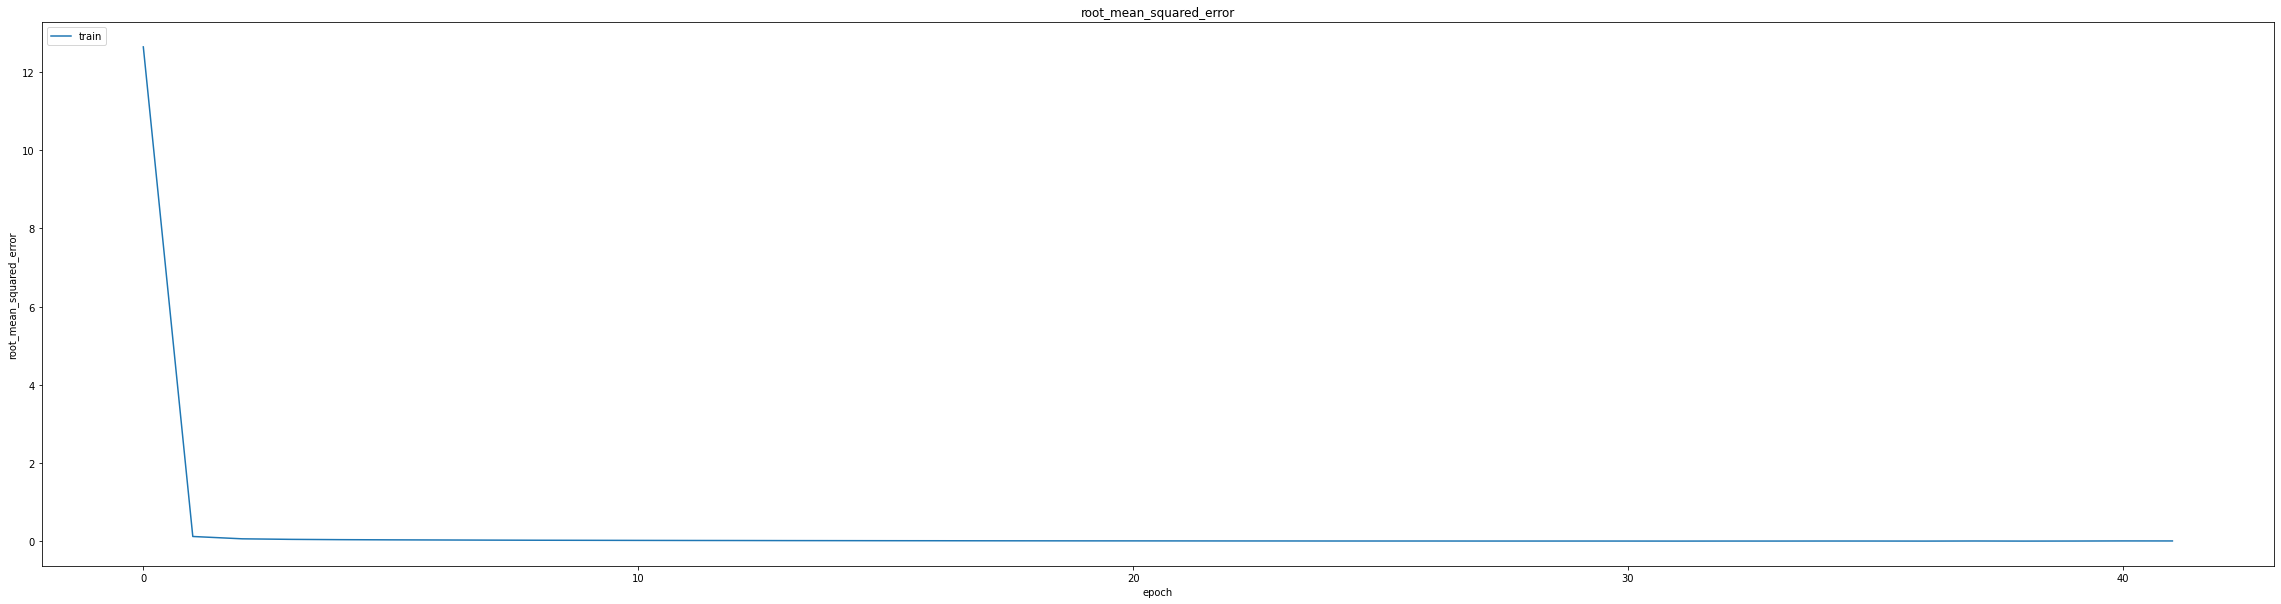

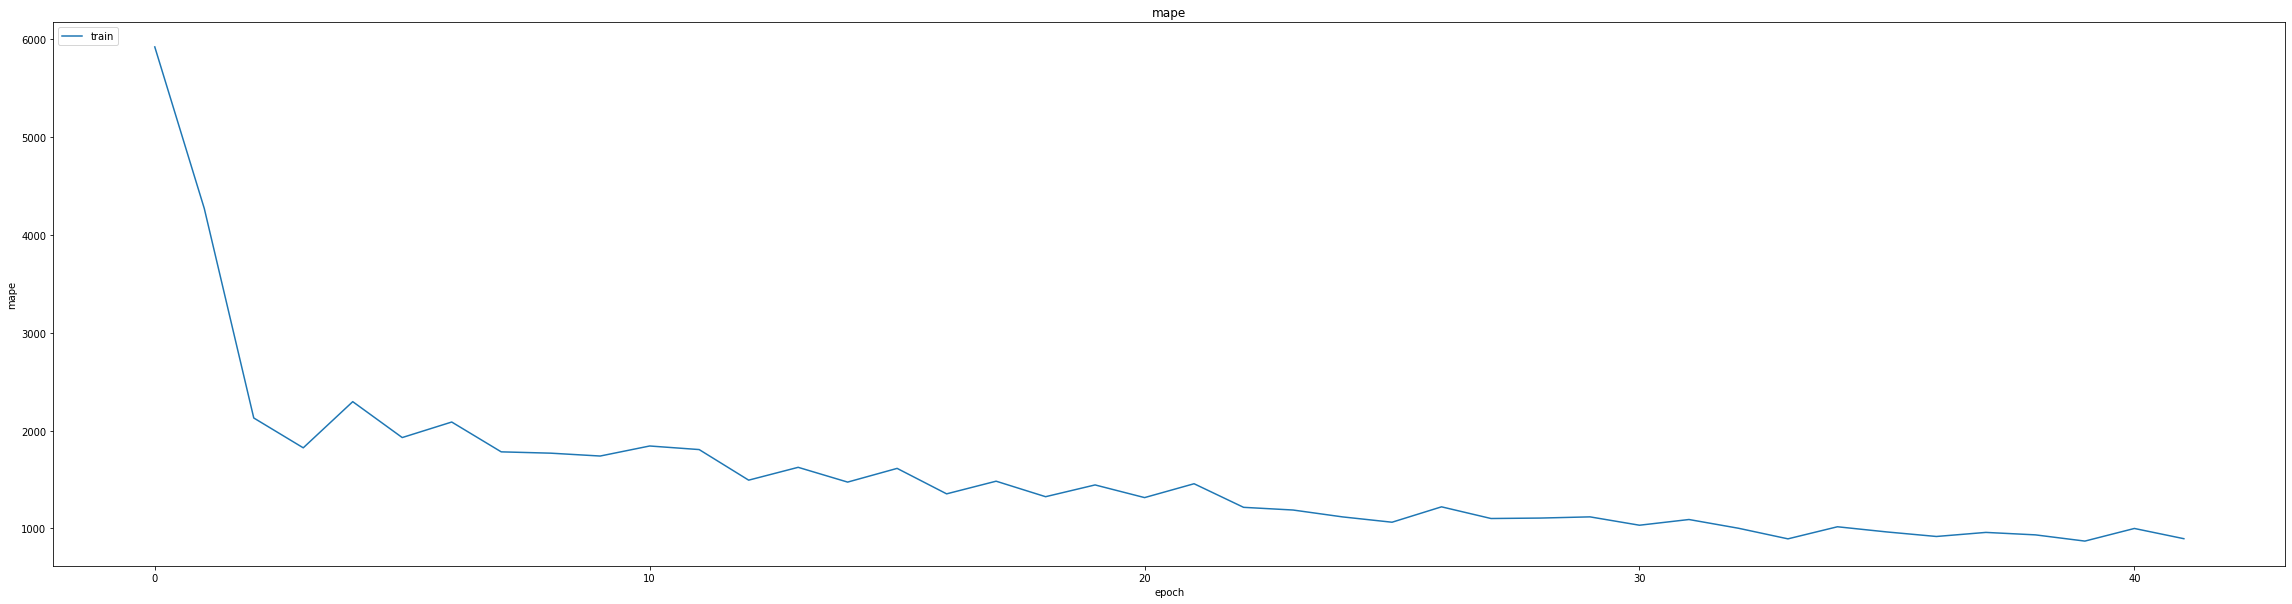

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.014236331917345524
0.019889801740646362
234/234 [==============================] - 11s 38ms/step
0.9338709383374233


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 0.0016 - mae: 0.0181 - mse: 0.0016 - root_mean_squared_error: 0.0400 - mape: 1497.8358
Epoch 1: val_mse did not improve from 0.00040
464/464 [==============================] - 149s 302ms/step - loss: 0.0016 - mae: 0.0181 - mse: 0.0016 - root_mean_squared_error: 0.0400 - mape: 1497.8358 - val_loss: 8.2413e-04 - val_mae: 0.0266 - val_mse: 8.2413e-04 - val_root_mean_squared_error: 0.0287 - val_mape: 10653.9619 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 1.0695e-04 - mae: 0.0075 - mse: 1.0695e-04 - root_mean_squared_error: 0.0103 - mape: 1049.4417
Epoch 2: val_mse did not improve from 0.00040
464/464 [==============================] - 142s 306ms/step - loss: 1.0695e-04 - mae: 0.0075 - mse: 1.0695e-04 - root_mean_squared_error: 0.0103 - mape: 1049.4417 - val_loss: 7.1568e-04 - val_mae: 0.0245 - val_mse: 7.1568e-04 - val_root_mean_squared_error: 0.0268 - val_mape: 10281.1807 - lr: 0.0

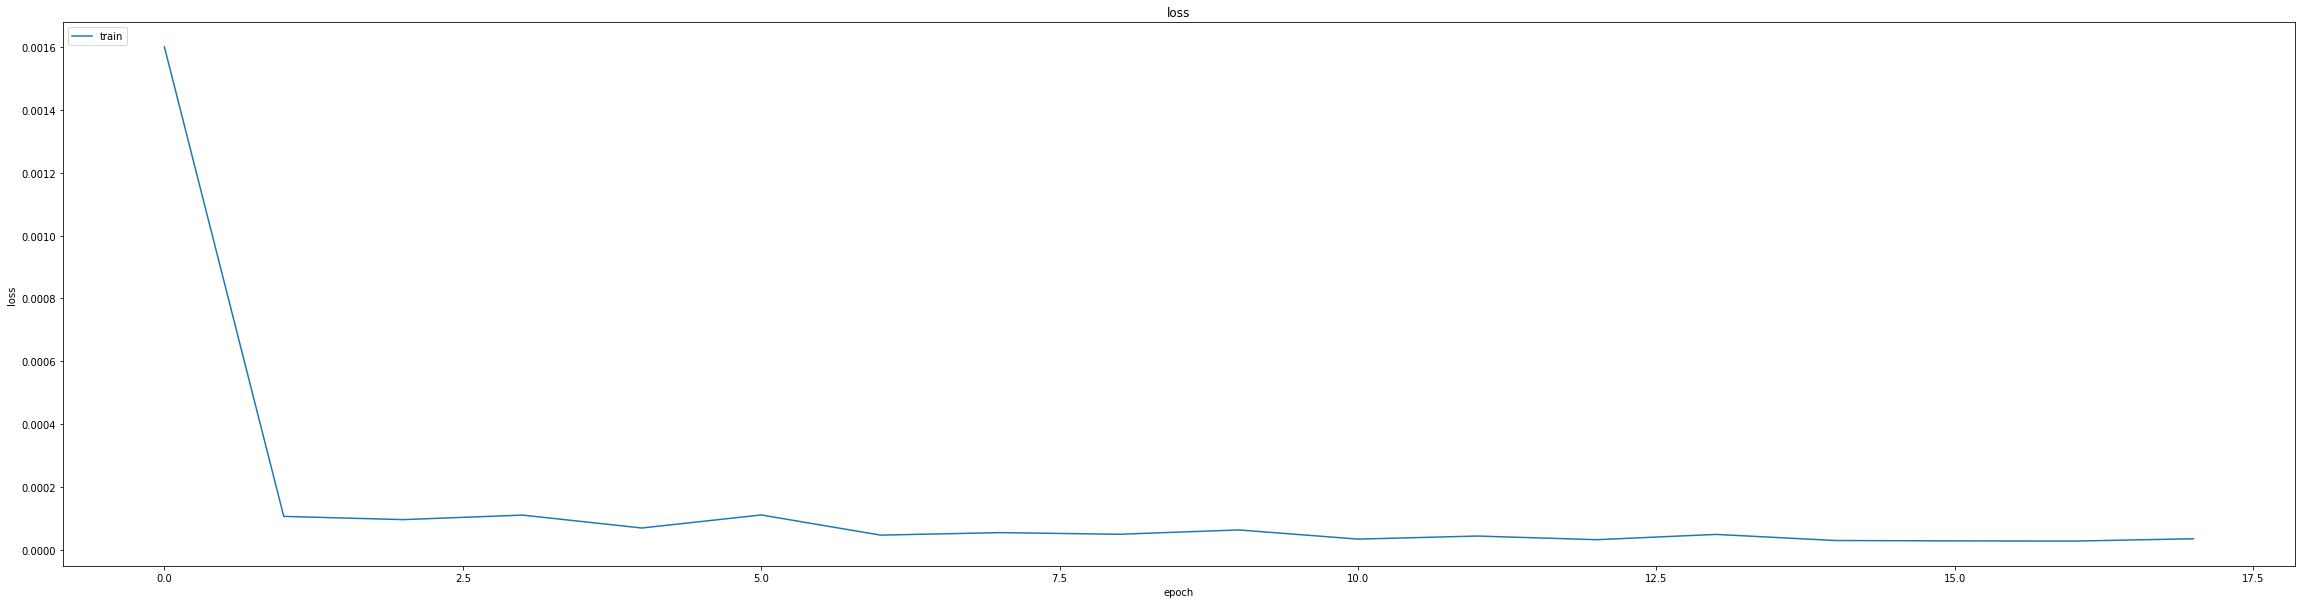

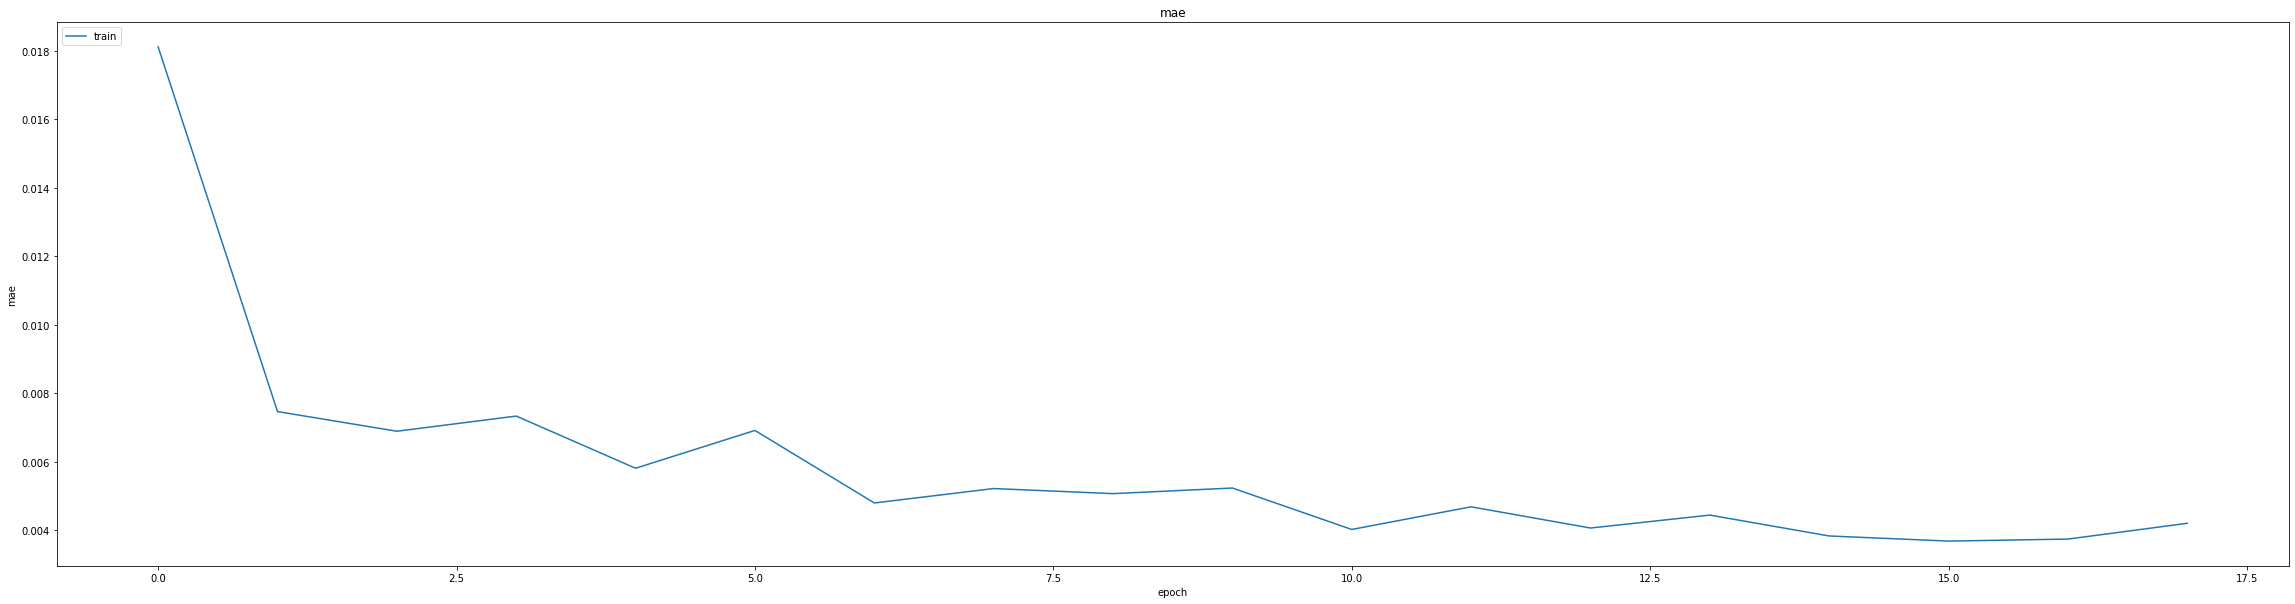

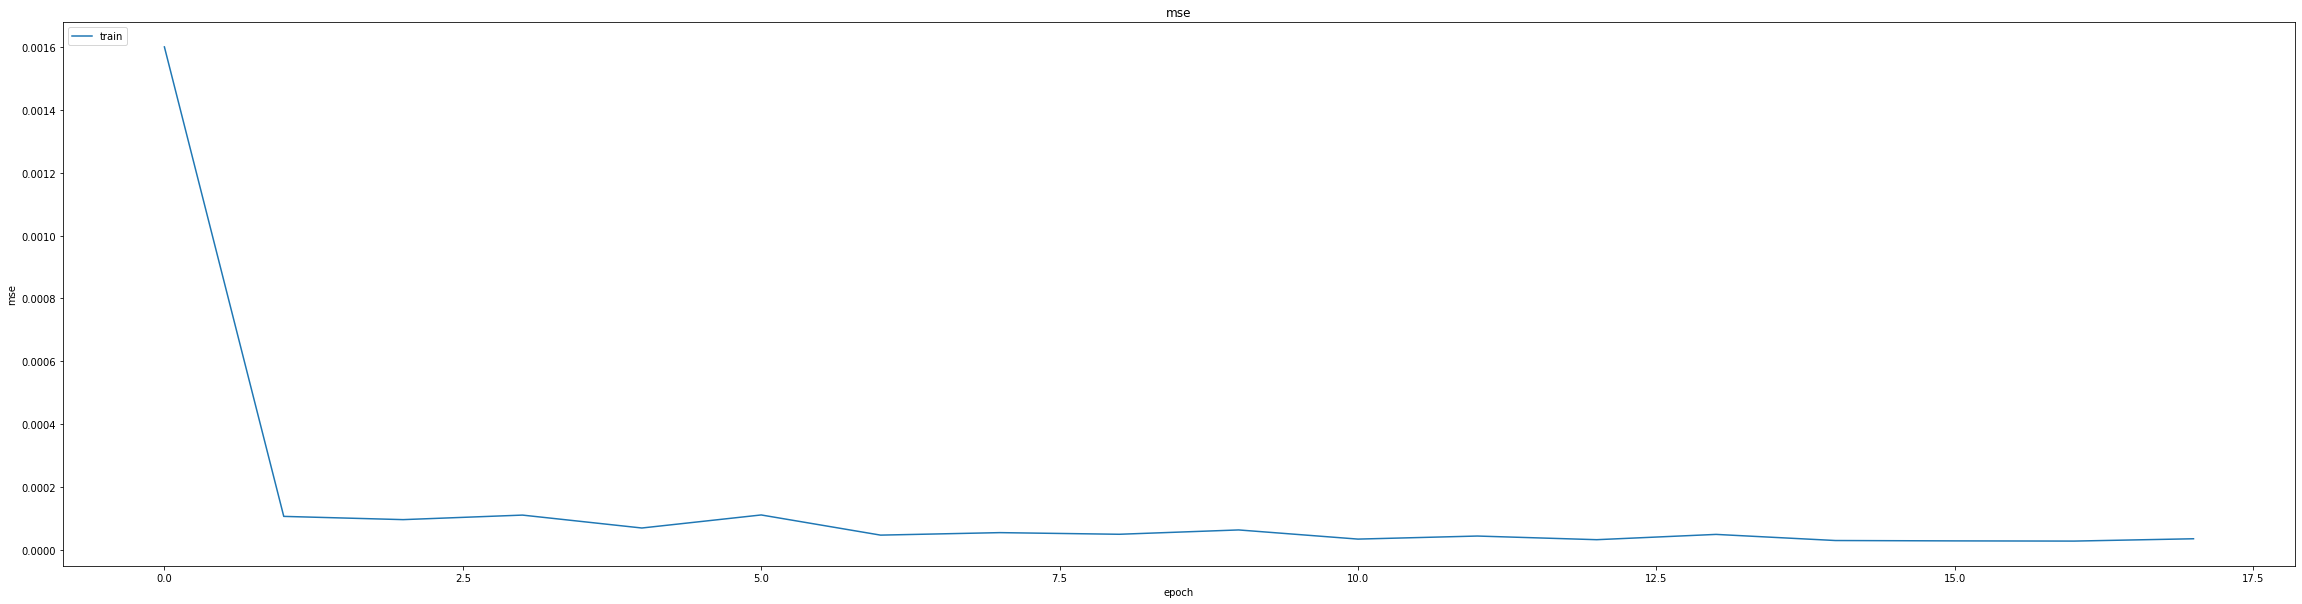

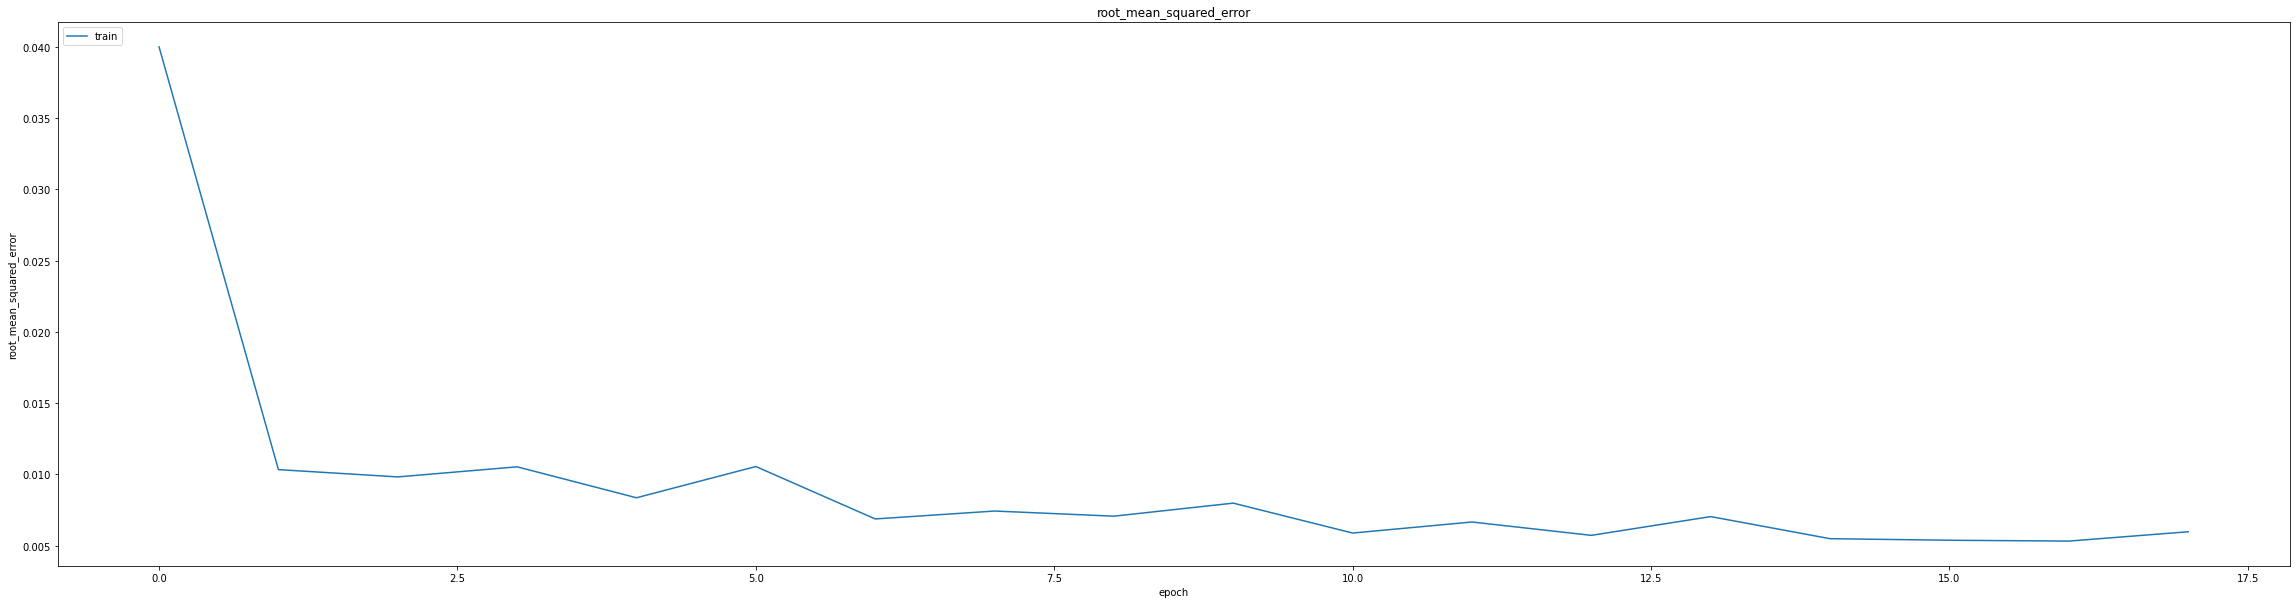

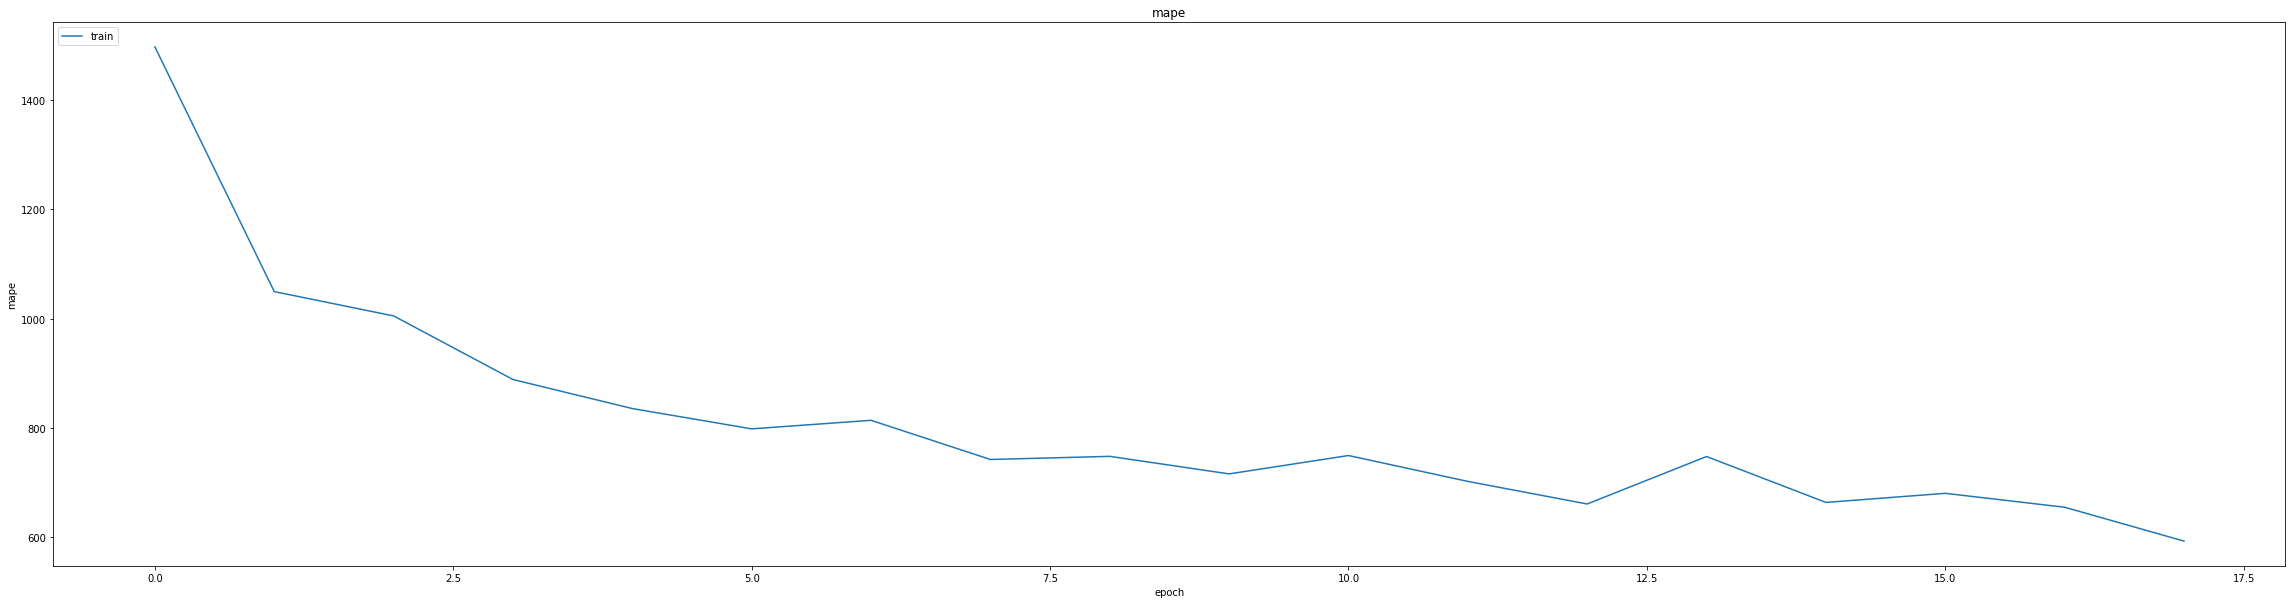

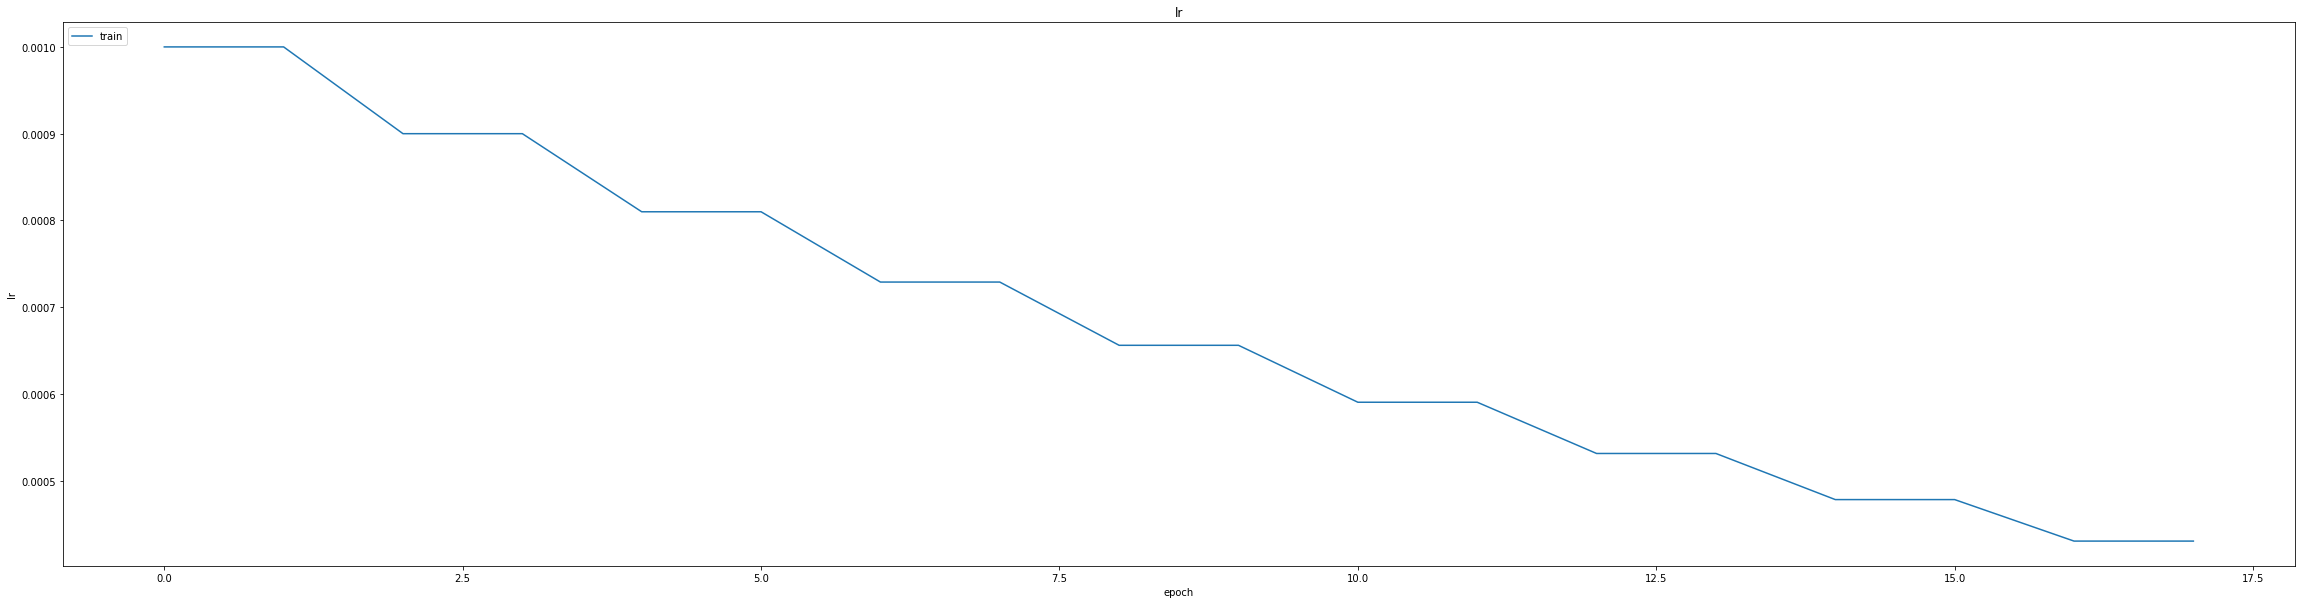

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.020917298272252083
0.0239949282258749
234/234 [==============================] - 11s 38ms/step
0.933737689031741


234/234 [==============================] - 9s 39ms/step


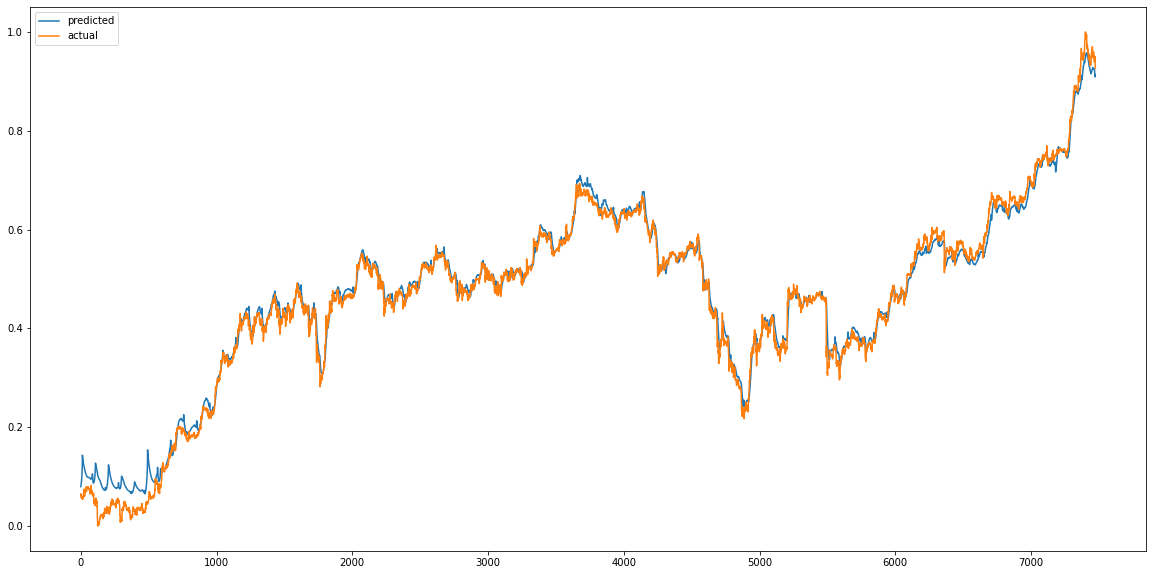

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


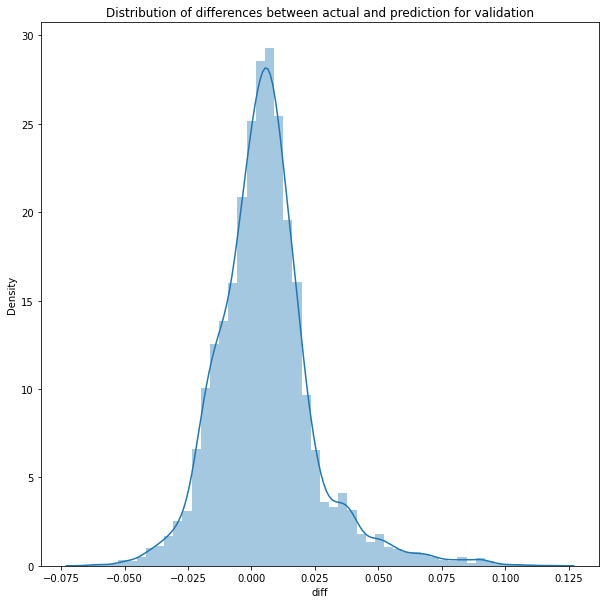

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 9s 38ms/step


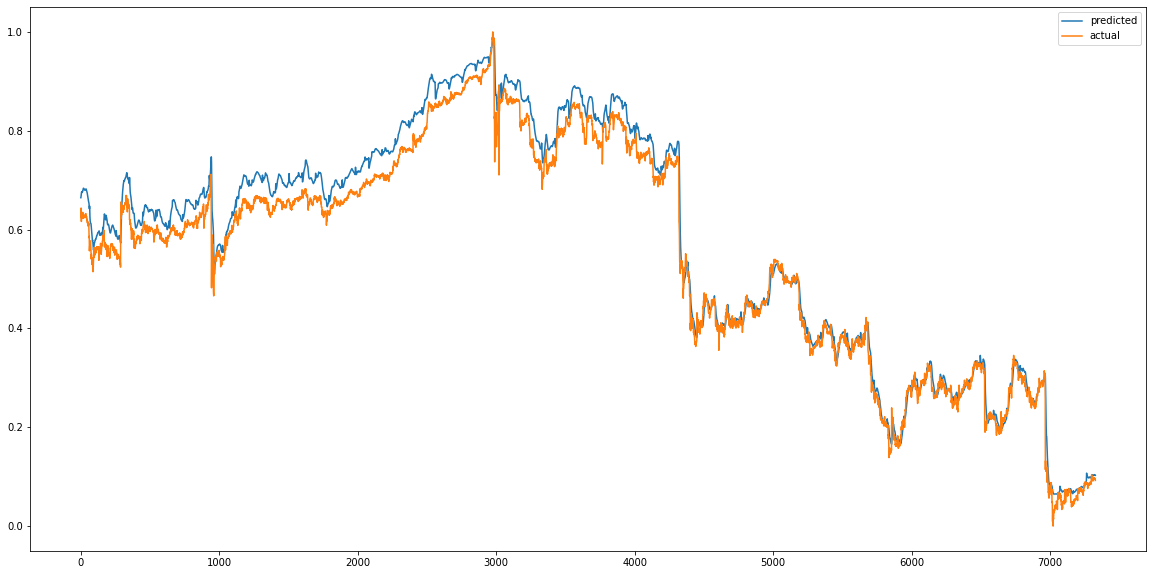

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


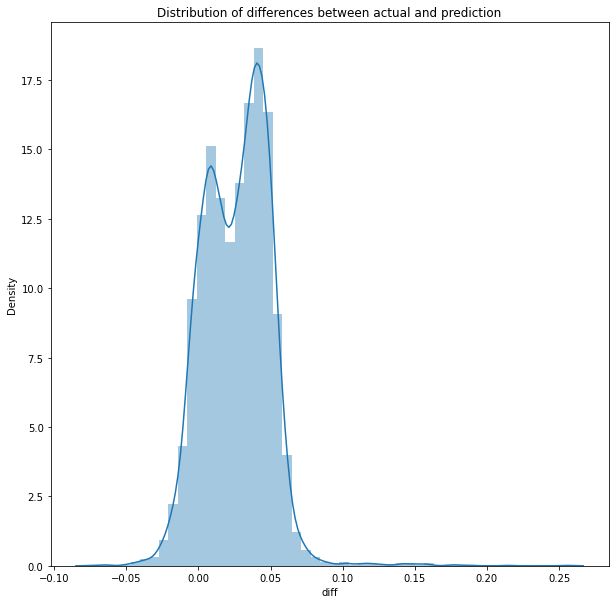

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.001216122335422329
MAE :  0.028548261177152656
RMSE  : 0.03487294560862803
229/229 [==============================] - 9s 39ms/step
R2_Score  : 0.9766739375434493


count    7328.000000
mean        0.026250
std         0.022959
min        -0.073354
25%         0.008429
50%         0.027987
75%         0.042898
max         0.255141
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 gru (GRU)                   (None, 24, 256)           247296    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                61824     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 249.7529 - mae: 1.9318 - mse: 249.7529 - root_mean_squared_error: 15.8036 - mape: 2099.1064
Epoch 1: val_mse improved from inf to 0.00191, saving model to weights.best.hdf5
464/464 [==============================] - 119s 236ms/step - loss: 249.7529 - mae: 1.9318 - mse: 249.7529 - root_mean_squared_error: 15.8036 - mape: 2099.1064 - val_loss: 0.0019 - val_mae: 0.0365 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0437 - val_mape: 17482.4609
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0242 - mse: 0.0010 - root_mean_squared_error: 0.0320 - mape: 1847.4292
Epoch 2: val_mse improved from 0.00191 to 0.00063, saving model to weights.best.hdf5
464/464 [==============================] - 111s 239ms/step - loss: 0.0010 - mae: 0.0242 - mse: 0.0010 - root_mean_squared_error: 0.0320 - mape: 1847.4292 - val_loss: 6.2647e-04 - val_mae: 0.0199 - val_mse: 6.2647e-04 - val_root_mean_squared

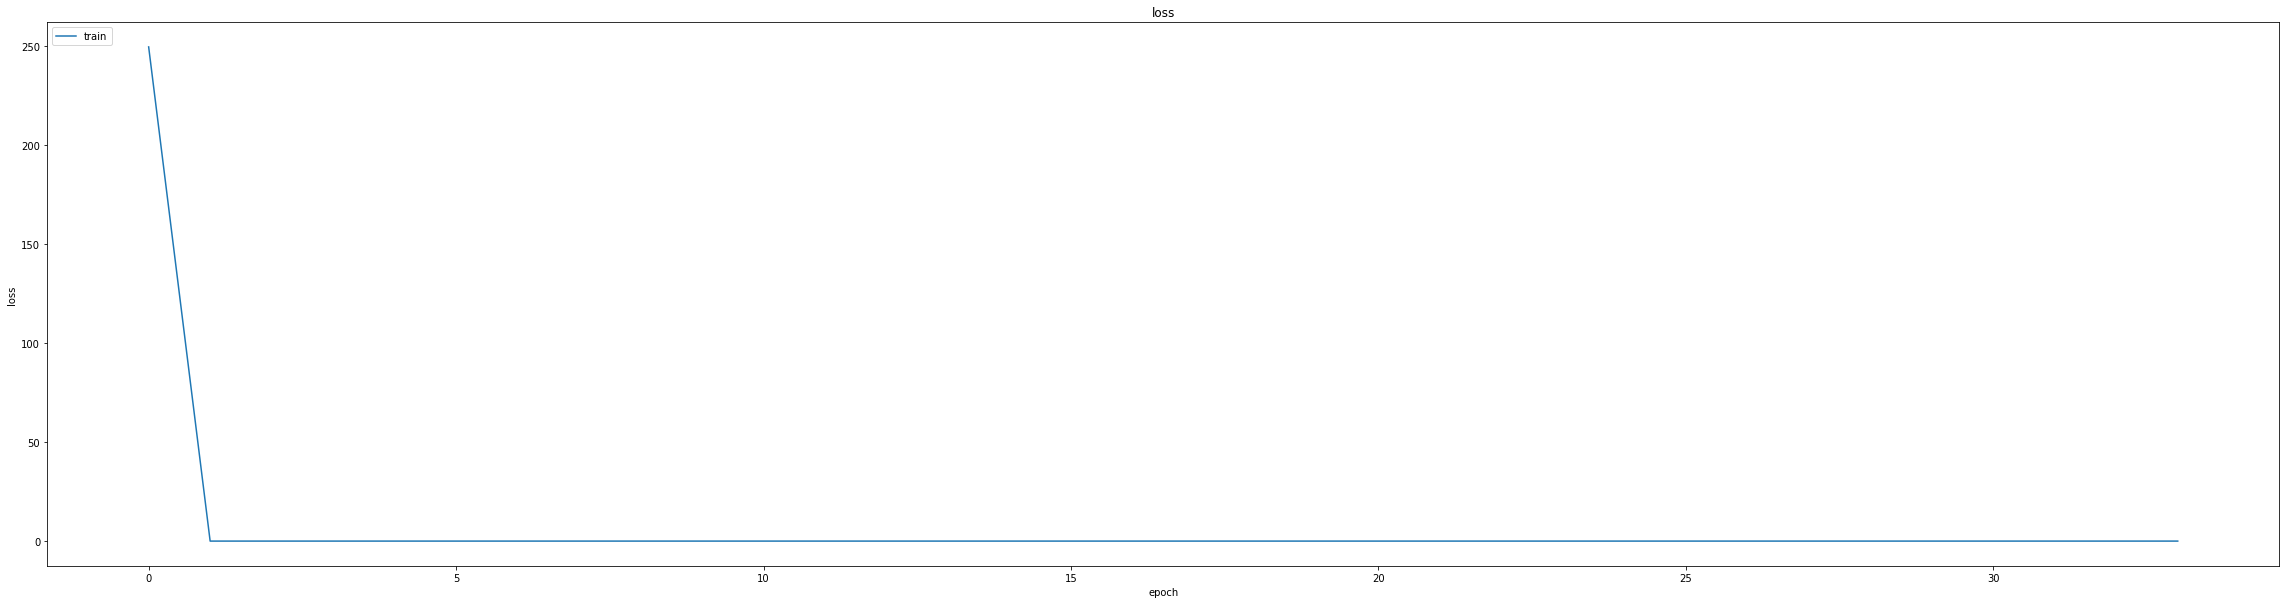

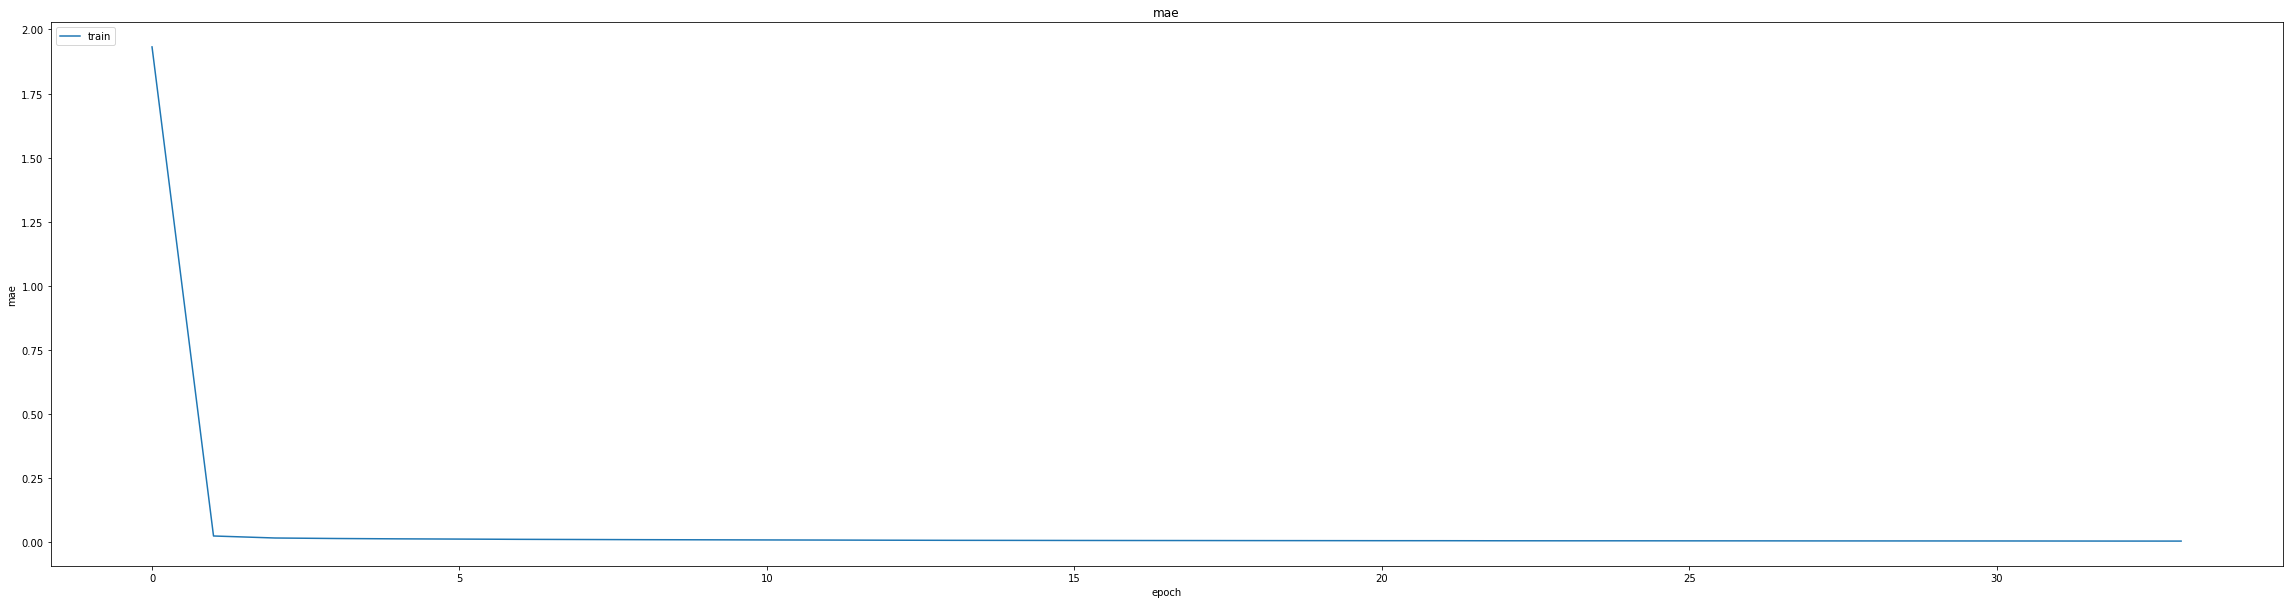

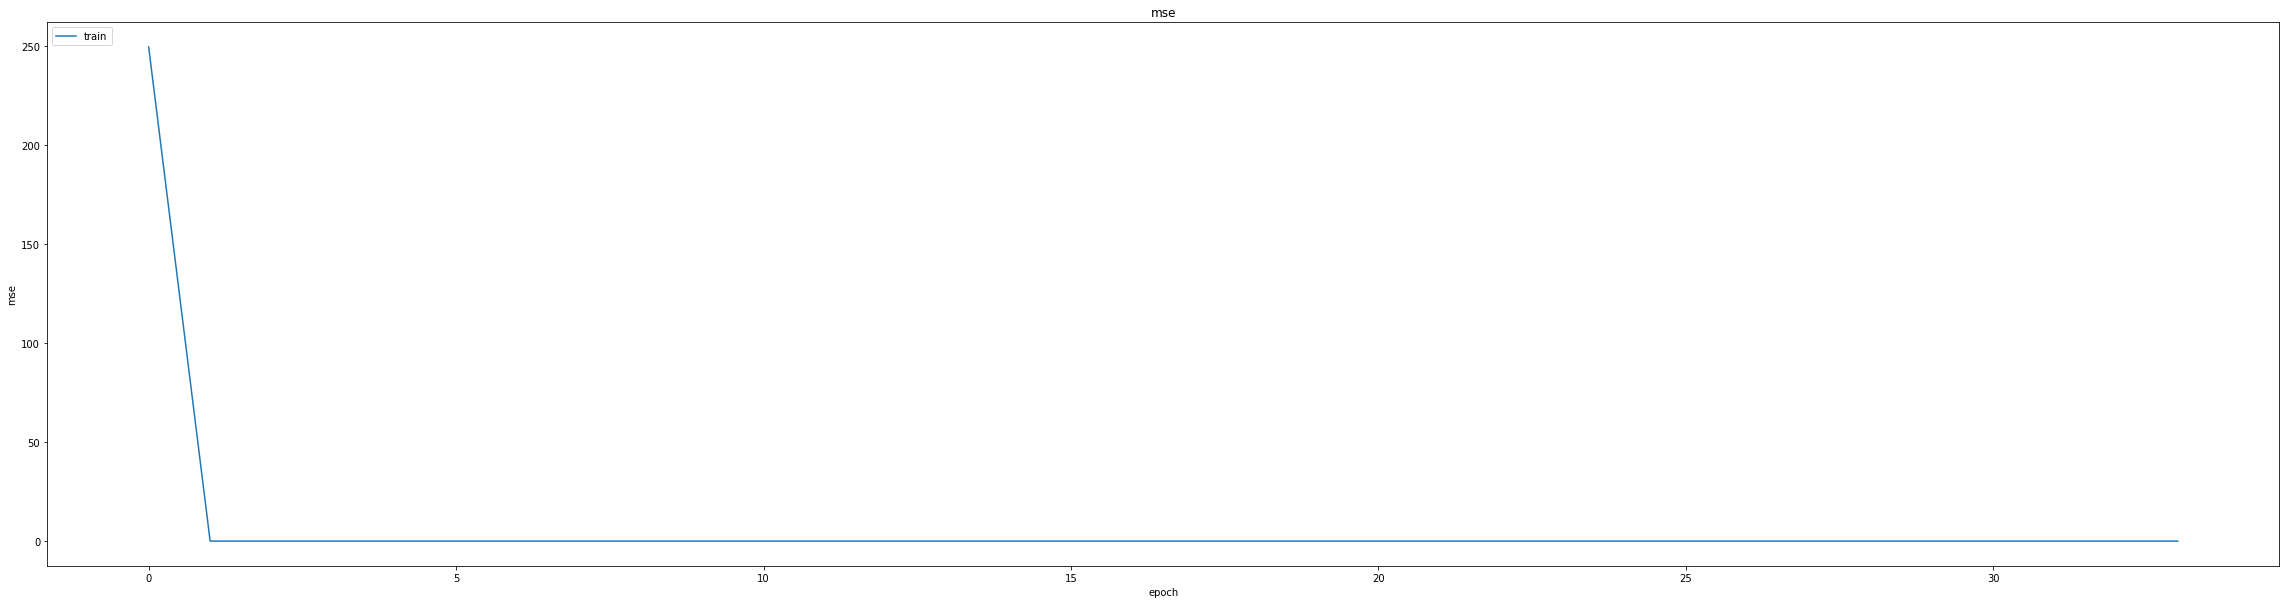

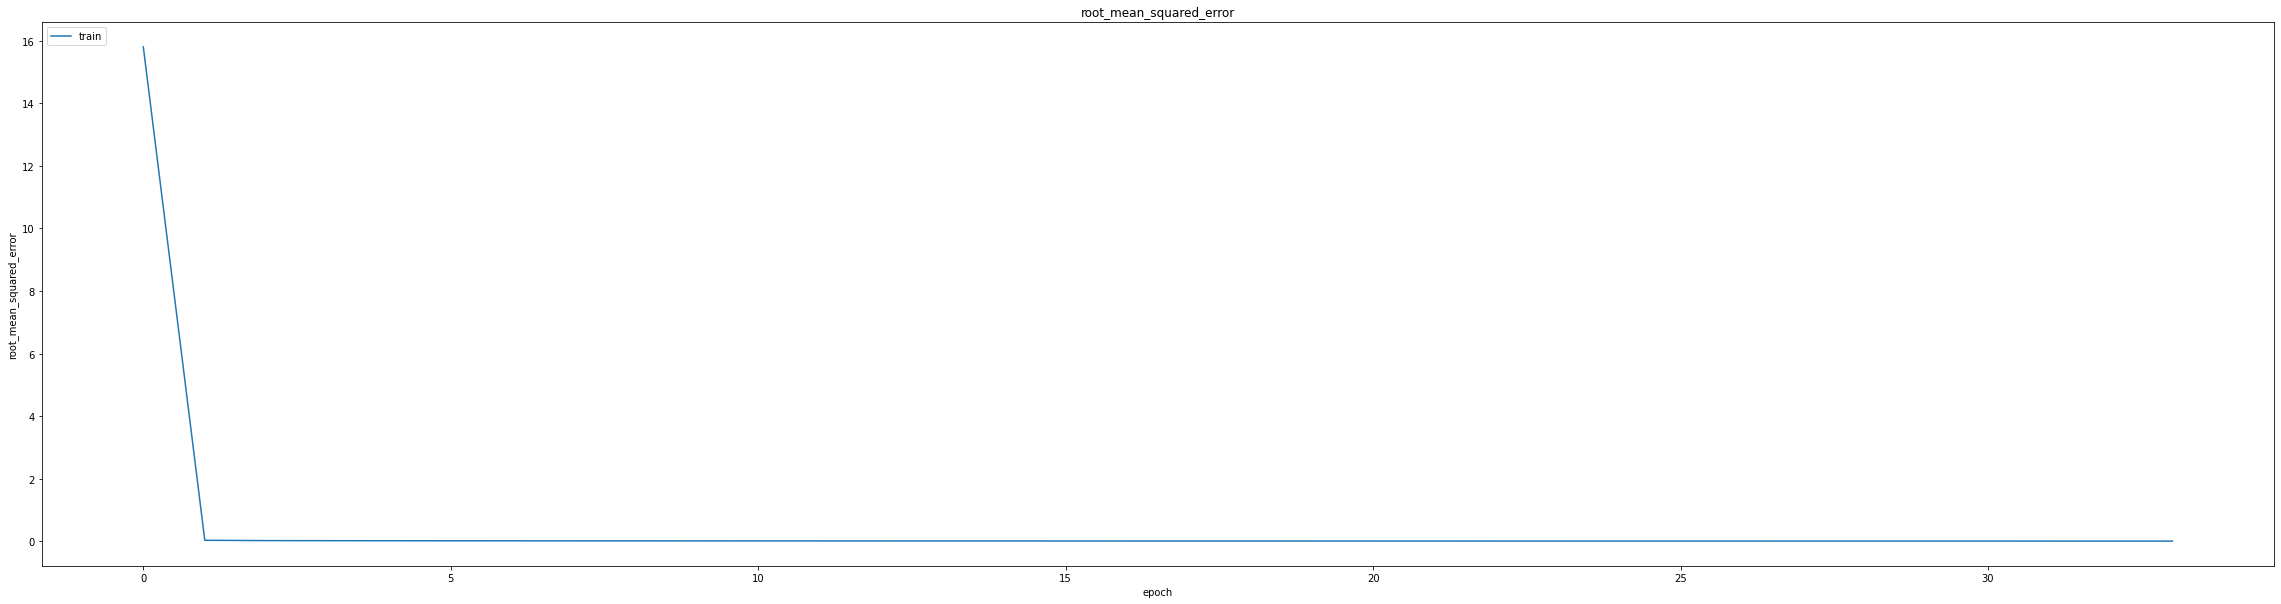

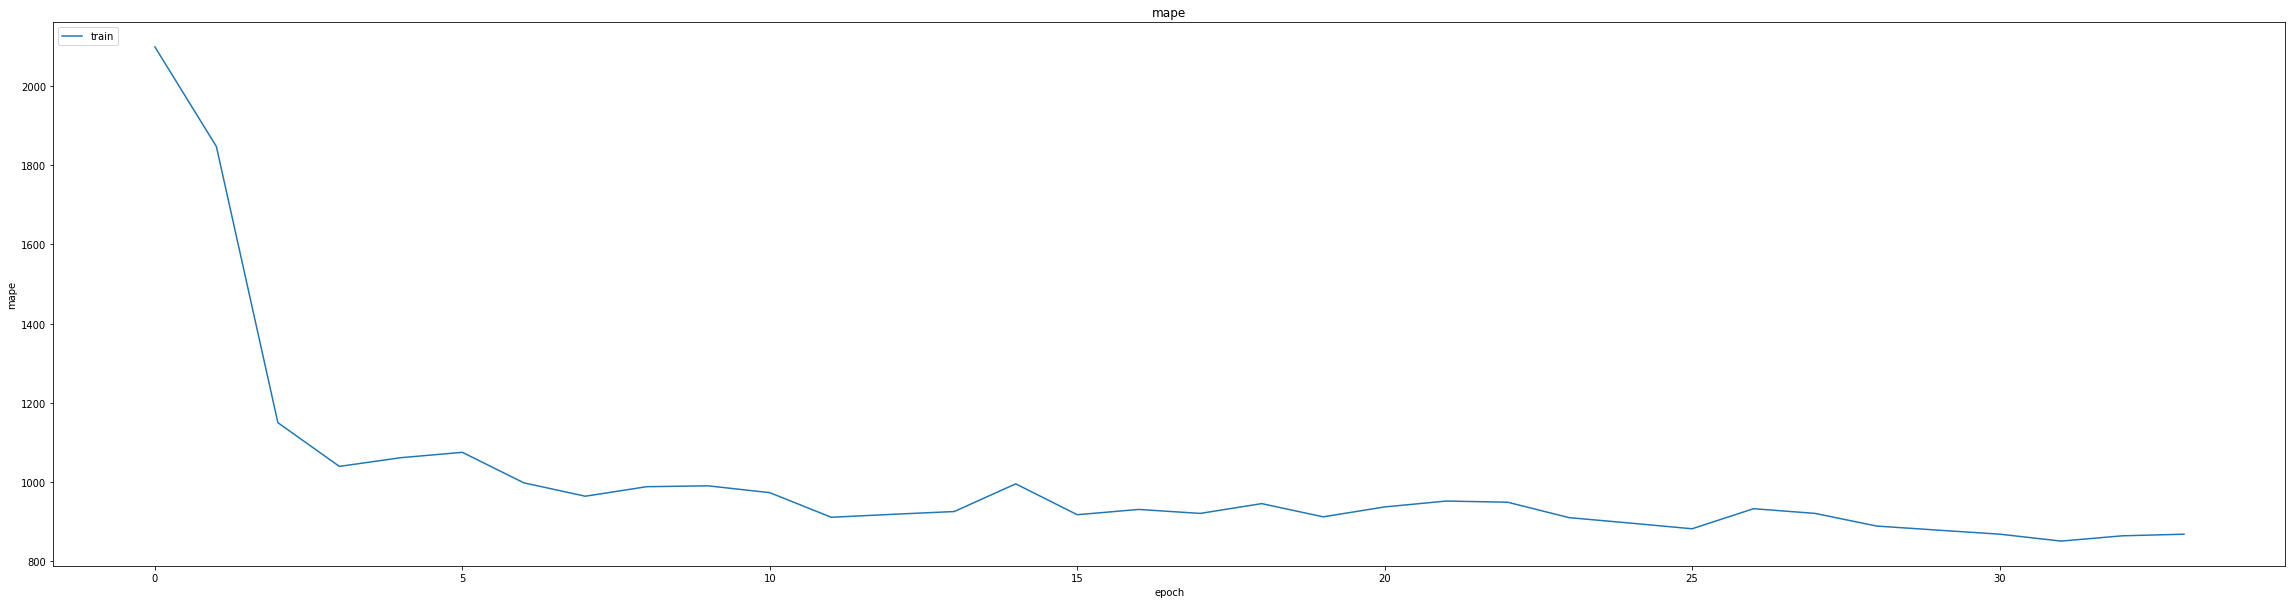

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.017198143526911736
0.022116398438811302
234/234 [==============================] - 9s 34ms/step
0.9460295083898433


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=12)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0160 - mse: 0.0017 - root_mean_squared_error: 0.0411 - mape: 1204.8912
Epoch 1: val_mse improved from 0.00049 to 0.00044, saving model to weights.best.hdf5
464/464 [==============================] - 136s 282ms/step - loss: 0.0017 - mae: 0.0160 - mse: 0.0017 - root_mean_squared_error: 0.0411 - mape: 1204.8912 - val_loss: 4.3717e-04 - val_mae: 0.0153 - val_mse: 4.3717e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 10731.7461 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 1.0365e-04 - mae: 0.0073 - mse: 1.0365e-04 - root_mean_squared_error: 0.0102 - mape: 1027.9789
Epoch 2: val_mse improved from 0.00044 to 0.00040, saving model to weights.best.hdf5
464/464 [==============================] - 117s 253ms/step - loss: 1.0365e-04 - mae: 0.0073 - mse: 1.0365e-04 - root_mean_squared_error: 0.0102 - mape: 1027.9789 - val_loss: 3.9646e-04 - val_mae: 0.0148 - val_mse: 3.9

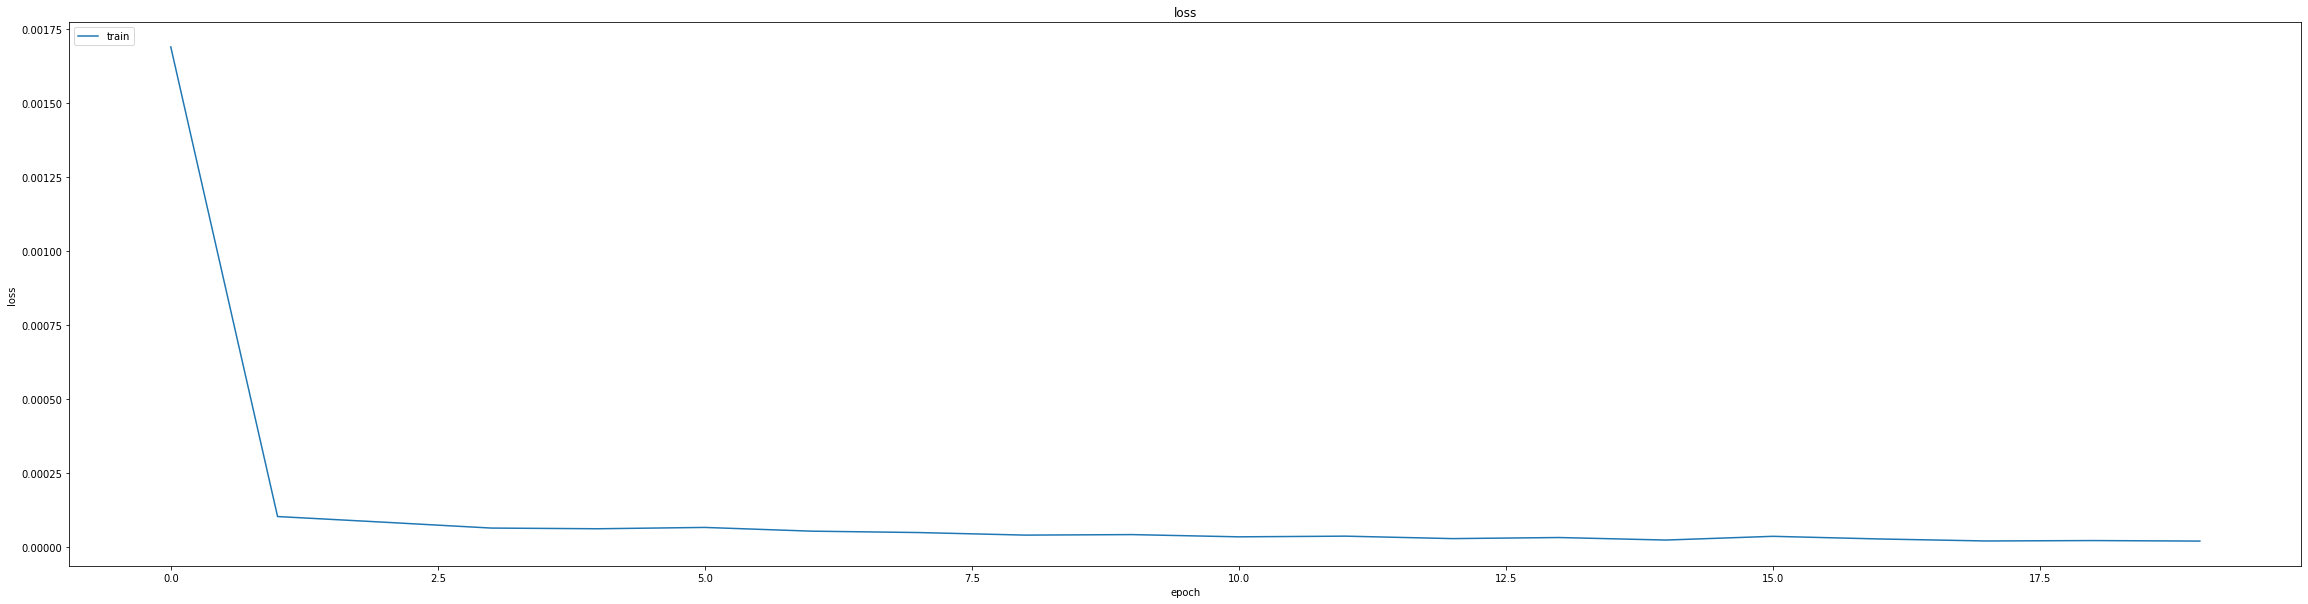

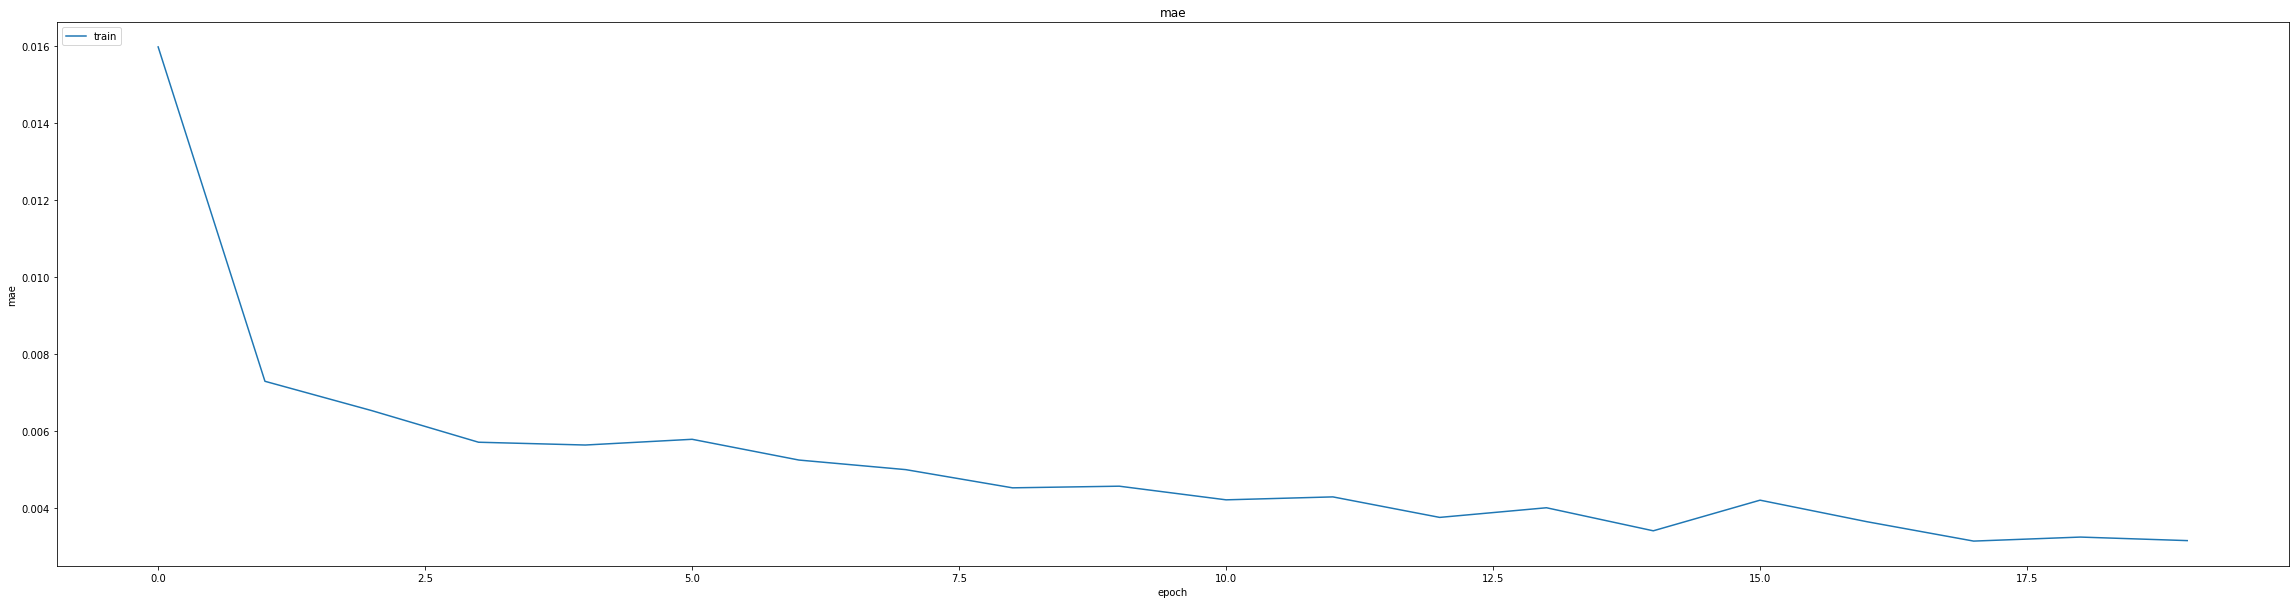

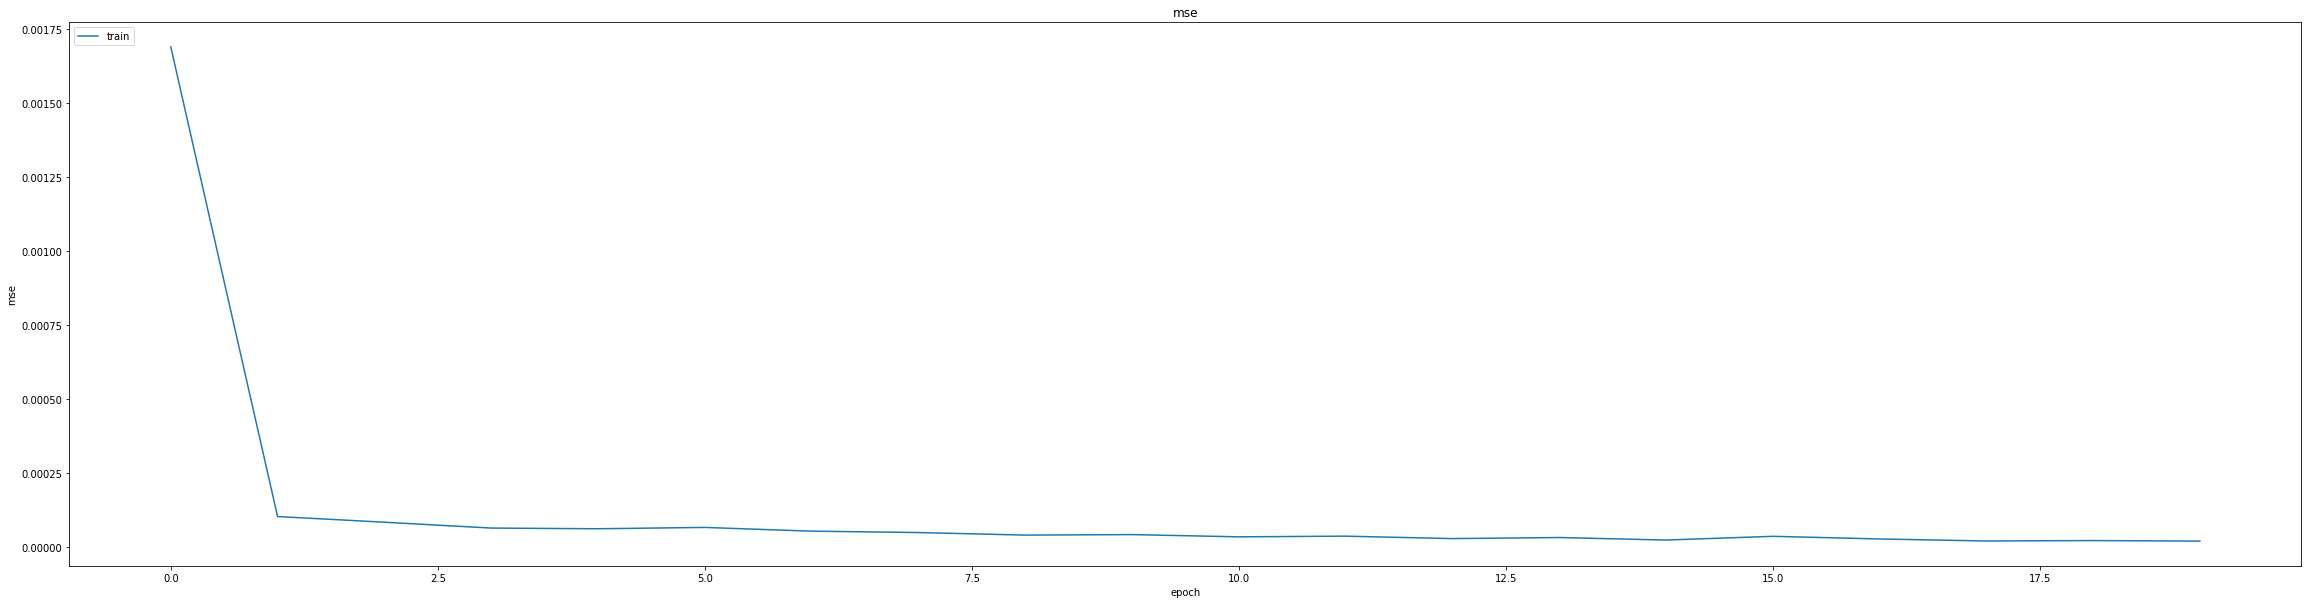

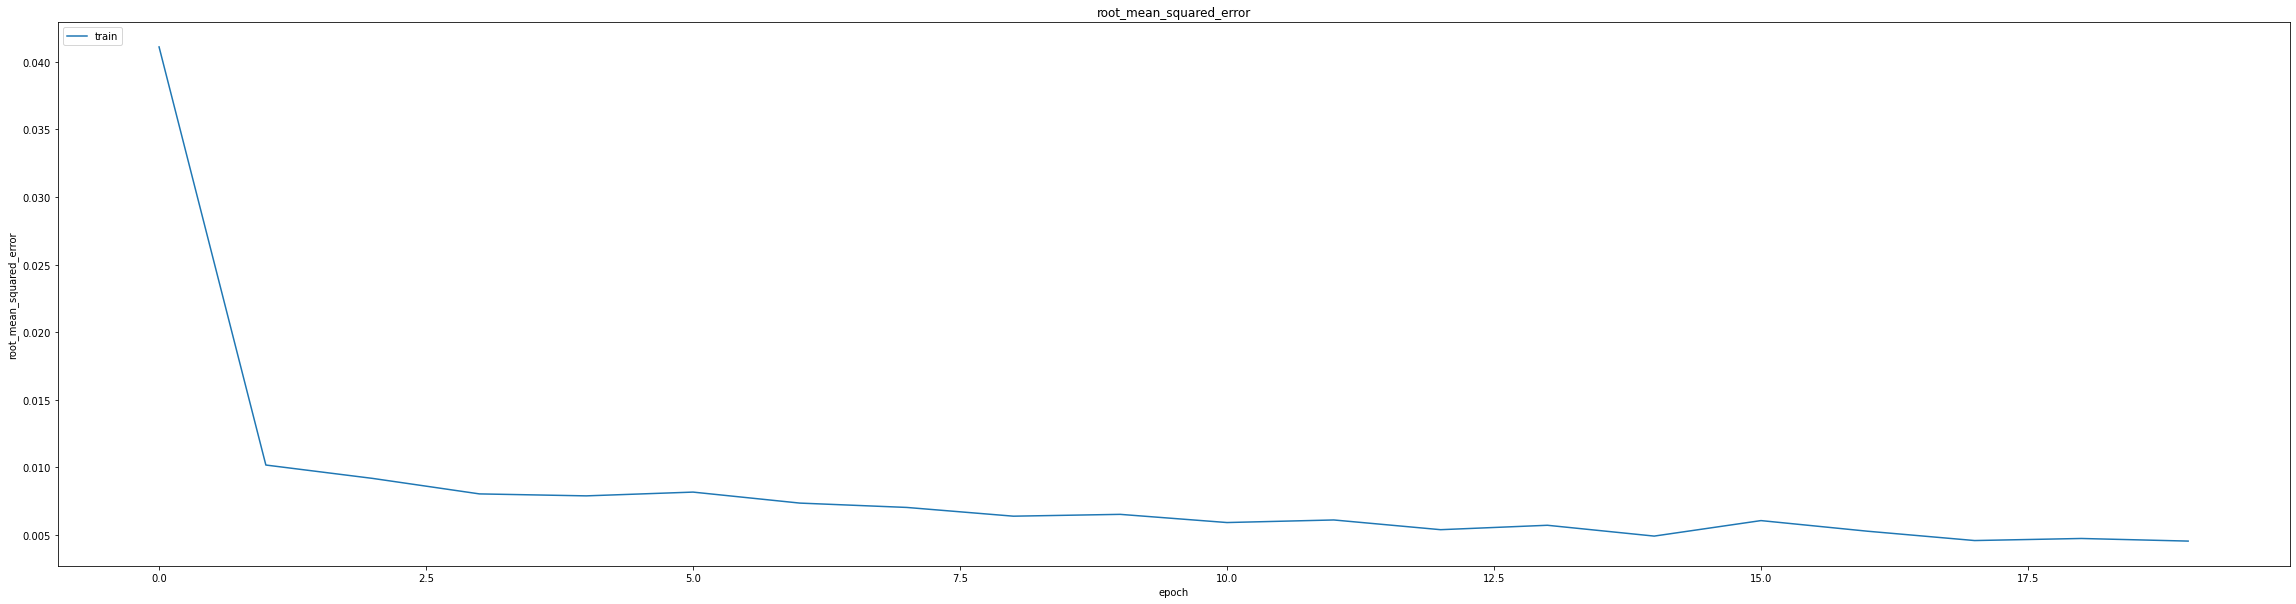

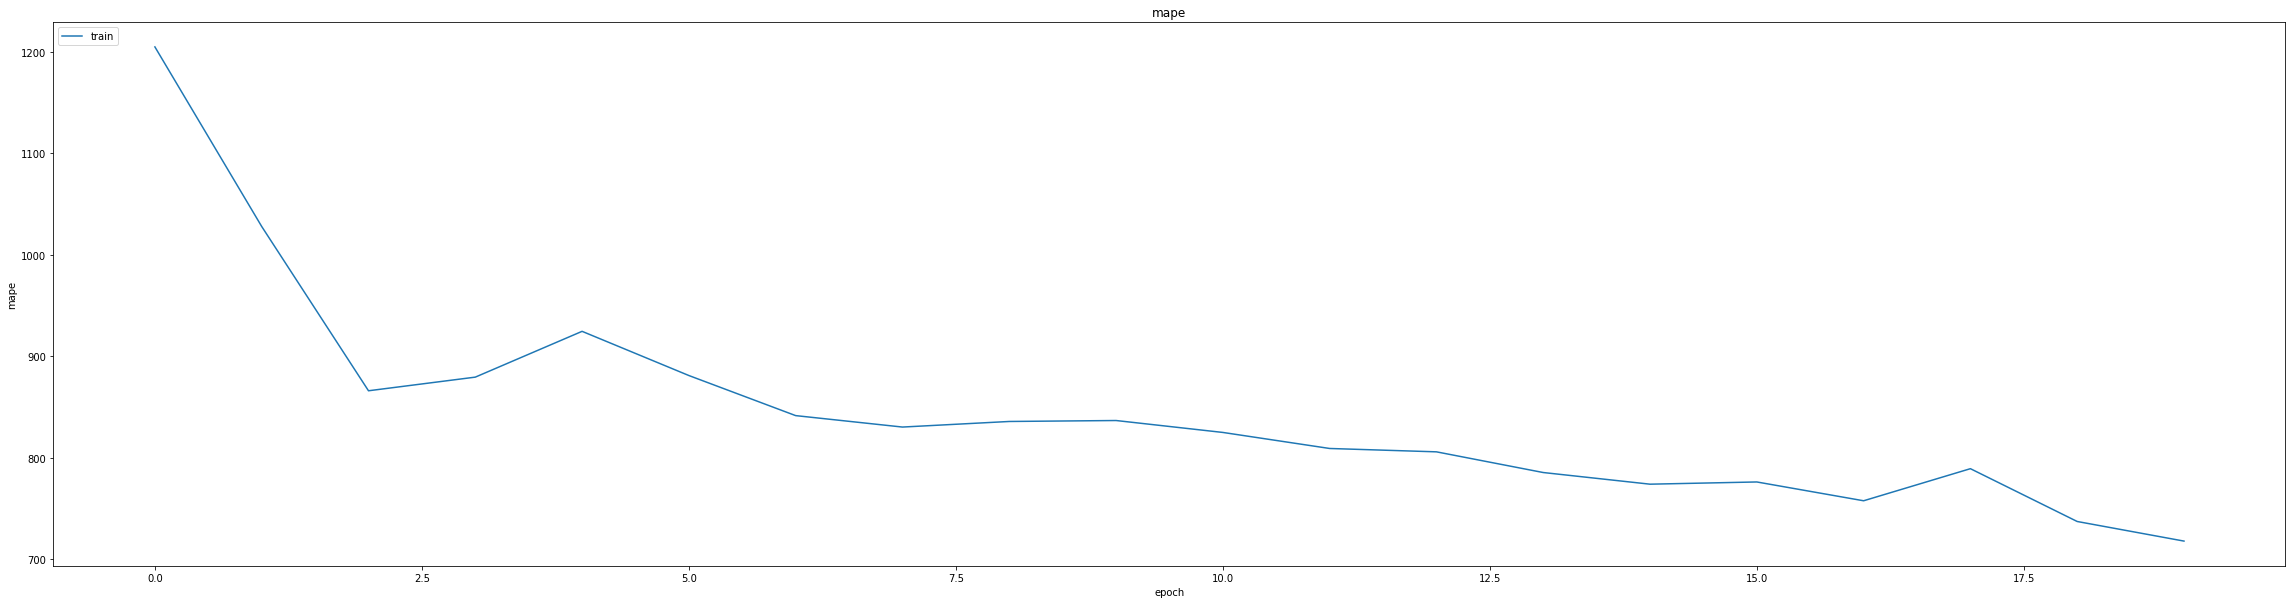

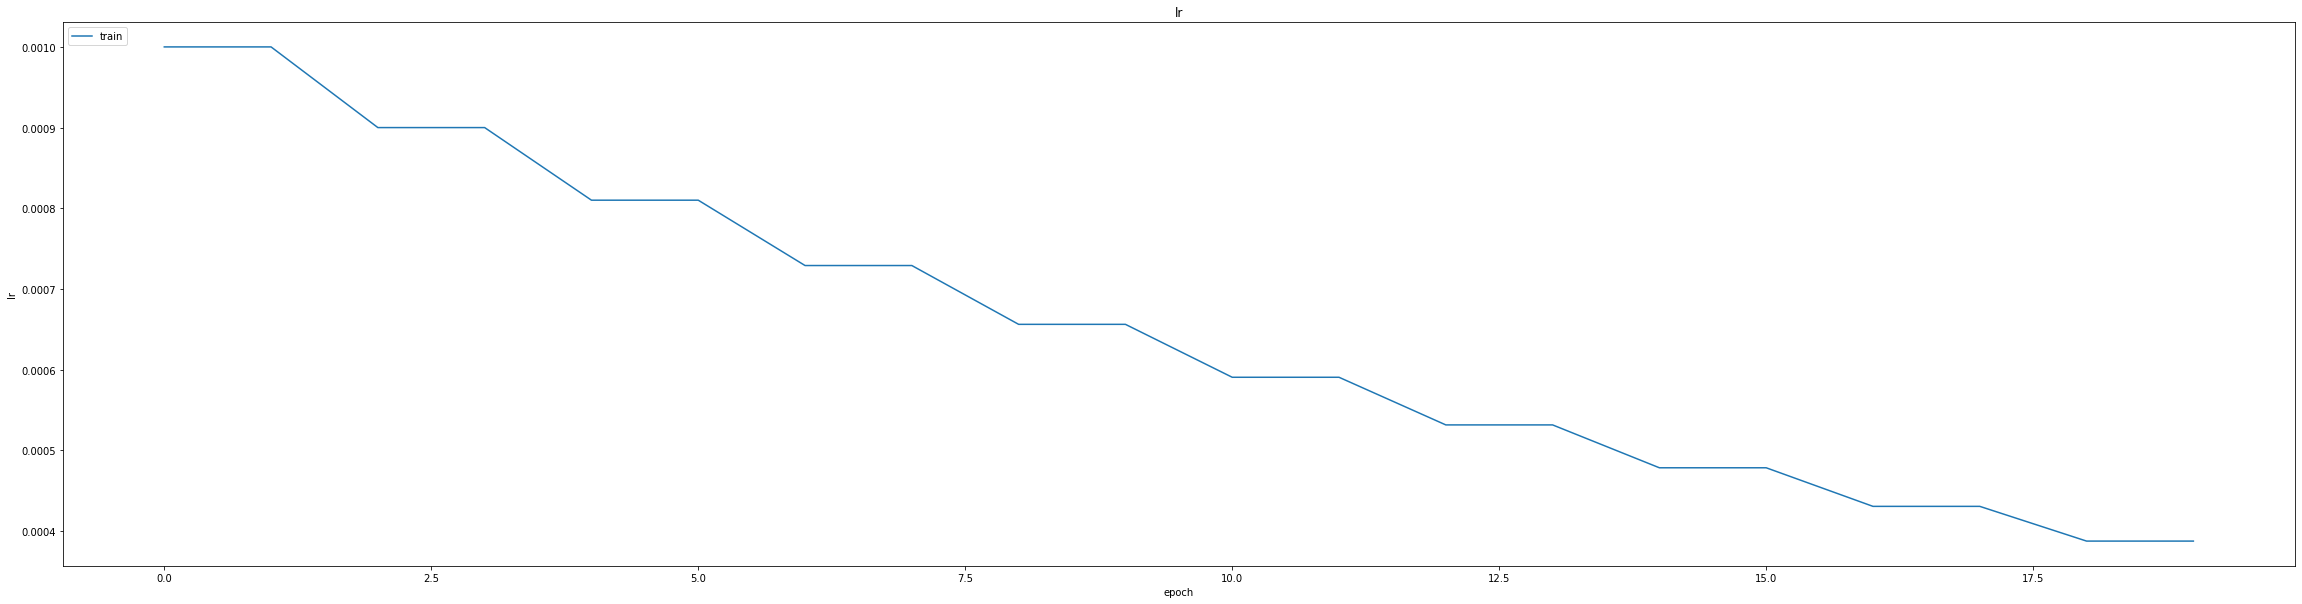

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.013173107989132404
0.01794278435409069
234/234 [==============================] - 8s 30ms/step
0.9817706023772246


234/234 [==============================] - 7s 30ms/step


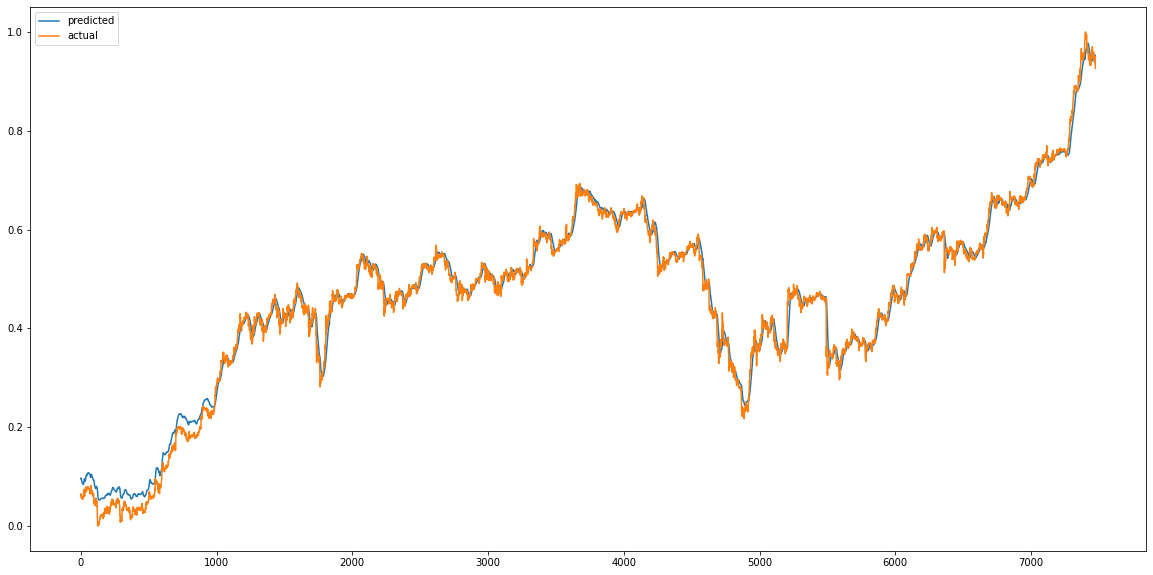

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


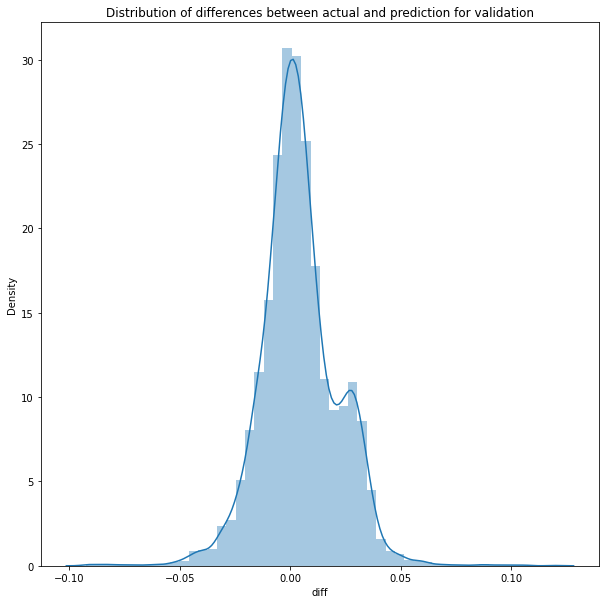

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 7s 31ms/step


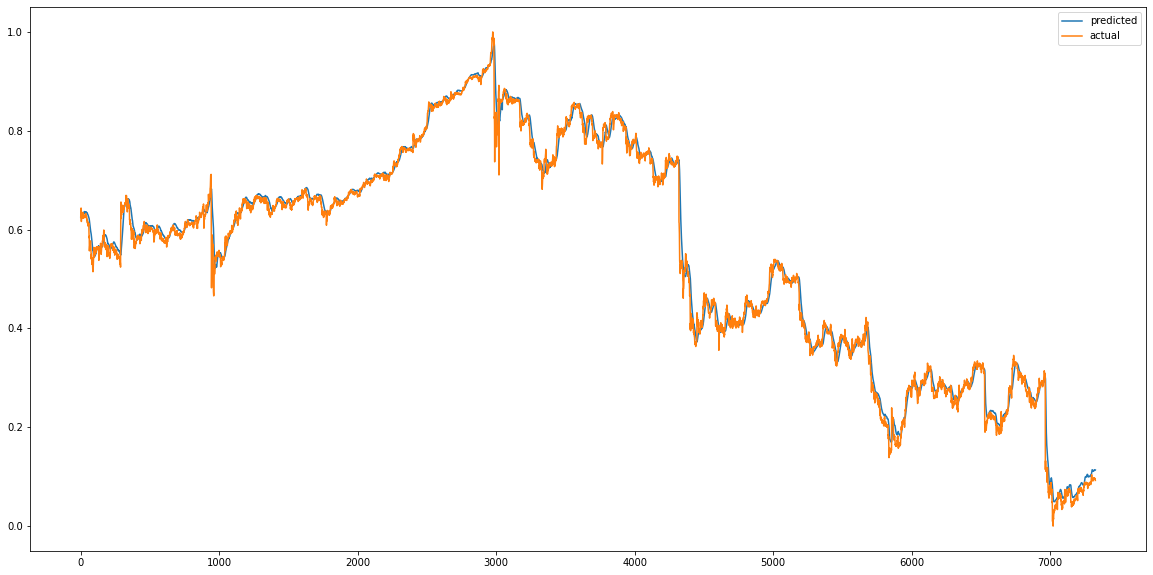

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


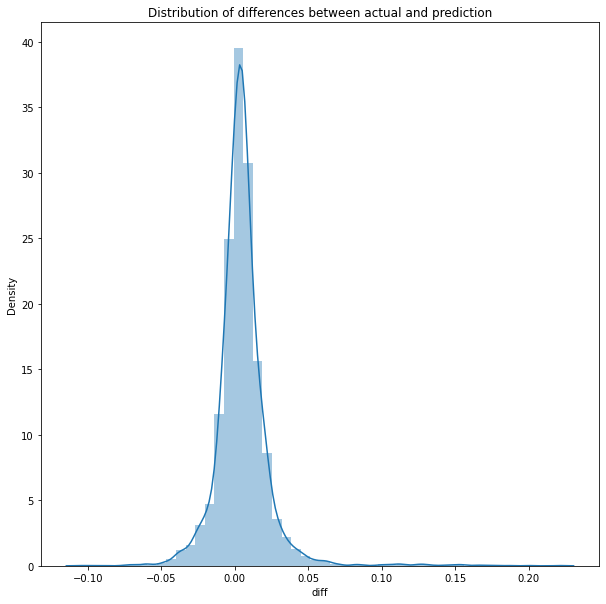

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0003572207991089534
MAE :  0.011649912647195323
RMSE  : 0.01890028568855385
229/229 [==============================] - 8s 35ms/step
R2_Score  : 0.9931482594916733


count    7328.000000
mean        0.004849
std         0.018269
min        -0.105476
25%        -0.003008
50%         0.003834
75%         0.010982
max         0.221383
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           328704    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint





checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
print(x_val.shape)
print(x_train.shape)

(7475, 24, 12)
(59383, 24, 12)


In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 345.1141 - mae: 3.2279 - mse: 345.1141 - root_mean_squared_error: 18.5772 - mape: 20167.0977
Epoch 1: val_mse improved from inf to 0.10120, saving model to weights.best.hdf5
464/464 [==============================] - 138s 286ms/step - loss: 345.1141 - mae: 3.2279 - mse: 345.1141 - root_mean_squared_error: 18.5772 - mape: 20167.0977 - val_loss: 0.1012 - val_mae: 0.2692 - val_mse: 0.1012 - val_root_mean_squared_error: 0.3181 - val_mape: 96470.7500
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.1287 - mae: 0.3296 - mse: 0.1287 - root_mean_squared_error: 0.3587 - mape: 11357.0527
Epoch 2: val_mse improved from 0.10120 to 0.03609, saving model to weights.best.hdf5
464/464 [==============================] - 140s 301ms/step - loss: 0.1287 - mae: 0.3296 - mse: 0.1287 - root_mean_squared_error: 0.3587 - mape: 11357.0527 - val_loss: 0.0361 - val_mae: 0.1376 - val_mse: 0.0361 - val_root_mean_squared_err

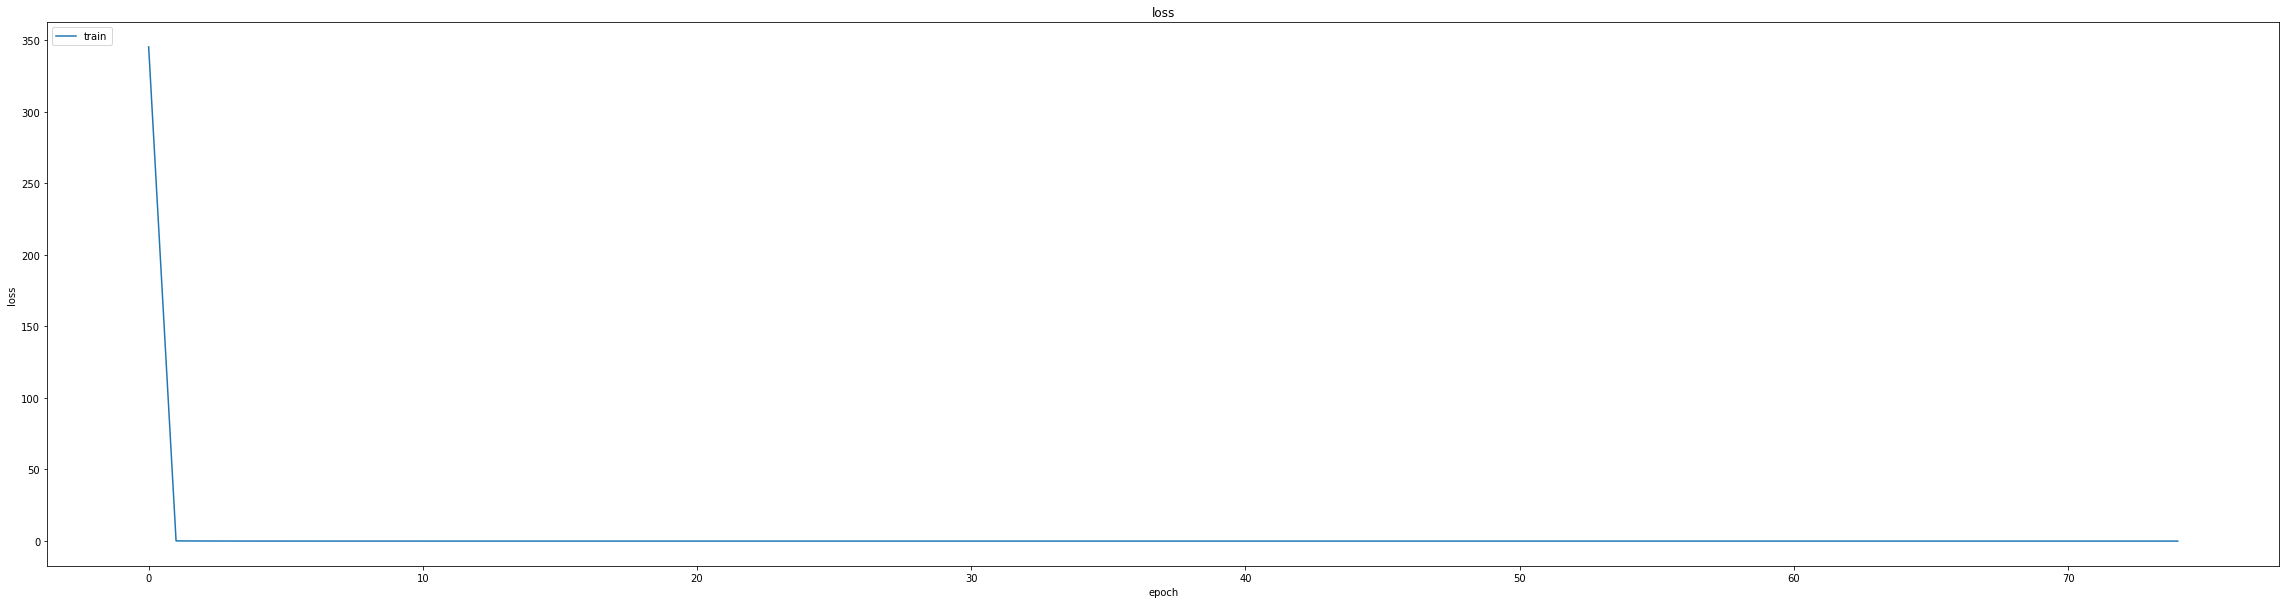

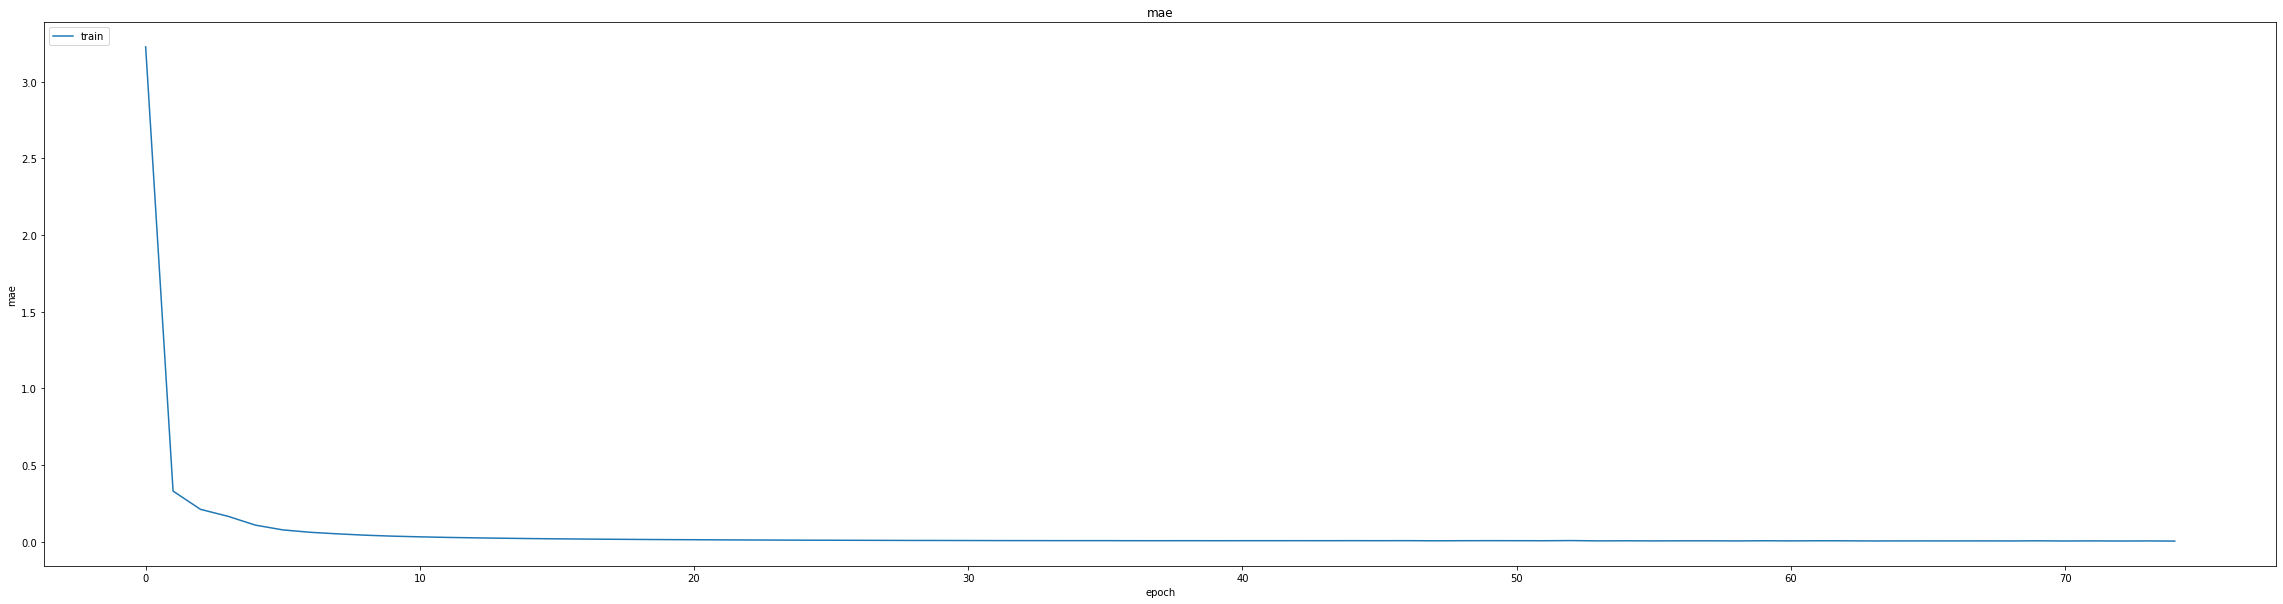

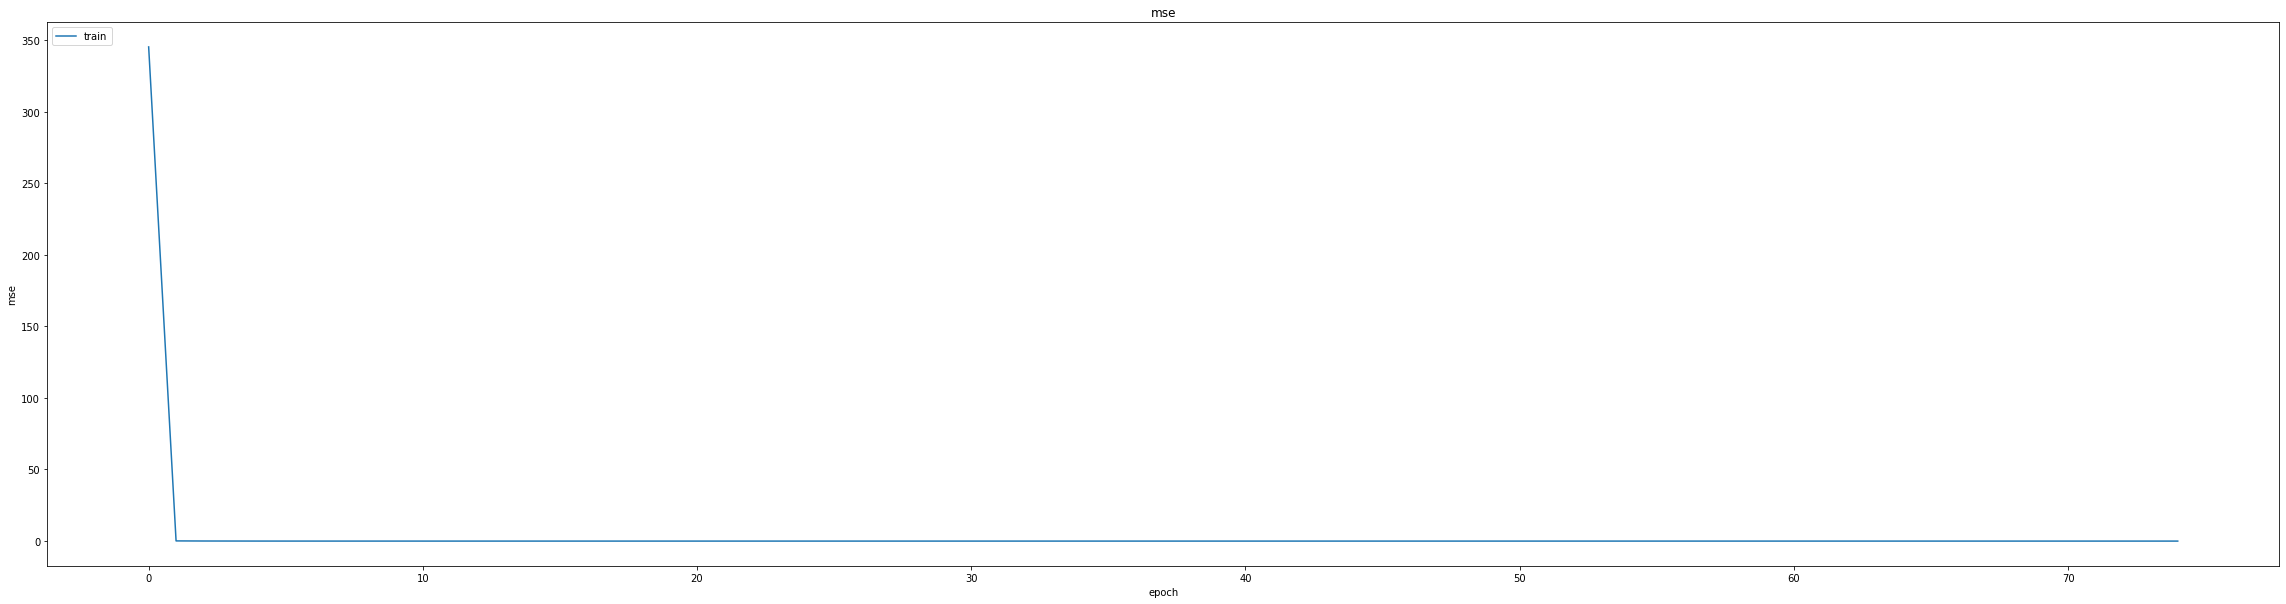

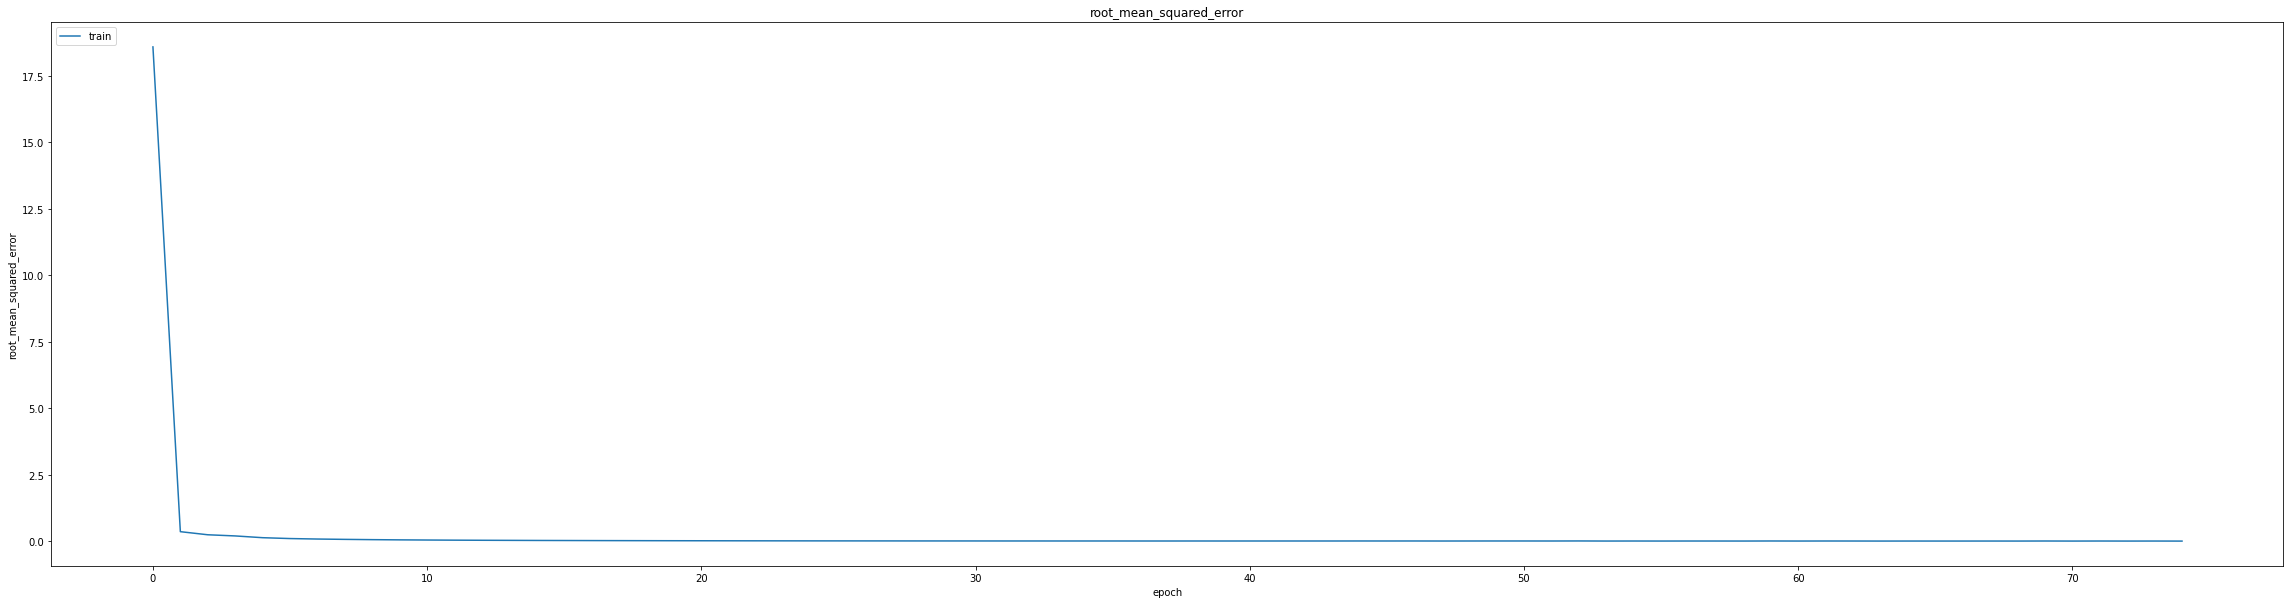

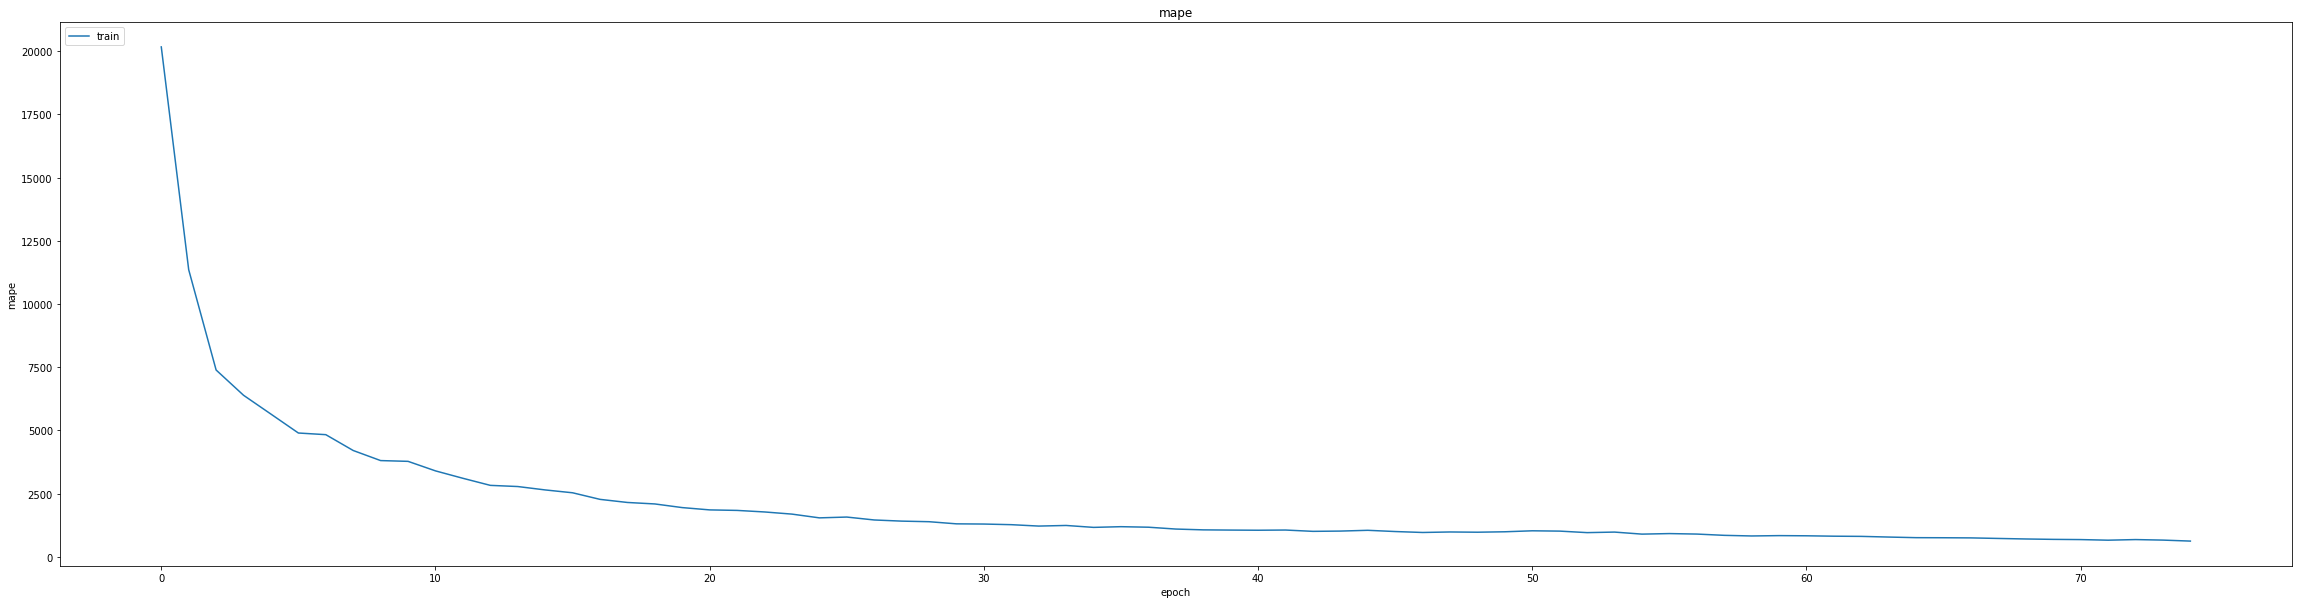

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['var_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00967321451753378
0.013423793017864227
234/234 [==============================] - 10s 38ms/step
0.9917083333881074


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=12)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

In [ ]:
Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 1.9753e-04 - mae: 0.0060 - mse: 1.9753e-04 - root_mean_squared_error: 0.0141 - mape: 828.8393
Epoch 1: val_mse did not improve from 0.00018
464/464 [==============================] - 147s 304ms/step - loss: 1.9753e-04 - mae: 0.0060 - mse: 1.9753e-04 - root_mean_squared_error: 0.0141 - mape: 828.8393 - val_loss: 2.0322e-04 - val_mae: 0.0106 - val_mse: 2.0322e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 6953.1543 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 2.2644e-05 - mae: 0.0034 - mse: 2.2644e-05 - root_mean_squared_error: 0.0048 - mape: 728.3615
Epoch 2: val_mse did not improve from 0.00018
464/464 [==============================] - 133s 286ms/step - loss: 2.2644e-05 - mae: 0.0034 - mse: 2.2644e-05 - root_mean_squared_error: 0.0048 - mape: 728.3615 - val_loss: 2.4711e-04 - val_mae: 0.0125 - val_mse: 2.4711e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 7248.1890

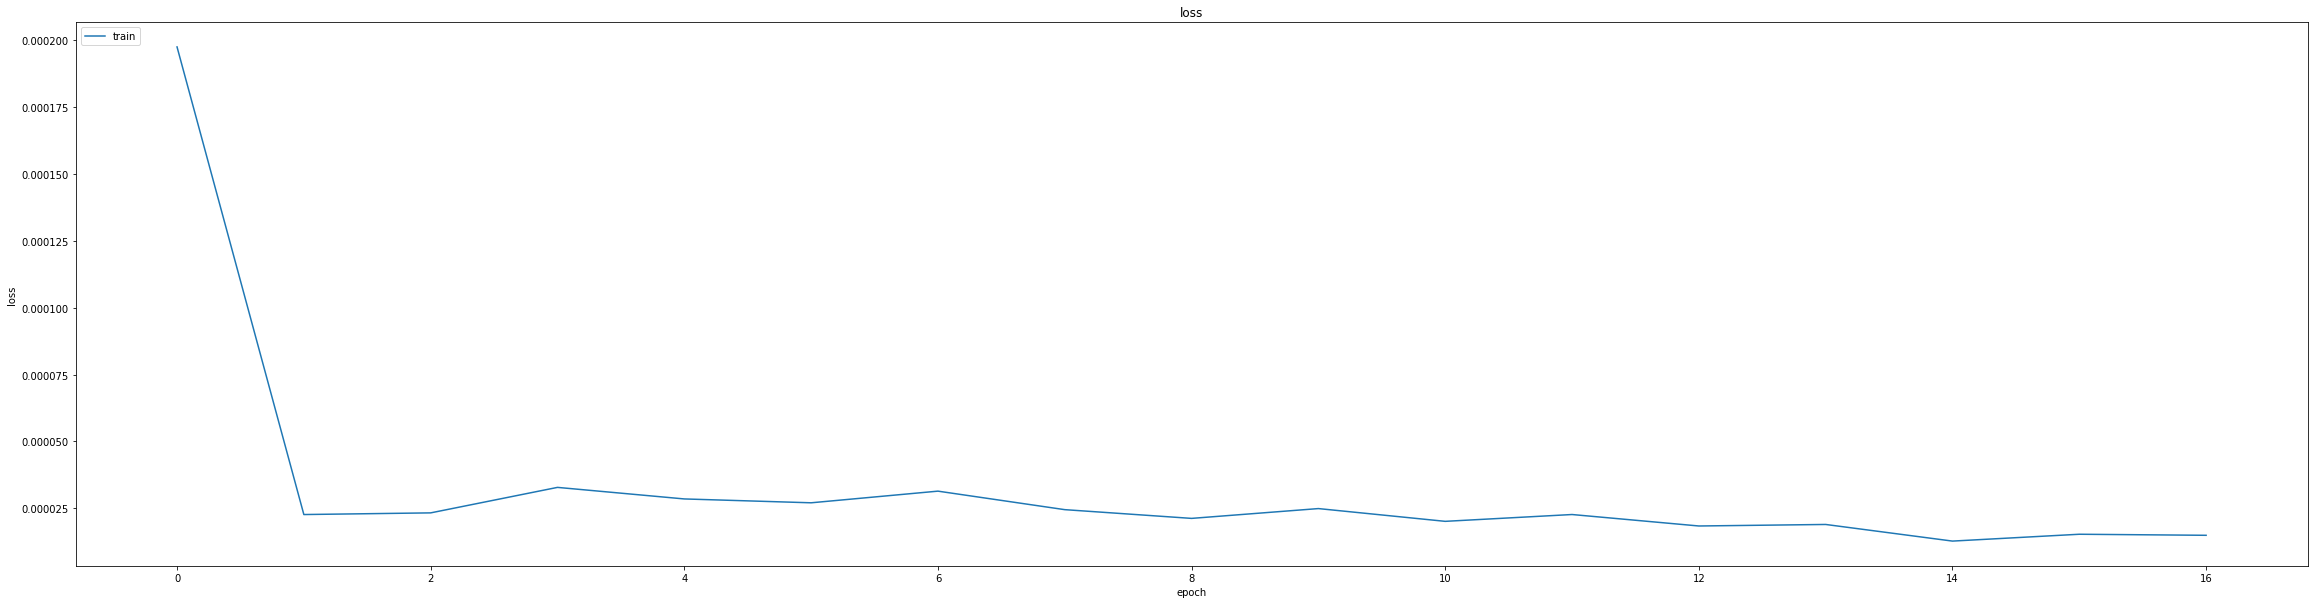

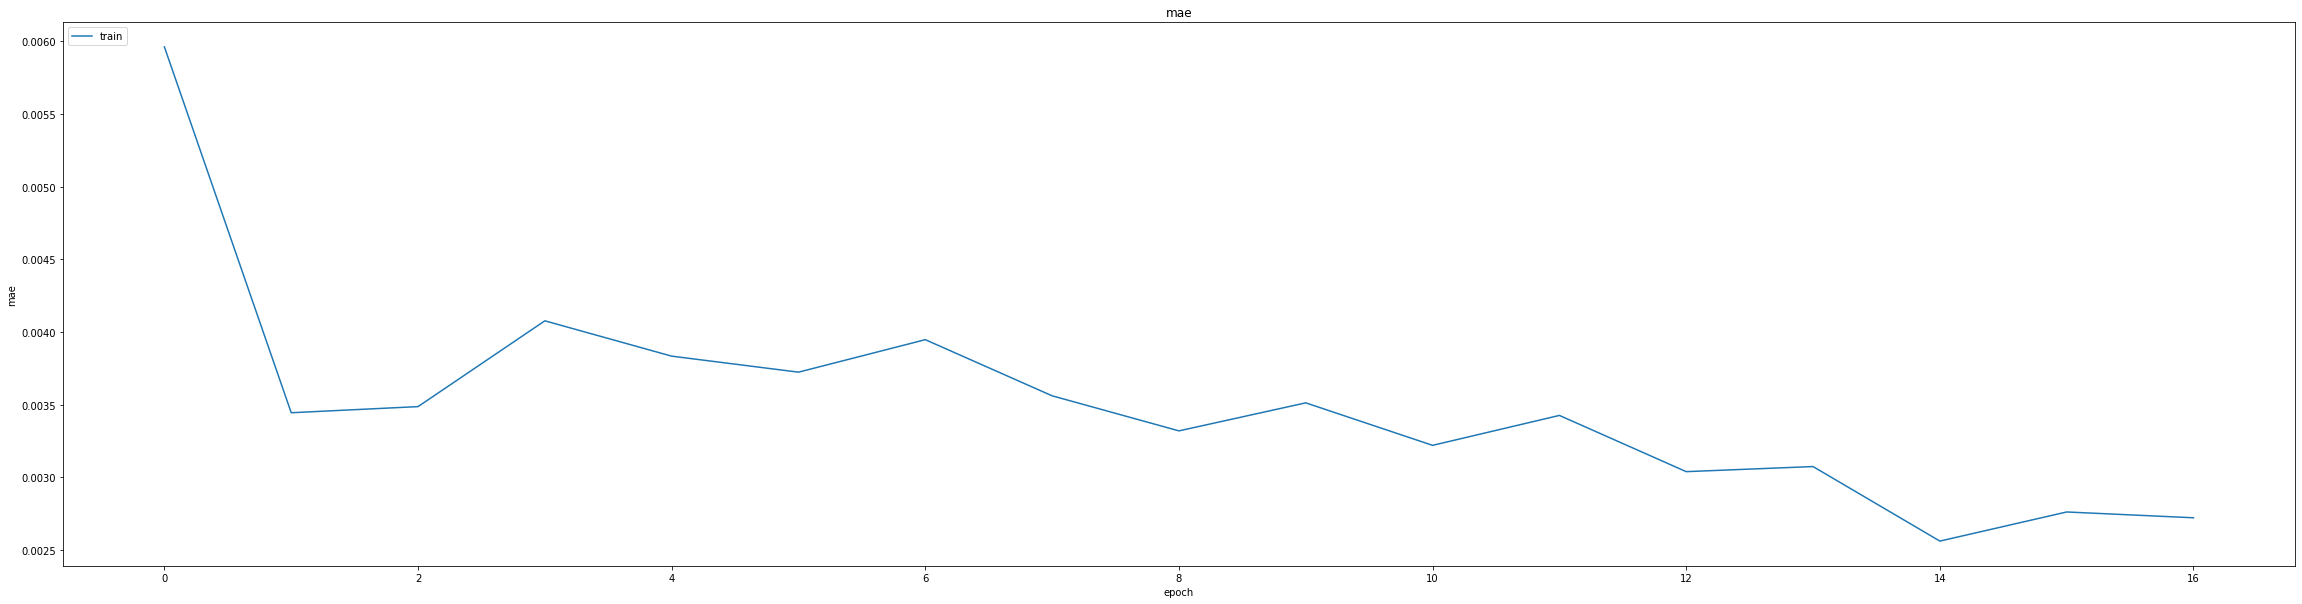

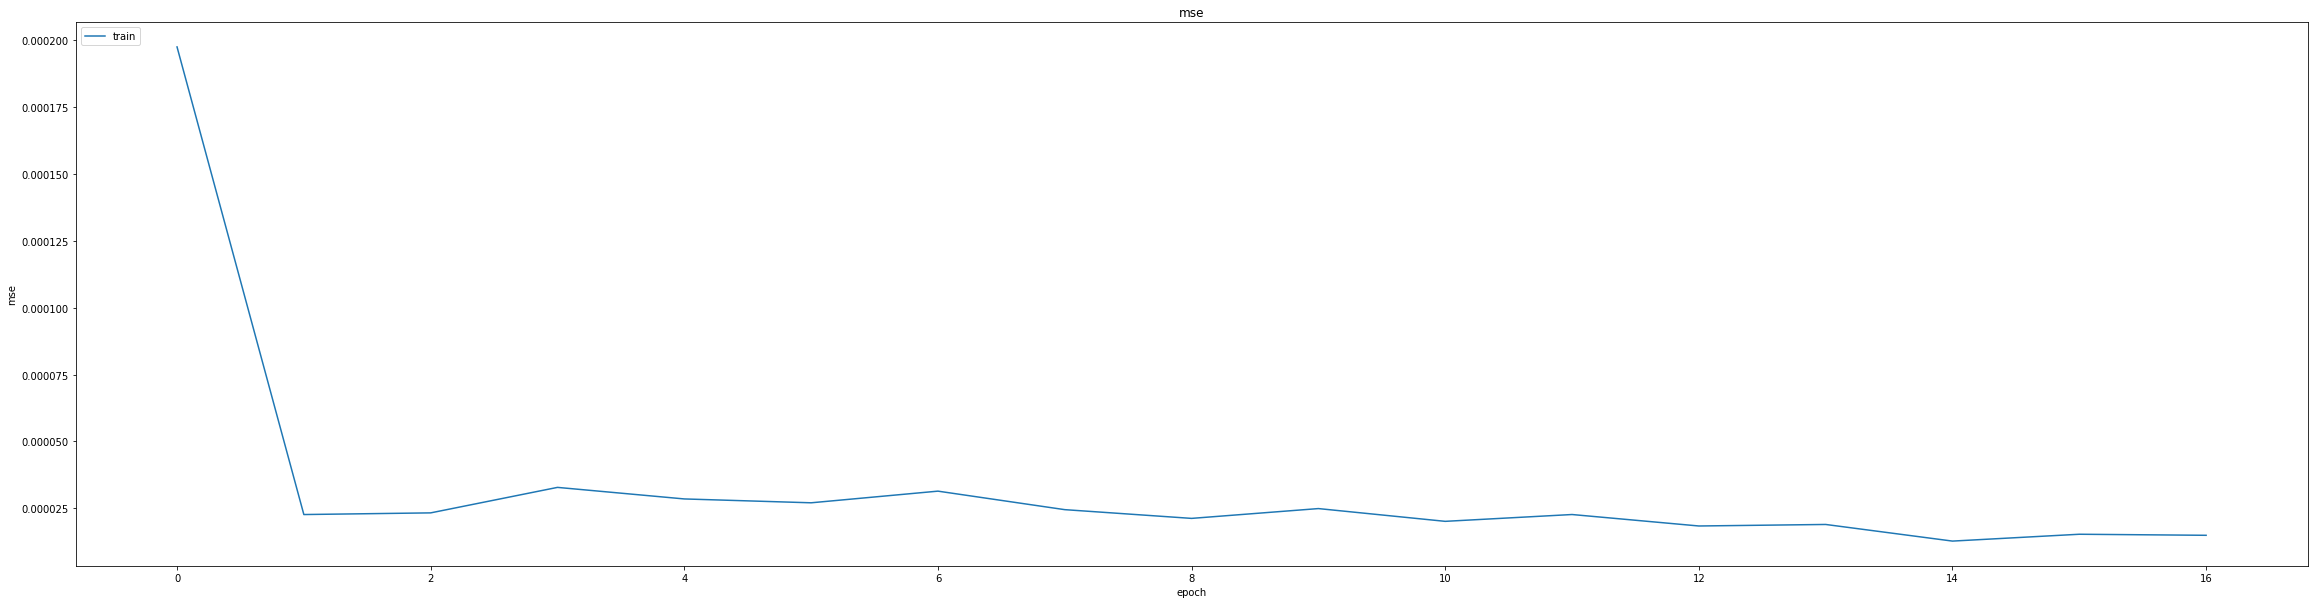

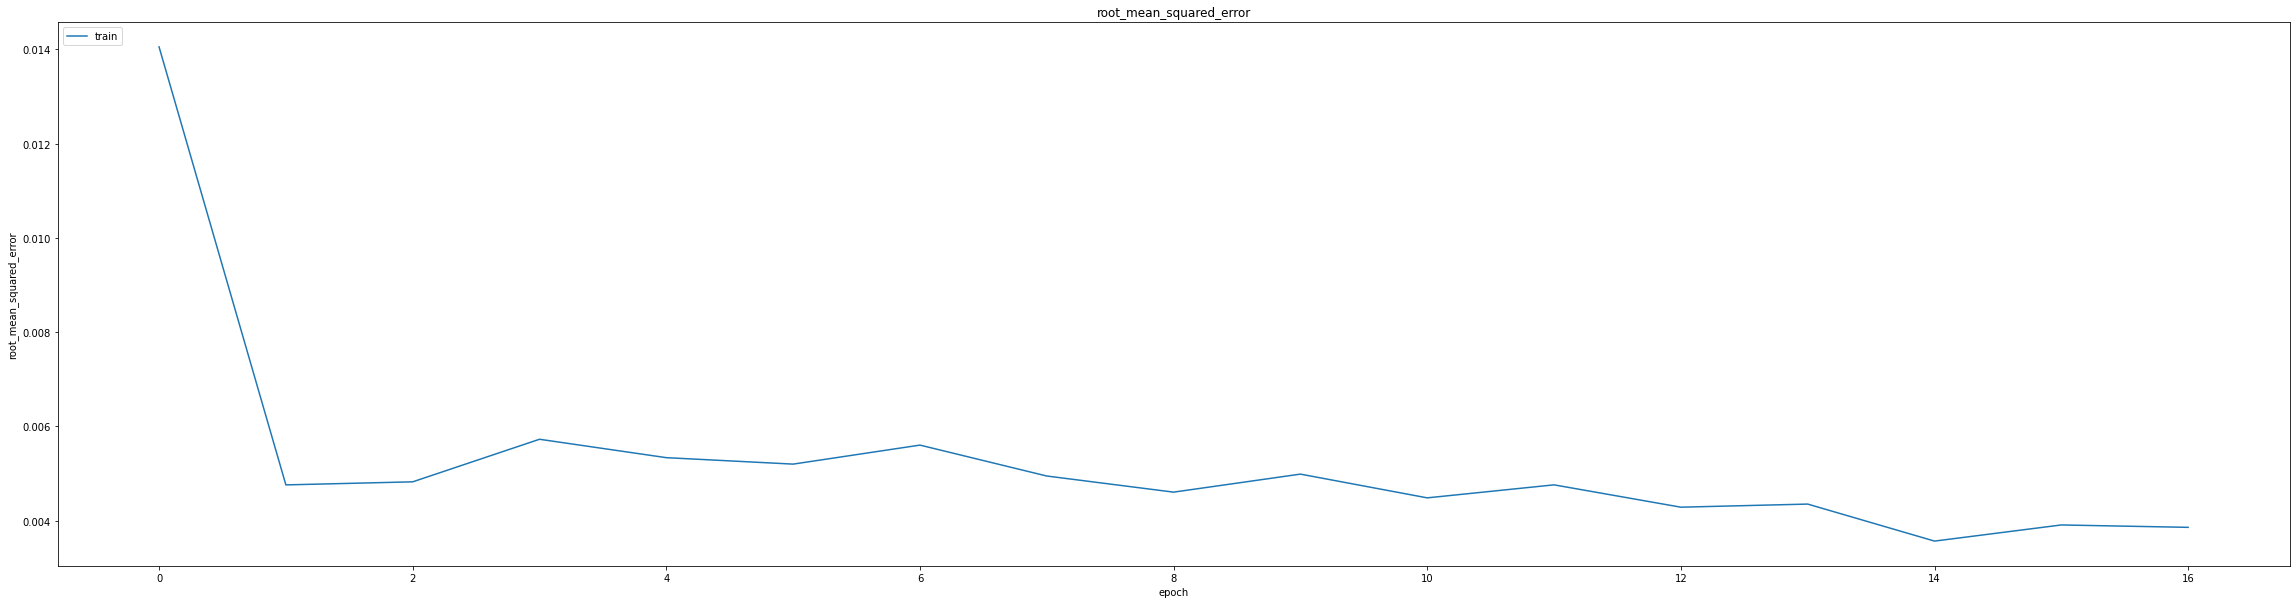

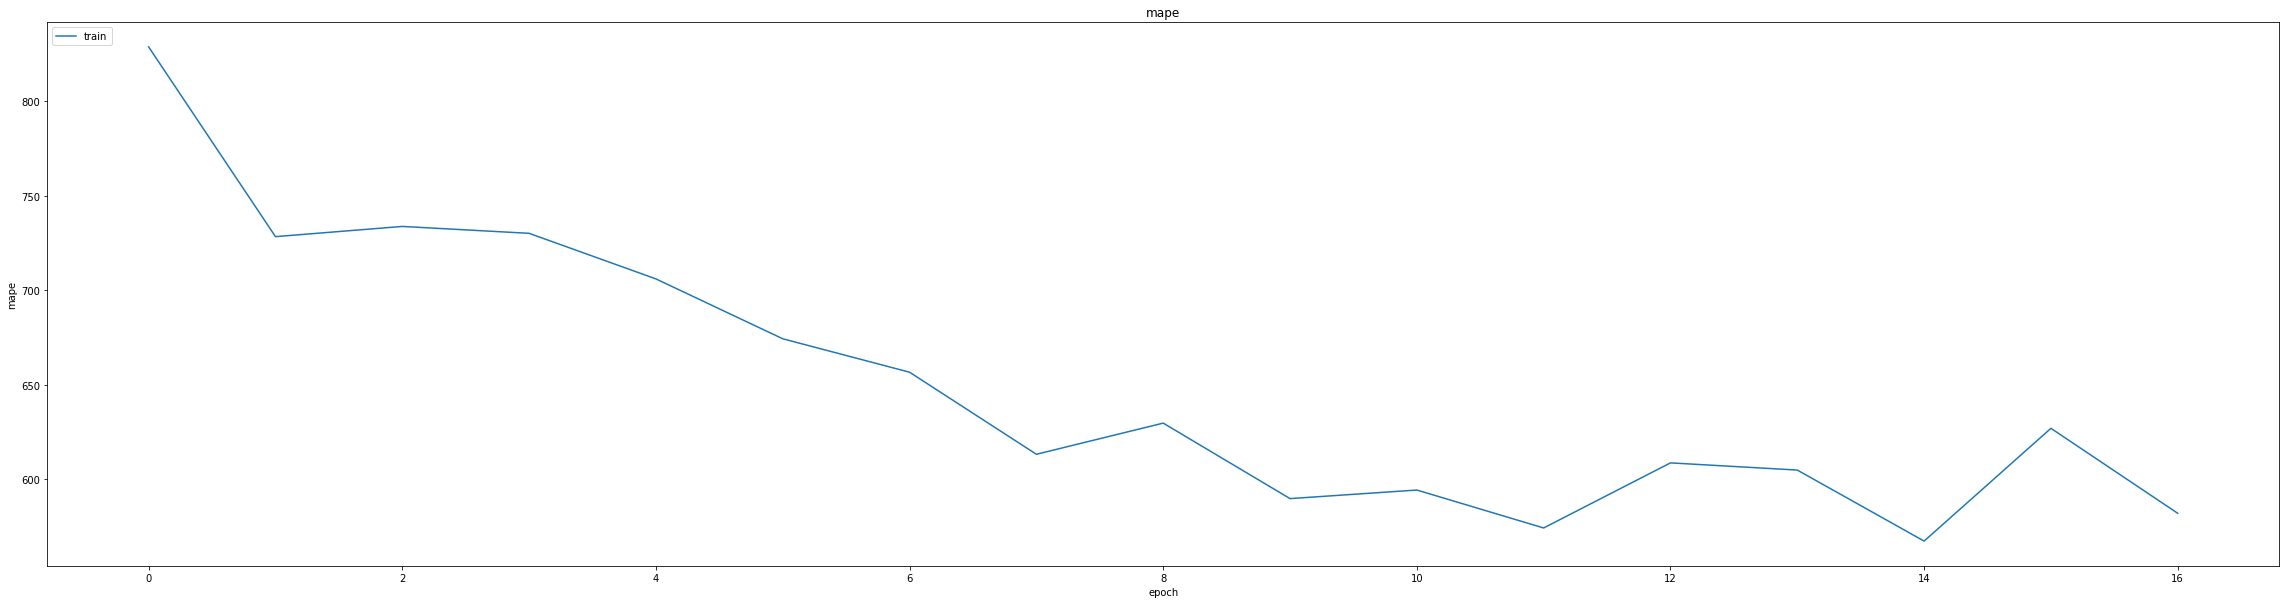

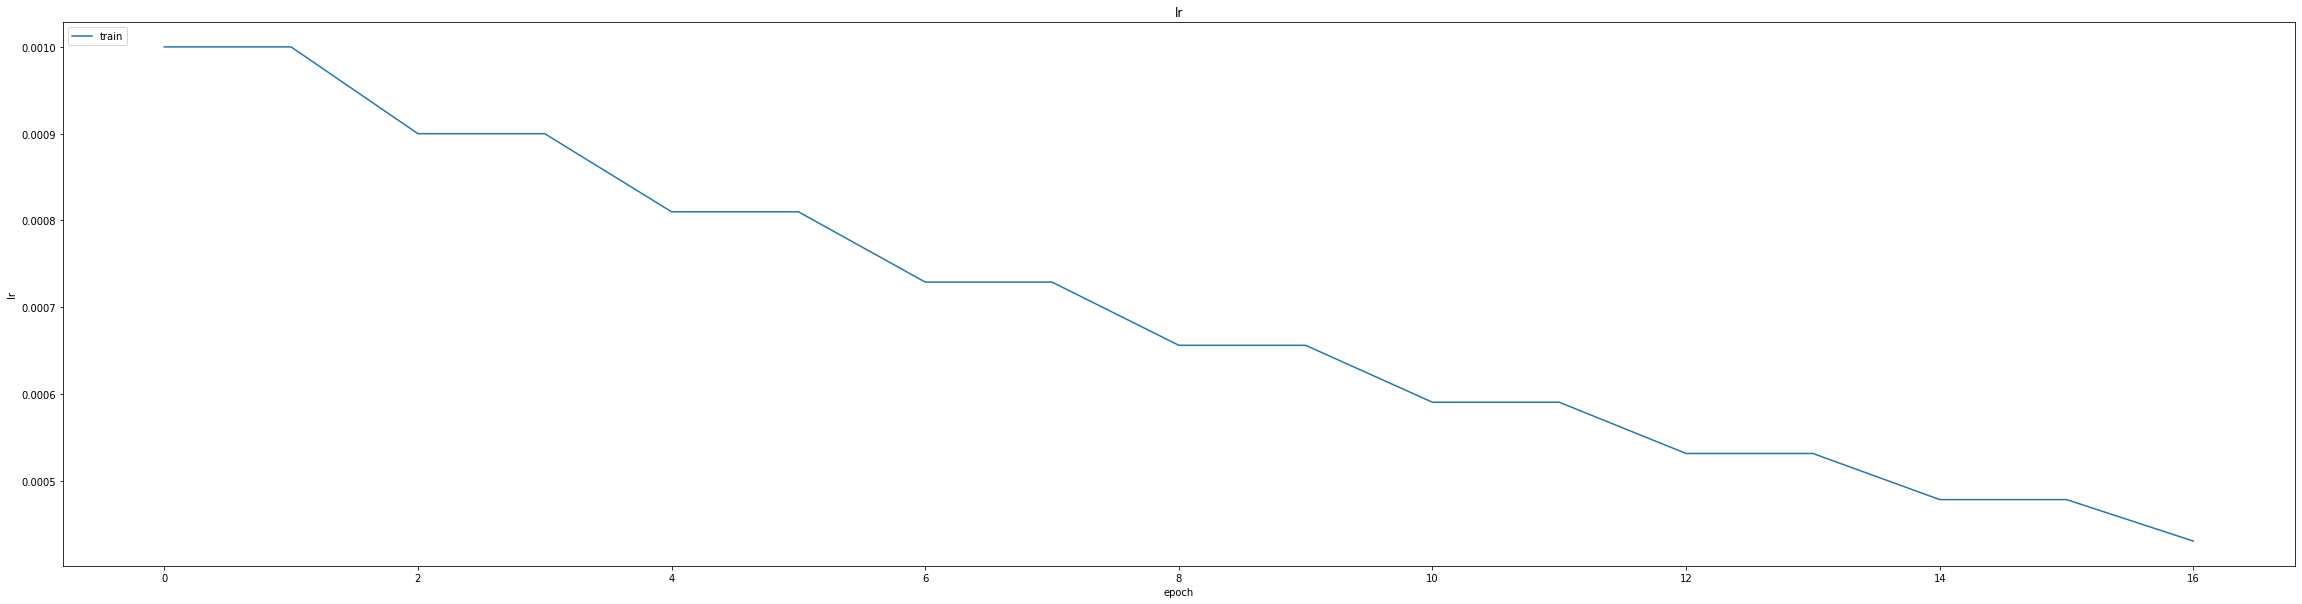

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['var_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009737245738506317
0.013149120844900608
234/234 [==============================] - 10s 39ms/step
0.9892558106976101


In [ ]:
model.load_weights("weights.best.hdf5")

234/234 [==============================] - 9s 40ms/step


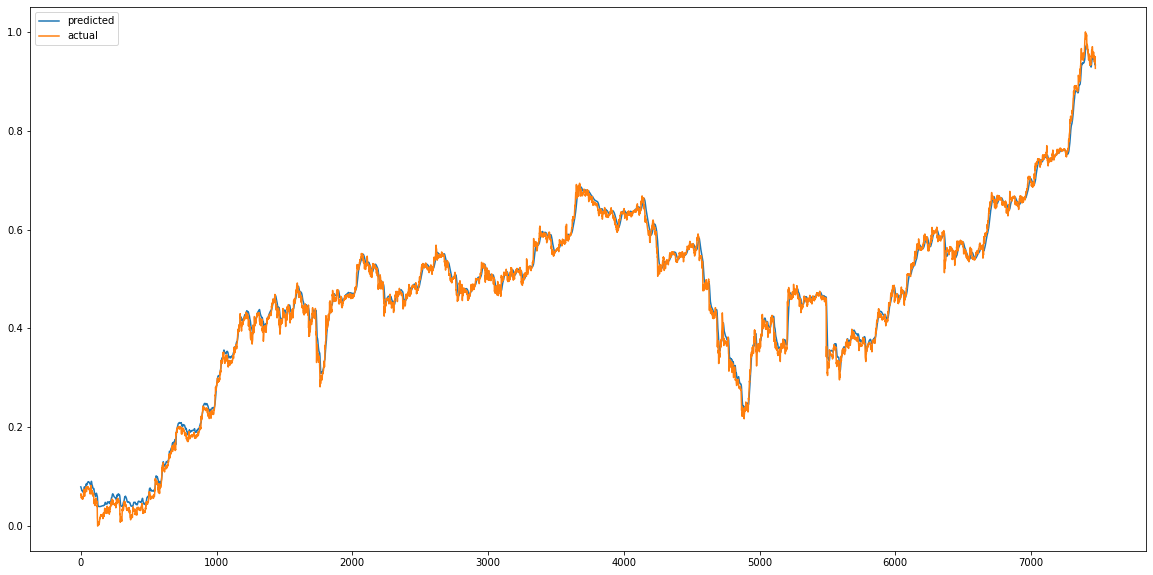

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


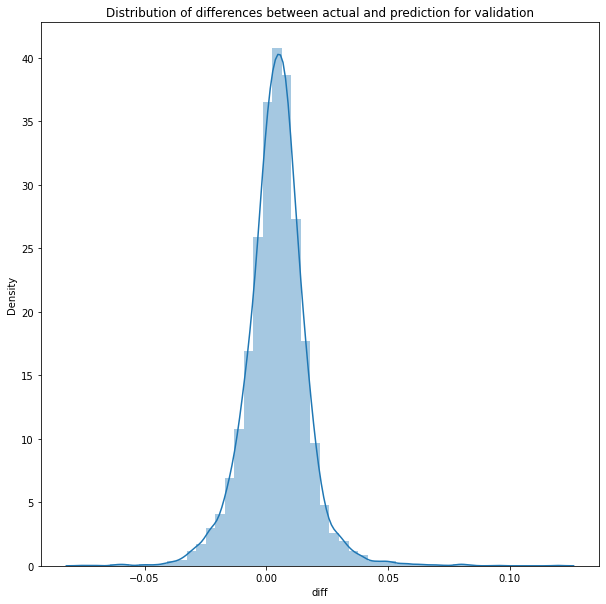

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 11s 49ms/step


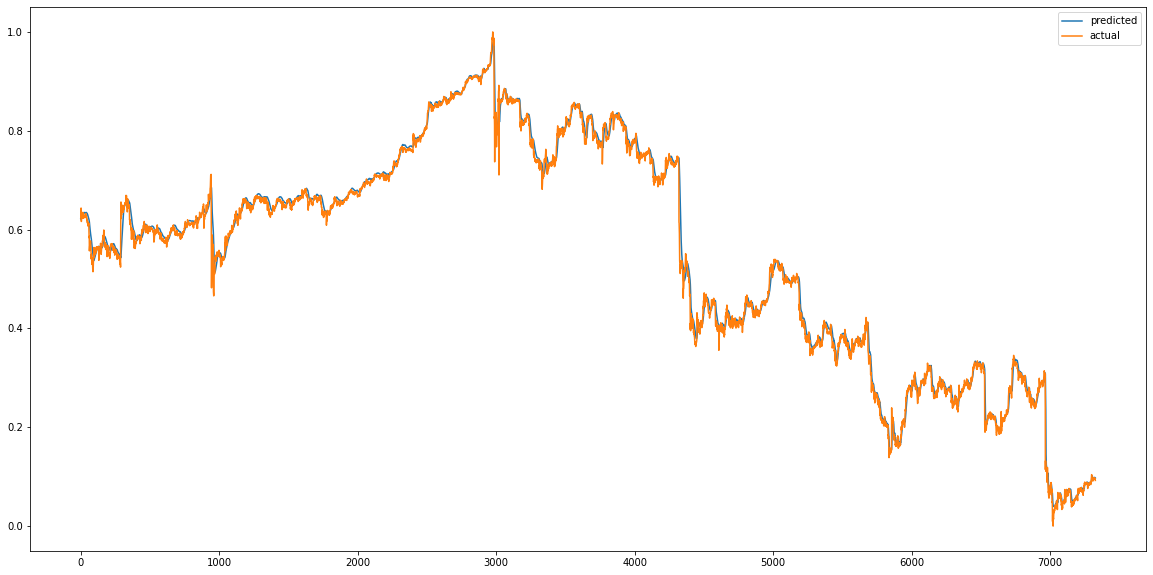

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


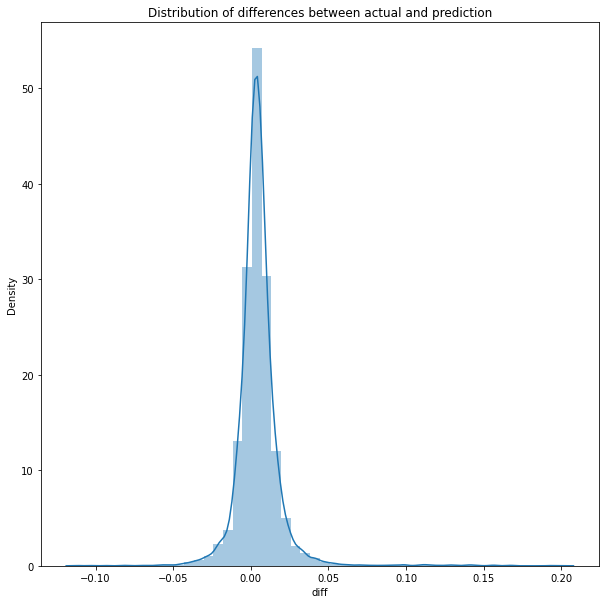

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print(test_r2_scr)

predictions['diff'].describe()

MSE :  0.00023637782983023983
MAE :  0.009107330851114506
229/229 [==============================] - 9s 37ms/step
0.9954661107325559


count    7328.000000
mean        0.004671
std         0.014649
min        -0.111535
25%        -0.001024
50%         0.003803
75%         0.009056
max         0.200413
Name: diff, dtype: float64